# AUEB M.Sc. in Data Science

- Course: **Deep Learning**

- Semester: Spring 2020

- Instructor: Prof. P Malakasiotis

- Author: S. Politis (p3351814)

- Homework: 2

# DenseNet training

## Import required libraries and custom packages

In [1]:
# Automagic to reload source code.
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import numpy as np
import platform
import os
import pandas as pd
import pathlib
import re
import seaborn as sns
import sklearn
import sys
import tensorflow as tf
import tensorflow_addons as tfa
import time

In [3]:
sys.path.append("../src/")

from AUEB.DL.H002 import Env, Experiment, Logger, Metrics, Reporting, Visualization
from AUEB.DL.H002.Data import Ingest
from AUEB.DL.H002.Models import DenseNet

## Binary classification on the entire dataset

### Without data augmentation

In [5]:
experiments = {}

Found 33127 validated image filenames belonging to 2 classes.
Found 3681 validated image filenames belonging to 2 classes.
Found 3197 validated image filenames belonging to 2 classes.
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.690719 to fit

Model: "DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_all_classes_binary"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_pad

Epoch 1/100


Epoch 1/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5902 - accuracy: 0.6804 - auc: 0.7046
Epoch 00001: val_auc improved from -inf to 0.75225, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_all_classes_binary.hdf5

8281/8281 [==============================] - 233s 28ms/step - loss: 0.5902 - accuracy: 0.6804 - auc: 0.7046 - val_loss: 0.5542 - val_accuracy: 0.7158 - val_auc: 0.7523 - lr: 0.0010
Epoch 2/100


Epoch 2/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5586 - accuracy: 0.7133 - auc: 0.7449
Epoch 00002: val_auc improved from 0.75225 to 0.76602, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_all_classes_binary.hdf5

8281/8281 [==============================] - 232s 28ms/step - loss: 0.5586 - accuracy: 0.7133 - auc: 0.7449 - val_loss: 0.5470 - val_accuracy: 0.7277 - val_auc: 0.7660 - lr: 0.0010
Epoch 3/100


Epoch 3/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5521 - accuracy: 0.7180 - auc: 0.7539
Epoch 00003: val_auc did not improve from 0.76602

8281/8281 [==============================] - 230s 28ms/step - loss: 0.5521 - accuracy: 0.7180 - auc: 0.7539 - val_loss: 0.5739 - val_accuracy: 0.6880 - val_auc: 0.7402 - lr: 0.0010
Epoch 4/100


Epoch 4/100
8280/8281 [============================>.] - ETA: 0s - loss: 0.5485 - accuracy: 0.7205 - auc: 0.7583 E
Epoch 00004: val_auc did not improve from 0.76602

8281/8281 [==============================] - 226s 27ms/step - loss: 0.5485 - accuracy: 0.7205 - auc: 0.7583 - val_loss: 0.6006 - val_accuracy: 0.6791 - val_auc: 0.7338 - lr: 0.0010
Epoch 5/100


Epoch 5/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5443 - accuracy: 0.7252 - auc: 0.7631
Epoch 00005: val_auc improved from 0.76602 to 0.77146, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_all_classes_binary.hdf5

8281/8281 [==============================] - 229s 28ms/step - loss: 0.5443 - accuracy: 0.7252 - auc: 0.7631 - val_loss: 0.5516 - val_accuracy: 0.7253 - val_auc: 0.7715 - lr: 0.0010
Epoch 6/100


Epoch 6/100
8279/8281 [============================>.] - ETA: 0s - loss: 0.5438 - accuracy: 0.7256 - auc: 0.7651
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00006: val_auc did not improve from 0.77146

8281/8281 [==============================] - 225s 27ms/step - loss: 0.5438 - accuracy: 0.7256 - auc: 0.7651 - val_loss: 0.5557 - val_accuracy: 0.7236 - val_auc: 0.7671 - lr: 0.0010
Epoch 7/100


Epoch 7/100
8279/8281 [============================>.] - ETA: 0s - loss: 0.5406 - accuracy: 0.7281 - auc: 0.7663
Epoch 00007: val_auc did not improve from 0.77146

8281/8281 [==============================] - 220s 27ms/step - loss: 0.5406 - accuracy: 0.7281 - auc: 0.7663 - val_loss: 0.5637 - val_accuracy: 0.7024 - val_auc: 0.7580 - lr: 0.0010
Epoch 8/100


Epoch 8/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5406 - accuracy: 0.7288 - auc: 0.7667
Epoch 00008: val_auc did not improve from 0.77146

8281/8281 [==============================] - 220s 27ms/step - loss: 0.5406 - accuracy: 0.7288 - auc: 0.7667 - val_loss: 0.5988 - val_accuracy: 0.6747 - val_auc: 0.7234 - lr: 0.0010
Epoch 9/100


Epoch 9/100
8279/8281 [============================>.] - ETA: 0s - loss: 0.5382 - accuracy: 0.7300 - auc: 0.7693
Epoch 00009: val_auc did not improve from 0.77146

8281/8281 [==============================] - 220s 27ms/step - loss: 0.5382 - accuracy: 0.7301 - auc: 0.7694 - val_loss: 0.5621 - val_accuracy: 0.7120 - val_auc: 0.7585 - lr: 0.0010
Epoch 10/100


Epoch 10/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5394 - accuracy: 0.7286 - auc: 0.7675Restoring model weights from the end of the best epoch.

Epoch 00010: val_auc did not improve from 0.77146

8281/8281 [==============================] - 220s 27ms/step - loss: 0.5394 - accuracy: 0.7286 - auc: 0.7675 - val_loss: 0.6382 - val_accuracy: 0.6568 - val_auc: 0.7133 - lr: 0.0010
Epoch 00010: early stopping

Found 33127 validated image filenames belonging to 2 classes.
Found 3681 validated image filenames belonging to 2 classes.
Found 3197 validated image filenames belonging to 2 classes.
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.496237 to fit

Model: "DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_all_classes_binary"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None

Epoch 1/100


Epoch 1/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5743 - accuracy: 0.7004 - auc: 0.7291
Epoch 00001: val_auc improved from -inf to 0.74119, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_all_classes_binary.hdf5

8281/8281 [==============================] - 279s 34ms/step - loss: 0.5743 - accuracy: 0.7004 - auc: 0.7291 - val_loss: 0.5743 - val_accuracy: 0.6905 - val_auc: 0.7412 - lr: 0.0010
Epoch 2/100


Epoch 2/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5453 - accuracy: 0.7233 - auc: 0.7642
Epoch 00002: val_auc improved from 0.74119 to 0.76916, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_all_classes_binary.hdf5

8281/8281 [==============================] - 278s 34ms/step - loss: 0.5453 - accuracy: 0.7233 - auc: 0.7642 - val_loss: 0.5417 - val_accuracy: 0.7212 - val_auc: 0.7692 - lr: 0.0010
Epoch 3/100


Epoch 3/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5374 - accuracy: 0.7301 - auc: 0.7718
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00003: val_auc improved from 0.76916 to 0.78088, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_all_classes_binary.hdf5

8281/8281 [==============================] - 278s 34ms/step - loss: 0.5374 - accuracy: 0.7301 - auc: 0.7718 - val_loss: 0.5398 - val_accuracy: 0.7264 - val_auc: 0.7809 - lr: 0.0010
Epoch 4/100


Epoch 4/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5333 - accuracy: 0.7312 - auc: 0.7744
Epoch 00004: val_auc improved from 0.78088 to 0.78432, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_all_classes_binary.hdf5

8281/8281 [==============================] - 278s 34ms/step - loss: 0.5333 - accuracy: 0.7312 - auc: 0.7744 - val_loss: 0.5419 - val_accuracy: 0.7394 - val_auc: 0.7843 - lr: 0.0010
Epoch 5/100


Epoch 5/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5296 - accuracy: 0.7355 - auc: 0.7781
Epoch 00005: val_auc improved from 0.78432 to 0.79327, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_all_classes_binary.hdf5

8281/8281 [==============================] - 278s 34ms/step - loss: 0.5296 - accuracy: 0.7355 - auc: 0.7781 - val_loss: 0.5377 - val_accuracy: 0.7421 - val_auc: 0.7933 - lr: 0.0010
Epoch 6/100


Epoch 6/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5276 - accuracy: 0.7329 - auc: 0.7760
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00006: val_auc did not improve from 0.79327

8281/8281 [==============================] - 277s 33ms/step - loss: 0.5276 - accuracy: 0.7329 - auc: 0.7760 - val_loss: 0.5647 - val_accuracy: 0.7114 - val_auc: 0.7570 - lr: 0.0010
Epoch 7/100


Epoch 7/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5269 - accuracy: 0.7312 - auc: 0.7764
Epoch 00007: val_auc did not improve from 0.79327

8281/8281 [==============================] - 291s 35ms/step - loss: 0.5269 - accuracy: 0.7312 - auc: 0.7764 - val_loss: 0.5358 - val_accuracy: 0.7383 - val_auc: 0.7860 - lr: 0.0010
Epoch 8/100


Epoch 8/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5241 - accuracy: 0.7329 - auc: 0.7756
Epoch 00008: val_auc did not improve from 0.79327

8281/8281 [==============================] - 296s 36ms/step - loss: 0.5241 - accuracy: 0.7329 - auc: 0.7756 - val_loss: 0.5661 - val_accuracy: 0.7122 - val_auc: 0.7565 - lr: 0.0010
Epoch 9/100


Epoch 9/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5240 - accuracy: 0.7337 - auc: 0.7760
Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00009: val_auc did not improve from 0.79327

8281/8281 [==============================] - 286s 35ms/step - loss: 0.5240 - accuracy: 0.7337 - auc: 0.7760 - val_loss: 0.5570 - val_accuracy: 0.7304 - val_auc: 0.7736 - lr: 0.0010
Epoch 10/100


Epoch 10/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5228 - accuracy: 0.7346 - auc: 0.7769Restoring model weights from the end of the best epoch.

Epoch 00010: val_auc did not improve from 0.79327

8281/8281 [==============================] - 277s 33ms/step - loss: 0.5228 - accuracy: 0.7346 - auc: 0.7769 - val_loss: 0.6148 - val_accuracy: 0.6867 - val_auc: 0.7426 - lr: 0.0010
Epoch 00010: early stopping

Found 33127 validated image filenames belonging to 2 classes.
Found 3681 validated image filenames belonging to 2 classes.
Found 3197 validated image filenames belonging to 2 classes.
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.417813 to fit

Model: "DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_all_classes_binary"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None

Epoch 1/100


Epoch 1/100
8280/8281 [============================>.] - ETA: 0s - loss: 0.5740 - accuracy: 0.6972 - auc: 0.7336
Epoch 00001: val_auc improved from -inf to 0.73774, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_all_classes_binary.hdf5

8281/8281 [==============================] - 366s 44ms/step - loss: 0.5740 - accuracy: 0.6972 - auc: 0.7336 - val_loss: 0.5801 - val_accuracy: 0.6793 - val_auc: 0.7377 - lr: 0.0010
Epoch 2/100


Epoch 2/100
8280/8281 [============================>.] - ETA: 0s - loss: 0.5458 - accuracy: 0.7288 - auc: 0.7706
Epoch 00002: val_auc improved from 0.73774 to 0.73980, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_all_classes_binary.hdf5

8281/8281 [==============================] - 362s 44ms/step - loss: 0.5458 - accuracy: 0.7287 - auc: 0.7706 - val_loss: 0.5790 - val_accuracy: 0.6889 - val_auc: 0.7398 - lr: 0.0010
Epoch 3/100


Epoch 3/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5382 - accuracy: 0.7338 - auc: 0.7785
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00003: val_auc improved from 0.73980 to 0.79526, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_all_classes_binary.hdf5

8281/8281 [==============================] - 361s 44ms/step - loss: 0.5382 - accuracy: 0.7338 - auc: 0.7785 - val_loss: 0.5307 - val_accuracy: 0.7440 - val_auc: 0.7953 - lr: 0.0010
Epoch 4/100


Epoch 4/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5324 - accuracy: 0.7391 - auc: 0.7802
Epoch 00004: val_auc did not improve from 0.79526

8281/8281 [==============================] - 360s 43ms/step - loss: 0.5324 - accuracy: 0.7391 - auc: 0.7802 - val_loss: 0.5328 - val_accuracy: 0.7334 - val_auc: 0.7821 - lr: 0.0010
Epoch 5/100


Epoch 5/100
8280/8281 [============================>.] - ETA: 0s - loss: 0.5313 - accuracy: 0.7379 - auc: 0.7821
Epoch 00005: val_auc improved from 0.79526 to 0.79558, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_all_classes_binary.hdf5

8281/8281 [==============================] - 368s 44ms/step - loss: 0.5313 - accuracy: 0.7379 - auc: 0.7821 - val_loss: 0.5289 - val_accuracy: 0.7462 - val_auc: 0.7956 - lr: 0.0010
Epoch 6/100


Epoch 6/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5262 - accuracy: 0.7395 - auc: 0.7843
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00006: val_auc did not improve from 0.79558

8281/8281 [==============================] - 360s 44ms/step - loss: 0.5262 - accuracy: 0.7395 - auc: 0.7843 - val_loss: 0.5321 - val_accuracy: 0.7459 - val_auc: 0.7922 - lr: 0.0010
Epoch 7/100


Epoch 7/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5254 - accuracy: 0.7392 - auc: 0.7829
Epoch 00007: val_auc did not improve from 0.79558

8281/8281 [==============================] - 351s 42ms/step - loss: 0.5254 - accuracy: 0.7392 - auc: 0.7829 - val_loss: 0.5334 - val_accuracy: 0.7380 - val_auc: 0.7858 - lr: 0.0010
Epoch 8/100


Epoch 8/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5221 - accuracy: 0.7409 - auc: 0.7847
Epoch 00008: val_auc did not improve from 0.79558

8281/8281 [==============================] - 351s 42ms/step - loss: 0.5221 - accuracy: 0.7409 - auc: 0.7847 - val_loss: 0.5674 - val_accuracy: 0.7209 - val_auc: 0.7691 - lr: 0.0010
Epoch 9/100


Epoch 9/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5227 - accuracy: 0.7447 - auc: 0.7852
Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00009: val_auc did not improve from 0.79558

8281/8281 [==============================] - 351s 42ms/step - loss: 0.5227 - accuracy: 0.7447 - auc: 0.7852 - val_loss: 0.5396 - val_accuracy: 0.7511 - val_auc: 0.7945 - lr: 0.0010
Epoch 10/100


Epoch 10/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5220 - accuracy: 0.7436 - auc: 0.7861Restoring model weights from the end of the best epoch.

Epoch 00010: val_auc did not improve from 0.79558

8281/8281 [==============================] - 355s 43ms/step - loss: 0.5220 - accuracy: 0.7436 - auc: 0.7861 - val_loss: 0.5371 - val_accuracy: 0.7418 - val_auc: 0.7845 - lr: 0.0010
Epoch 00010: early stopping

CPU times: user 2h 50min 44s, sys: 3min 1s, total: 2h 53min 45s
Wall time: 2h 24min 53s


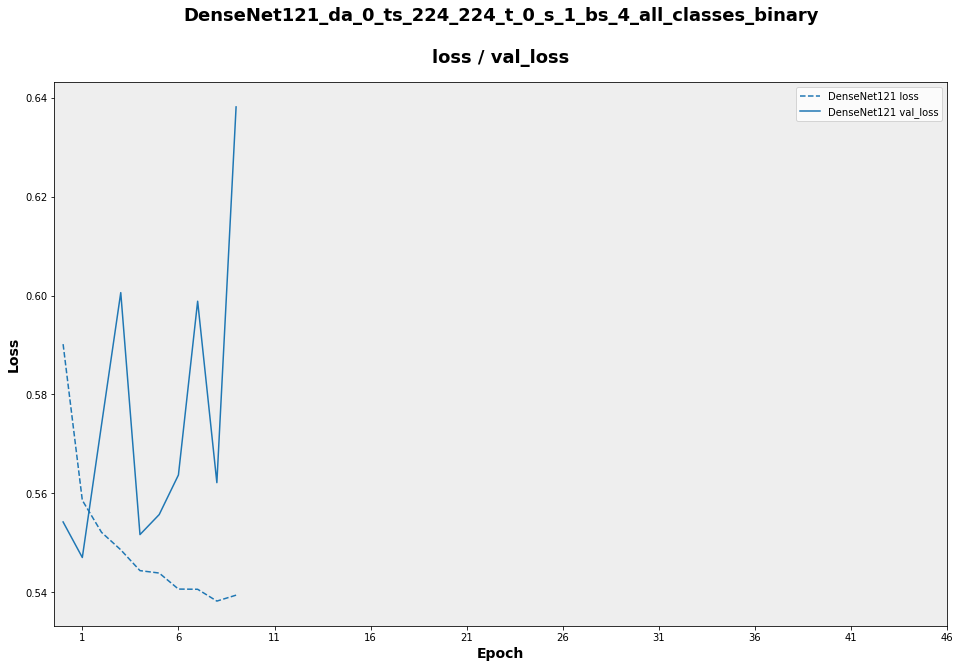

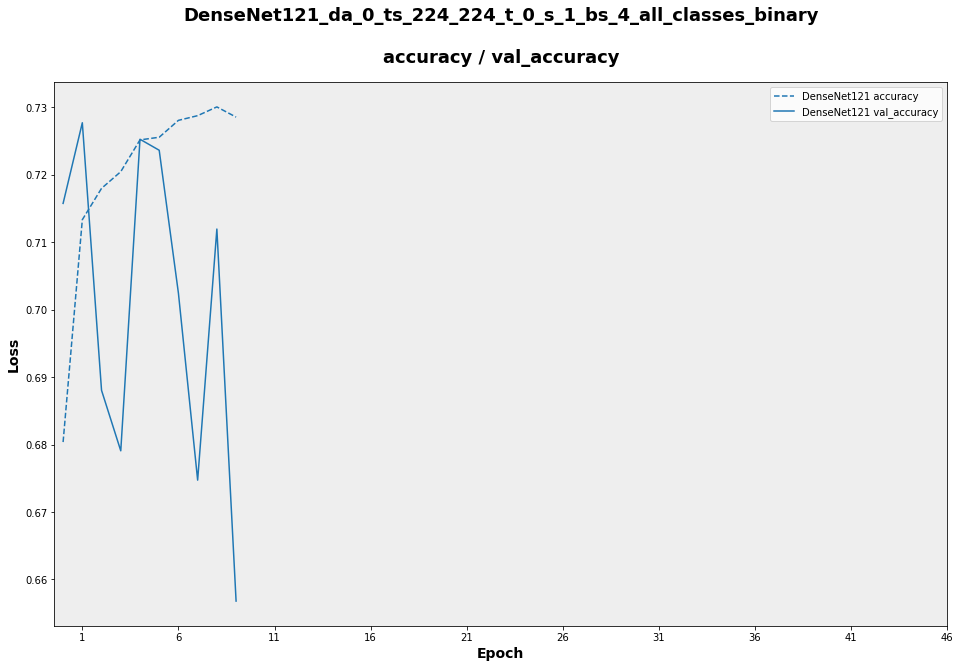

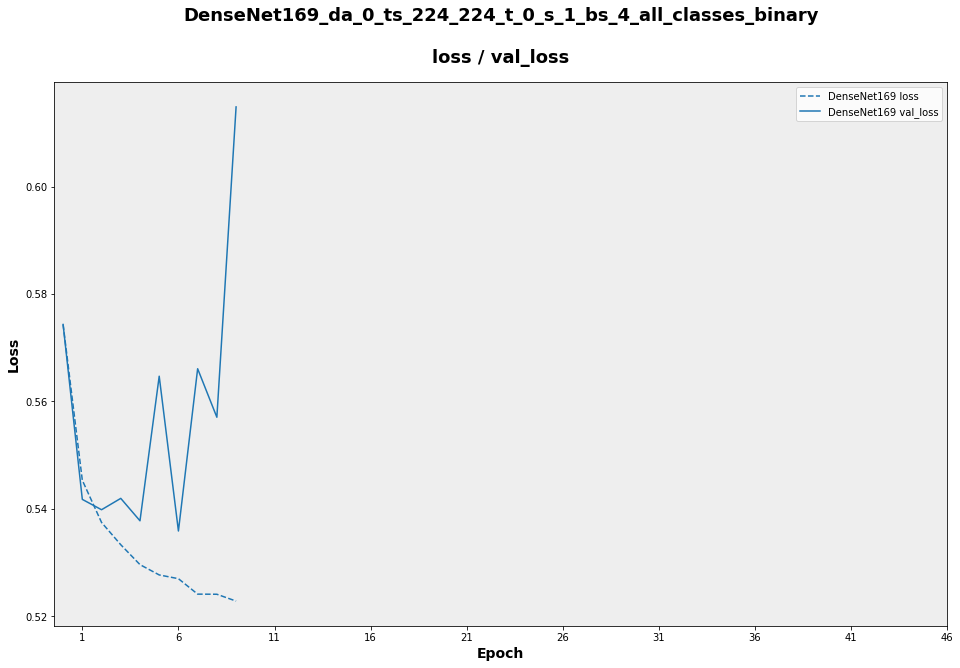

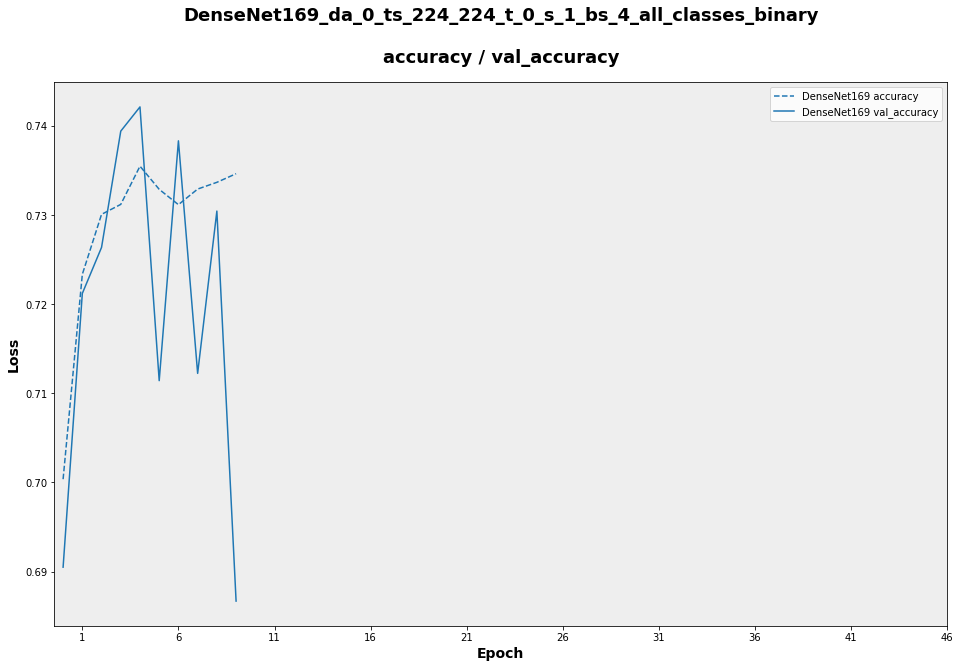

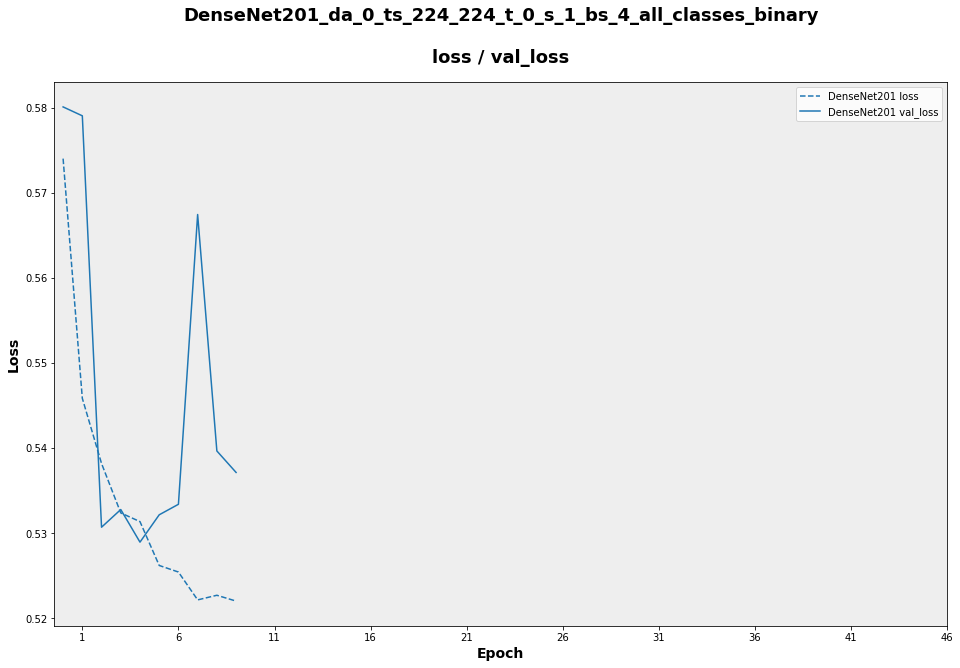

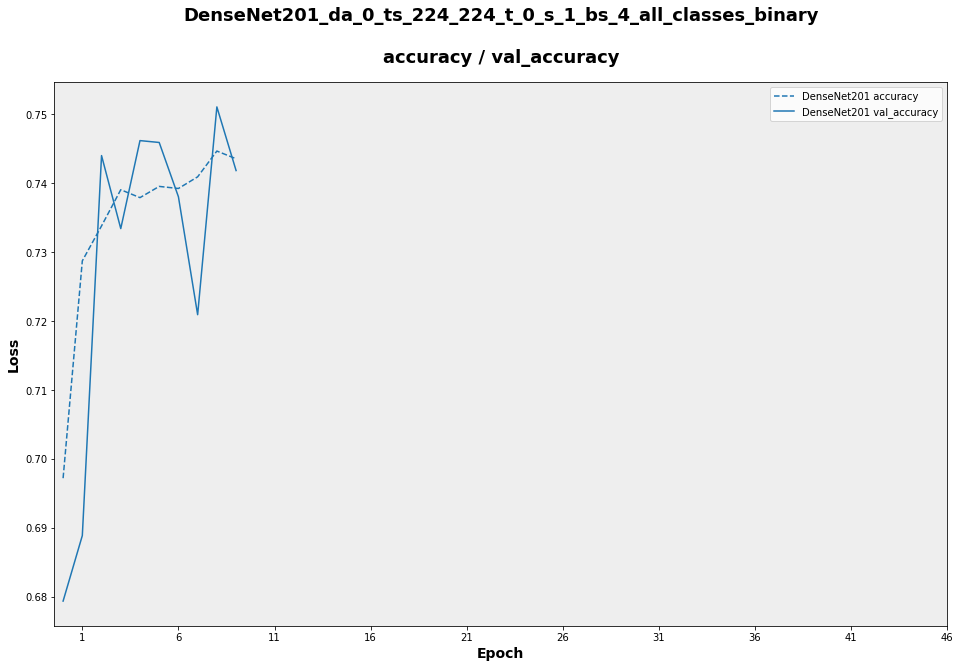

In [5]:
%%time

architectures = [
    "DenseNet121", 
    "DenseNet169", 
    "DenseNet201"
]

filter_classes = None

densenet_model_config = {
    "model": {
        "model_id": None, 
        "model_instance_id": None, 
        "target_size": None,
        "channels_size": None, 
        "classes_size": None, 
        "optimizer": "Adam", 
        "loss": "categorical_crossentropy", 
        "metrics": [
            "accuracy", 
            tf.keras.metrics.AUC(
                name = "roc_auc"
            ), 
            # tfa.metrics.CohenKappa(name = "kappa", num_classes = 2)
        ], 
        "dense_net": {
            "weights": "imagenet", 
            "pooling": "avg"
        }
    }, 
    "head": None, 
    "training": {
        "reduce_lr_on_plateau": {
            "monitor": "val_roc_auc", 
            "factor": 1e-2, 
            "patience": 2, 
            "min_delta": 1e-4, 
            "cooldown": 2, 
            "min_lr": 1e-3, 
            "verbose": 1
        }, 
        "early_stopping": {
            "monitor": "val_roc_auc", 
            "patience": 5, 
            "verbose": 1,
            "mode": "max"
        }, 
        "checkpoint": {
            "monitor": "val_roc_auc", 
            "save_best_only": True, 
            "verbose": 1, 
            "mode": "max"
        }, 
        "csv_logger": {
            "separator": "\t", 
            "append": False
        }, 
        "epochs": 100, 
        "class_weights": None
    }
}

for architecture in architectures:
    experiment = Experiment.Experiment(
        model_id = architecture, 
        batch_size = 4, 
        target_size = (224, 224), 
        channels_size = 3, 
        classes_size = 2, 
        shuffle = True, 
        trainable = False, 
        validation_split = 0.1, 
        data_augmentation = False, 
        filter_classes = filter_classes, 
        model_config = densenet_model_config, 
        random_seed = Env.RANDOM_SEED
    )
    
    experiments[architecture] = experiment.run()

### With data augmentation

Found 33127 validated image filenames belonging to 2 classes.
Found 3681 validated image filenames belonging to 2 classes.
Found 3197 validated image filenames belonging to 2 classes.
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.417813 to fit



Epoch 1/100


Epoch 1/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5910 - accuracy: 0.6812 - roc_auc: 0.7135
Epoch 00001: val_roc_auc improved from -inf to 0.76459, saving model to /home/sp/Documents/deep-learning-2/model/checkpoints/DenseNet201_da_1_ts_224_224_t_0_s_1_bs_4_all_classes_binary.hdf5

8281/8281 [==============================] - 574s 69ms/step - loss: 0.5910 - accuracy: 0.6812 - roc_auc: 0.7135 - val_loss: 0.5623 - val_accuracy: 0.7231 - val_roc_auc: 0.7646 - lr: 0.0010
Epoch 2/100


Epoch 2/100
8280/8281 [============================>.] - ETA: 0s - loss: 0.5673 - accuracy: 0.7067 - roc_auc: 0.7396
Epoch 00002: val_roc_auc did not improve from 0.76459

8281/8281 [==============================] - 507s 61ms/step - loss: 0.5673 - accuracy: 0.7067 - roc_auc: 0.7396 - val_loss: 0.5635 - val_accuracy: 0.7204 - val_roc_auc: 0.7582 - lr: 0.0010
Epoch 3/100


Epoch 3/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5626 - accuracy: 0.7147 - roc_auc: 0.7505
Epoch 00003: val_roc_auc did not improve from 0.76459

8281/8281 [==============================] - 460s 56ms/step - loss: 0.5626 - accuracy: 0.7147 - roc_auc: 0.7505 - val_loss: 0.5870 - val_accuracy: 0.7057 - val_roc_auc: 0.7485 - lr: 0.0010
Epoch 4/100


Epoch 4/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5601 - accuracy: 0.7142 - roc_auc: 0.7518
Epoch 00004: val_roc_auc did not improve from 0.76459

8281/8281 [==============================] - 520s 63ms/step - loss: 0.5601 - accuracy: 0.7142 - roc_auc: 0.7518 - val_loss: 0.6047 - val_accuracy: 0.7269 - val_roc_auc: 0.7626 - lr: 0.0010
Epoch 5/100


Epoch 5/100
8280/8281 [============================>.] - ETA: 0s - loss: 0.5611 - accuracy: 0.7158 - roc_auc: 0.7556
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00005: val_roc_auc improved from 0.76459 to 0.77522, saving model to /home/sp/Documents/deep-learning-2/model/checkpoints/DenseNet201_da_1_ts_224_224_t_0_s_1_bs_4_all_classes_binary.hdf5

8281/8281 [==============================] - 510s 62ms/step - loss: 0.5612 - accuracy: 0.7158 - roc_auc: 0.7555 - val_loss: 0.5570 - val_accuracy: 0.7277 - val_roc_auc: 0.7752 - lr: 0.0010
Epoch 6/100


Epoch 6/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5574 - accuracy: 0.7168 - roc_auc: 0.7568
Epoch 00006: val_roc_auc did not improve from 0.77522

8281/8281 [==============================] - 513s 62ms/step - loss: 0.5574 - accuracy: 0.7168 - roc_auc: 0.7568 - val_loss: 0.5667 - val_accuracy: 0.7130 - val_roc_auc: 0.7629 - lr: 0.0010
Epoch 7/100


Epoch 7/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5568 - accuracy: 0.7189 - roc_auc: 0.7614
Epoch 00007: val_roc_auc did not improve from 0.77522

8281/8281 [==============================] - 515s 62ms/step - loss: 0.5568 - accuracy: 0.7189 - roc_auc: 0.7614 - val_loss: 0.5523 - val_accuracy: 0.7242 - val_roc_auc: 0.7749 - lr: 0.0010
Epoch 8/100


Epoch 8/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5584 - accuracy: 0.7186 - roc_auc: 0.7590
Epoch 00008: val_roc_auc did not improve from 0.77522

8281/8281 [==============================] - 574s 69ms/step - loss: 0.5584 - accuracy: 0.7186 - roc_auc: 0.7590 - val_loss: 0.5827 - val_accuracy: 0.6962 - val_roc_auc: 0.7444 - lr: 0.0010
Epoch 9/100


Epoch 9/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5592 - accuracy: 0.7201 - roc_auc: 0.7604
Epoch 00009: val_roc_auc did not improve from 0.77522

8281/8281 [==============================] - 648s 78ms/step - loss: 0.5592 - accuracy: 0.7201 - roc_auc: 0.7604 - val_loss: 0.5732 - val_accuracy: 0.6965 - val_roc_auc: 0.7522 - lr: 0.0010
Epoch 10/100


Epoch 10/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5565 - accuracy: 0.7222 - roc_auc: 0.7619
Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00010: val_roc_auc improved from 0.77522 to 0.78252, saving model to /home/sp/Documents/deep-learning-2/model/checkpoints/DenseNet201_da_1_ts_224_224_t_0_s_1_bs_4_all_classes_binary.hdf5

8281/8281 [==============================] - 481s 58ms/step - loss: 0.5565 - accuracy: 0.7222 - roc_auc: 0.7619 - val_loss: 0.5549 - val_accuracy: 0.7416 - val_roc_auc: 0.7825 - lr: 0.0010
Epoch 11/100


Epoch 11/100
8280/8281 [============================>.] - ETA: 0s - loss: 0.5541 - accuracy: 0.7222 - roc_auc: 0.7613
Epoch 00011: val_roc_auc did not improve from 0.78252

8281/8281 [==============================] - 583s 70ms/step - loss: 0.5541 - accuracy: 0.7222 - roc_auc: 0.7613 - val_loss: 0.5642 - val_accuracy: 0.7353 - val_roc_auc: 0.7749 - lr: 0.0010
Epoch 12/100


Epoch 12/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5578 - accuracy: 0.7195 - roc_auc: 0.7599
Epoch 00012: val_roc_auc did not improve from 0.78252

8281/8281 [==============================] - 517s 62ms/step - loss: 0.5578 - accuracy: 0.7195 - roc_auc: 0.7599 - val_loss: 0.5788 - val_accuracy: 0.7090 - val_roc_auc: 0.7541 - lr: 0.0010
Epoch 13/100


Epoch 13/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5546 - accuracy: 0.7183 - roc_auc: 0.7640
Epoch 00013: val_roc_auc did not improve from 0.78252

8281/8281 [==============================] - 626s 76ms/step - loss: 0.5546 - accuracy: 0.7183 - roc_auc: 0.7640 - val_loss: 0.6099 - val_accuracy: 0.6793 - val_roc_auc: 0.7217 - lr: 0.0010
Epoch 14/100


Epoch 14/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5561 - accuracy: 0.7212 - roc_auc: 0.7648
Epoch 00014: val_roc_auc did not improve from 0.78252

8281/8281 [==============================] - 502s 61ms/step - loss: 0.5561 - accuracy: 0.7212 - roc_auc: 0.7648 - val_loss: 0.5894 - val_accuracy: 0.6946 - val_roc_auc: 0.7419 - lr: 0.0010
Epoch 15/100


Epoch 15/100
8281/8281 [==============================] - ETA: 0s - loss: 0.5560 - accuracy: 0.7185 - roc_auc: 0.7643 ETA: 1s - l
Epoch 00015: ReduceLROnPlateau reducing learning rate to 0.001.
Restoring model weights from the end of the best epoch.

Epoch 00015: val_roc_auc did not improve from 0.78252

8281/8281 [==============================] - 595s 72ms/step - loss: 0.5560 - accuracy: 0.7185 - roc_auc: 0.7643 - val_loss: 0.5596 - val_accuracy: 0.7356 - val_roc_auc: 0.7794 - lr: 0.0010
Epoch 00015: early stopping

CPU times: user 2h 28min 40s, sys: 2min 6s, total: 2h 30min 46s
Wall time: 2h 15min 40s


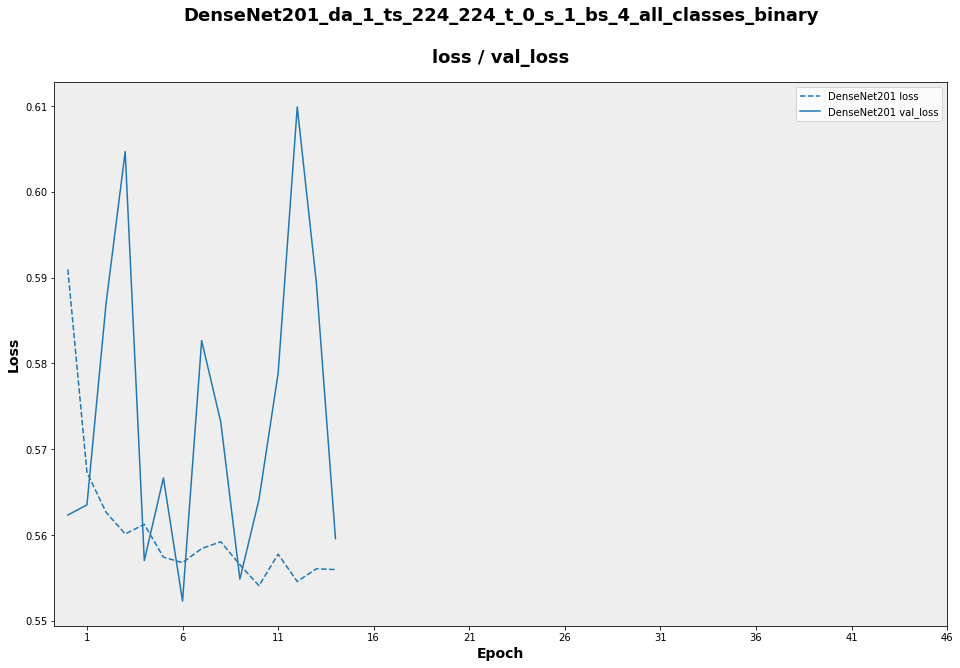

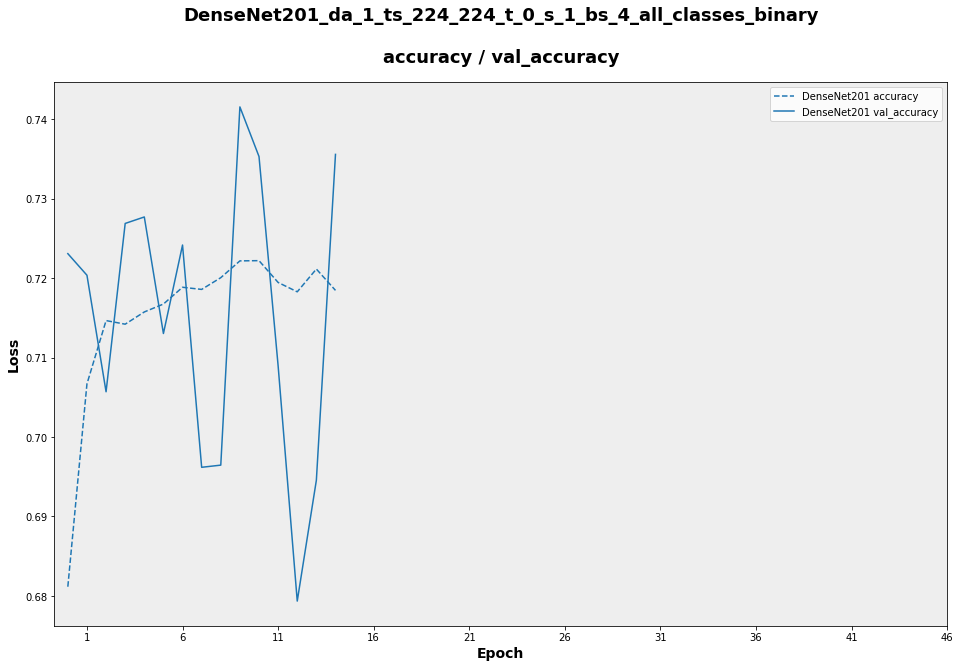

In [7]:
%%time

architectures = [
    "DenseNet201"
]

filter_classes = None

densenet_model_config = {
    "model": {
        "model_id": None, 
        "model_instance_id": None, 
        "target_size": None,
        "channels_size": None, 
        "classes_size": None, 
        "optimizer": "Adam", 
        "loss": "categorical_crossentropy", 
        "metrics": [
            "accuracy", 
            tf.keras.metrics.AUC(
                name = "roc_auc"
            ), 
            # tfa.metrics.CohenKappa(name = "kappa", num_classes = 2)
        ], 
        "dense_net": {
            "weights": "imagenet", 
            "pooling": "avg"
        }
    }, 
    "head": None, 
    "training": {
        "reduce_lr_on_plateau": {
            "monitor": "val_roc_auc", 
            "factor": 1e-2, 
            "patience": 2, 
            "min_delta": 1e-4, 
            "cooldown": 2, 
            "min_lr": 1e-3, 
            "verbose": 1
        }, 
        "early_stopping": {
            "monitor": "val_roc_auc", 
            "patience": 5, 
            "verbose": 1,
            "mode": "max"
        }, 
        "checkpoint": {
            "monitor": "val_roc_auc", 
            "save_best_only": True, 
            "verbose": 1, 
            "mode": "max"
        }, 
        "csv_logger": {
            "separator": "\t", 
            "append": False
        }, 
        "epochs": 100, 
        "class_weights": None
    }
}

for architecture in architectures:
    experiment = Experiment.Experiment(
        model_id = architecture, 
        batch_size = 4, 
        target_size = (224, 224), 
        channels_size = 3, 
        classes_size = 2, 
        shuffle = True, 
        trainable = False, 
        validation_split = 0.1, 
        data_augmentation = True, 
        filter_classes = filter_classes, 
        model_config = densenet_model_config, 
        random_seed = Env.RANDOM_SEED
    )
    
    experiments[architecture] = experiment.run()

## Binary classification per class

In [6]:
experiments_per_class = {}

Found 4437 validated image filenames belonging to 2 classes.
Found 494 validated image filenames belonging to 2 classes.
Found 465 validated image filenames belonging to 2 classes.
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.690719 to fit

Model: "DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_ELBOW_binary"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_6 (ZeroPadding2D (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d

Epoch 1/100


Epoch 1/100
1109/1109 [==============================] - ETA: 0s - loss: 0.6057 - accuracy: 0.6479 - auc: 0.6465
Epoch 00001: val_auc improved from -inf to 0.76590, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_ELBOW_binary.hdf5

1109/1109 [==============================] - 33s 30ms/step - loss: 0.6057 - accuracy: 0.6479 - auc: 0.6465 - val_loss: 0.5488 - val_accuracy: 0.7297 - val_auc: 0.7659 - lr: 0.0010
Epoch 2/100


Epoch 2/100
1109/1109 [==============================] - ETA: 0s - loss: 0.5273 - accuracy: 0.7478 - auc: 0.7846
Epoch 00002: val_auc improved from 0.76590 to 0.76605, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_ELBOW_binary.hdf5

1109/1109 [==============================] - 32s 29ms/step - loss: 0.5273 - accuracy: 0.7478 - auc: 0.7846 - val_loss: 0.5460 - val_accuracy: 0.7337 - val_auc: 0.7660 - lr: 0.0010
Epoch 3/100


Epoch 3/100
1109/1109 [==============================] - ETA: 0s - loss: 0.5091 - accuracy: 0.7645 - auc: 0.7935
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00003: val_auc improved from 0.76605 to 0.79780, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_ELBOW_binary.hdf5

1109/1109 [==============================] - 32s 28ms/step - loss: 0.5091 - accuracy: 0.7645 - auc: 0.7935 - val_loss: 0.5244 - val_accuracy: 0.7642 - val_auc: 0.7978 - lr: 0.0010
Epoch 4/100


Epoch 4/100
1108/1109 [============================>.] - ETA: 0s - loss: 0.4954 - accuracy: 0.7758 - auc: 0.7997
Epoch 00004: val_auc improved from 0.79780 to 0.80266, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_ELBOW_binary.hdf5

1109/1109 [==============================] - 31s 28ms/step - loss: 0.4956 - accuracy: 0.7755 - auc: 0.7996 - val_loss: 0.4995 - val_accuracy: 0.7764 - val_auc: 0.8027 - lr: 0.0010
Epoch 5/100


Epoch 5/100
1108/1109 [============================>.] - ETA: 0s - loss: 0.4867 - accuracy: 0.7735 - auc: 0.8021
Epoch 00005: val_auc improved from 0.80266 to 0.80364, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_ELBOW_binary.hdf5

1109/1109 [==============================] - 31s 28ms/step - loss: 0.4866 - accuracy: 0.7737 - auc: 0.8022 - val_loss: 0.4995 - val_accuracy: 0.7764 - val_auc: 0.8036 - lr: 0.0010
Epoch 6/100


Epoch 6/100
1108/1109 [============================>.] - ETA: 0s - loss: 0.4810 - accuracy: 0.7769 - auc: 0.8090
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00006: val_auc did not improve from 0.80364

1109/1109 [==============================] - 32s 29ms/step - loss: 0.4810 - accuracy: 0.7769 - auc: 0.8090 - val_loss: 0.5098 - val_accuracy: 0.7724 - val_auc: 0.7874 - lr: 0.0010
Epoch 7/100


Epoch 7/100
1108/1109 [============================>.] - ETA: 0s - loss: 0.4734 - accuracy: 0.7803 - auc: 0.8116
Epoch 00007: val_auc did not improve from 0.80364

1109/1109 [==============================] - 31s 28ms/step - loss: 0.4731 - accuracy: 0.7805 - auc: 0.8118 - val_loss: 0.5494 - val_accuracy: 0.7175 - val_auc: 0.7603 - lr: 0.0010
Epoch 8/100


Epoch 8/100
1107/1109 [============================>.] - ETA: 0s - loss: 0.4641 - accuracy: 0.7867 - auc: 0.8155
Epoch 00008: val_auc improved from 0.80364 to 0.80663, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_ELBOW_binary.hdf5

1109/1109 [==============================] - 32s 29ms/step - loss: 0.4642 - accuracy: 0.7866 - auc: 0.8154 - val_loss: 0.5005 - val_accuracy: 0.7825 - val_auc: 0.8066 - lr: 0.0010
Epoch 9/100


Epoch 9/100
1107/1109 [============================>.] - ETA: 0s - loss: 0.4595 - accuracy: 0.7882 - auc: 0.8172
Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00009: val_auc did not improve from 0.80663

1109/1109 [==============================] - 31s 28ms/step - loss: 0.4599 - accuracy: 0.7877 - auc: 0.8167 - val_loss: 0.5048 - val_accuracy: 0.7683 - val_auc: 0.8027 - lr: 0.0010
Epoch 10/100


Epoch 10/100
1107/1109 [============================>.] - ETA: 0s - loss: 0.4621 - accuracy: 0.7905 - auc: 0.8150
Epoch 00010: val_auc did not improve from 0.80663

1109/1109 [==============================] - 31s 28ms/step - loss: 0.4625 - accuracy: 0.7907 - auc: 0.8149 - val_loss: 0.5031 - val_accuracy: 0.7825 - val_auc: 0.8002 - lr: 0.0010
Epoch 11/100


Epoch 11/100
1107/1109 [============================>.] - ETA: 0s - loss: 0.4521 - accuracy: 0.7946 - auc: 0.8245
Epoch 00011: val_auc did not improve from 0.80663

1109/1109 [==============================] - 31s 28ms/step - loss: 0.4517 - accuracy: 0.7949 - auc: 0.8249 - val_loss: 0.5214 - val_accuracy: 0.7561 - val_auc: 0.7883 - lr: 0.0010
Epoch 12/100


Epoch 12/100
1108/1109 [============================>.] - ETA: 0s - loss: 0.4479 - accuracy: 0.7934 - auc: 0.8182
Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00012: val_auc improved from 0.80663 to 0.81136, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_ELBOW_binary.hdf5

1109/1109 [==============================] - 31s 28ms/step - loss: 0.4480 - accuracy: 0.7934 - auc: 0.8182 - val_loss: 0.4983 - val_accuracy: 0.7846 - val_auc: 0.8114 - lr: 0.0010
Epoch 13/100


Epoch 13/100
1109/1109 [==============================] - ETA: 0s - loss: 0.4426 - accuracy: 0.7995 - auc: 0.8239
Epoch 00013: val_auc did not improve from 0.81136

1109/1109 [==============================] - 30s 27ms/step - loss: 0.4426 - accuracy: 0.7995 - auc: 0.8239 - val_loss: 0.5165 - val_accuracy: 0.7561 - val_auc: 0.7912 - lr: 0.0010
Epoch 14/100


Epoch 14/100
1109/1109 [==============================] - ETA: 0s - loss: 0.4446 - accuracy: 0.7958 - auc: 0.8252
Epoch 00014: val_auc did not improve from 0.81136

1109/1109 [==============================] - 31s 28ms/step - loss: 0.4446 - accuracy: 0.7958 - auc: 0.8252 - val_loss: 0.5128 - val_accuracy: 0.7663 - val_auc: 0.7912 - lr: 0.0010
Epoch 15/100


Epoch 15/100
1108/1109 [============================>.] - ETA: 0s - loss: 0.4386 - accuracy: 0.7986 - auc: 0.8214
Epoch 00015: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00015: val_auc did not improve from 0.81136

1109/1109 [==============================] - 32s 28ms/step - loss: 0.4387 - accuracy: 0.7983 - auc: 0.8213 - val_loss: 0.5101 - val_accuracy: 0.7805 - val_auc: 0.7985 - lr: 0.0010
Epoch 16/100


Epoch 16/100
1108/1109 [============================>.] - ETA: 0s - loss: 0.4384 - accuracy: 0.7936 - auc: 0.8239
Epoch 00016: val_auc did not improve from 0.81136

1109/1109 [==============================] - 31s 28ms/step - loss: 0.4383 - accuracy: 0.7938 - auc: 0.8240 - val_loss: 0.5116 - val_accuracy: 0.7724 - val_auc: 0.7955 - lr: 0.0010
Epoch 17/100


Epoch 17/100
1107/1109 [============================>.] - ETA: 0s - loss: 0.4324 - accuracy: 0.8016 - auc: 0.8290Restoring model weights from the end of the best epoch.

Epoch 00017: val_auc did not improve from 0.81136

1109/1109 [==============================] - 31s 28ms/step - loss: 0.4335 - accuracy: 0.8008 - auc: 0.8283 - val_loss: 0.5064 - val_accuracy: 0.7907 - val_auc: 0.8046 - lr: 0.0010
Epoch 00017: early stopping

Found 4595 validated image filenames belonging to 2 classes.
Found 511 validated image filenames belonging to 2 classes.
Found 461 validated image filenames belonging to 2 classes.
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.690719 to fit

Model: "DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_FINGER_binary"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224,

Epoch 1/100


Epoch 1/100
1147/1148 [============================>.] - ETA: 0s - loss: 0.5943 - accuracy: 0.6811 - auc: 0.7309
Epoch 00001: val_auc improved from -inf to 0.78138, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_FINGER_binary.hdf5

1148/1148 [==============================] - 35s 30ms/step - loss: 0.5940 - accuracy: 0.6813 - auc: 0.7312 - val_loss: 0.5537 - val_accuracy: 0.7146 - val_auc: 0.7814 - lr: 0.0010
Epoch 2/100


Epoch 2/100
1147/1148 [============================>.] - ETA: 0s - loss: 0.5453 - accuracy: 0.7077 - auc: 0.7629
Epoch 00002: val_auc improved from 0.78138 to 0.78386, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_FINGER_binary.hdf5

1148/1148 [==============================] - 33s 29ms/step - loss: 0.5451 - accuracy: 0.7077 - auc: 0.7629 - val_loss: 0.5348 - val_accuracy: 0.7244 - val_auc: 0.7839 - lr: 0.0010
Epoch 3/100


Epoch 3/100
1146/1148 [============================>.] - ETA: 0s - loss: 0.5223 - accuracy: 0.7257 - auc: 0.7797
Epoch 00003: val_auc did not improve from 0.78386

1148/1148 [==============================] - 32s 28ms/step - loss: 0.5220 - accuracy: 0.7258 - auc: 0.7799 - val_loss: 0.6043 - val_accuracy: 0.6732 - val_auc: 0.7133 - lr: 0.0010
Epoch 4/100


Epoch 4/100
1147/1148 [============================>.] - ETA: 0s - loss: 0.5107 - accuracy: 0.7327 - auc: 0.7827
Epoch 00004: val_auc improved from 0.78386 to 0.79417, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_FINGER_binary.hdf5

1148/1148 [==============================] - 33s 29ms/step - loss: 0.5104 - accuracy: 0.7330 - auc: 0.7828 - val_loss: 0.5189 - val_accuracy: 0.7539 - val_auc: 0.7942 - lr: 0.0010
Epoch 5/100


Epoch 5/100
1148/1148 [==============================] - ETA: 0s - loss: 0.5018 - accuracy: 0.7408 - auc: 0.7838
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00005: val_auc did not improve from 0.79417

1148/1148 [==============================] - 32s 27ms/step - loss: 0.5018 - accuracy: 0.7408 - auc: 0.7838 - val_loss: 0.5365 - val_accuracy: 0.7382 - val_auc: 0.7902 - lr: 0.0010
Epoch 6/100


Epoch 6/100
1148/1148 [==============================] - ETA: 0s - loss: 0.4924 - accuracy: 0.7482 - auc: 0.7904
Epoch 00006: val_auc did not improve from 0.79417

1148/1148 [==============================] - 32s 28ms/step - loss: 0.4924 - accuracy: 0.7482 - auc: 0.7904 - val_loss: 0.5174 - val_accuracy: 0.7441 - val_auc: 0.7787 - lr: 0.0010
Epoch 7/100


Epoch 7/100
1147/1148 [============================>.] - ETA: 0s - loss: 0.4837 - accuracy: 0.7537 - auc: 0.7933
Epoch 00007: val_auc did not improve from 0.79417

1148/1148 [==============================] - 31s 27ms/step - loss: 0.4839 - accuracy: 0.7536 - auc: 0.7933 - val_loss: 0.5515 - val_accuracy: 0.7264 - val_auc: 0.7673 - lr: 0.0010
Epoch 8/100


Epoch 8/100
1148/1148 [==============================] - ETA: 0s - loss: 0.4798 - accuracy: 0.7508 - auc: 0.7879
Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00008: val_auc did not improve from 0.79417

1148/1148 [==============================] - 31s 27ms/step - loss: 0.4798 - accuracy: 0.7508 - auc: 0.7879 - val_loss: 0.5316 - val_accuracy: 0.7362 - val_auc: 0.7675 - lr: 0.0010
Epoch 9/100


Epoch 9/100
1146/1148 [============================>.] - ETA: 0s - loss: 0.4795 - accuracy: 0.7497 - auc: 0.7876Restoring model weights from the end of the best epoch.

Epoch 00009: val_auc did not improve from 0.79417

1148/1148 [==============================] - 31s 27ms/step - loss: 0.4794 - accuracy: 0.7502 - auc: 0.7878 - val_loss: 0.5186 - val_accuracy: 0.7441 - val_auc: 0.7852 - lr: 0.0010
Epoch 00009: early stopping

Found 1642 validated image filenames belonging to 2 classes.
Found 183 validated image filenames belonging to 2 classes.
Found 301 validated image filenames belonging to 2 classes.
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.690719 to fit

Model: "DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_FOREARM_binary"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224,

Epoch 1/100


Epoch 1/100
409/410 [============================>.] - ETA: 0s - loss: 0.5801 - accuracy: 0.7020 - auc: 0.7163
Epoch 00001: val_auc improved from -inf to 0.82255, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_FOREARM_binary.hdf5

410/410 [==============================] - 14s 33ms/step - loss: 0.5792 - accuracy: 0.7027 - auc: 0.7168 - val_loss: 0.5171 - val_accuracy: 0.7556 - val_auc: 0.8225 - lr: 0.0010
Epoch 2/100


Epoch 2/100
410/410 [==============================] - ETA: 0s - loss: 0.4715 - accuracy: 0.7845 - auc: 0.8324
Epoch 00002: val_auc improved from 0.82255 to 0.83747, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_FOREARM_binary.hdf5

410/410 [==============================] - 12s 30ms/step - loss: 0.4715 - accuracy: 0.7845 - auc: 0.8324 - val_loss: 0.5065 - val_accuracy: 0.7833 - val_auc: 0.8375 - lr: 0.0010
Epoch 3/100


Epoch 3/100
409/410 [============================>.] - ETA: 0s - loss: 0.4554 - accuracy: 0.7870 - auc: 0.8522
Epoch 00003: val_auc did not improve from 0.83747

410/410 [==============================] - 12s 29ms/step - loss: 0.4551 - accuracy: 0.7869 - auc: 0.8523 - val_loss: 0.5673 - val_accuracy: 0.7278 - val_auc: 0.7991 - lr: 0.0010
Epoch 4/100


Epoch 4/100
408/410 [============================>.] - ETA: 0s - loss: 0.4299 - accuracy: 0.8129 - auc: 0.8549
Epoch 00004: val_auc did not improve from 0.83747

410/410 [==============================] - 12s 28ms/step - loss: 0.4294 - accuracy: 0.8132 - auc: 0.8548 - val_loss: 0.6086 - val_accuracy: 0.7222 - val_auc: 0.7447 - lr: 0.0010
Epoch 5/100


Epoch 5/100
410/410 [==============================] - ETA: 0s - loss: 0.4100 - accuracy: 0.8162 - auc: 0.8628
Epoch 00005: val_auc did not improve from 0.83747

410/410 [==============================] - 11s 28ms/step - loss: 0.4100 - accuracy: 0.8162 - auc: 0.8628 - val_loss: 0.5345 - val_accuracy: 0.7833 - val_auc: 0.8215 - lr: 0.0010
Epoch 6/100


Epoch 6/100
410/410 [==============================] - ETA: 0s - loss: 0.4089 - accuracy: 0.8260 - auc: 0.8596
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00006: val_auc did not improve from 0.83747

410/410 [==============================] - 12s 28ms/step - loss: 0.4089 - accuracy: 0.8260 - auc: 0.8596 - val_loss: 0.5574 - val_accuracy: 0.8000 - val_auc: 0.8077 - lr: 0.0010
Epoch 7/100


Epoch 7/100
408/410 [============================>.] - ETA: 0s - loss: 0.3931 - accuracy: 0.8252 - auc: 0.8669Restoring model weights from the end of the best epoch.

Epoch 00007: val_auc did not improve from 0.83747

410/410 [==============================] - 12s 29ms/step - loss: 0.3925 - accuracy: 0.8260 - auc: 0.8669 - val_loss: 0.6230 - val_accuracy: 0.7444 - val_auc: 0.7592 - lr: 0.0010
Epoch 00007: early stopping

Found 4988 validated image filenames belonging to 2 classes.
Found 555 validated image filenames belonging to 2 classes.
Found 460 validated image filenames belonging to 2 classes.
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.690719 to fit

Model: "DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_HAND_binary"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3

Epoch 1/100


Epoch 1/100
1247/1247 [==============================] - ETA: 0s - loss: 0.6934 - accuracy: 0.5217 - auc: 0.5312
Epoch 00001: val_auc improved from -inf to 0.28951, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_HAND_binary.hdf5

1247/1247 [==============================] - 37s 30ms/step - loss: 0.6934 - accuracy: 0.5217 - auc: 0.5312 - val_loss: 0.7088 - val_accuracy: 0.2717 - val_auc: 0.2895 - lr: 0.0010
Epoch 2/100


Epoch 2/100
1245/1247 [============================>.] - ETA: 0s - loss: 0.6793 - accuracy: 0.3745 - auc: 0.4067
Epoch 00002: val_auc improved from 0.28951 to 0.33727, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_HAND_binary.hdf5

1247/1247 [==============================] - 36s 29ms/step - loss: 0.6793 - accuracy: 0.3743 - auc: 0.4065 - val_loss: 0.7130 - val_accuracy: 0.2989 - val_auc: 0.3373 - lr: 0.0010
Epoch 3/100


Epoch 3/100
1245/1247 [============================>.] - ETA: 0s - loss: 0.6434 - accuracy: 0.5349 - auc: 0.5486
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00003: val_auc improved from 0.33727 to 0.45538, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_HAND_binary.hdf5

1247/1247 [==============================] - 36s 29ms/step - loss: 0.6434 - accuracy: 0.5347 - auc: 0.5486 - val_loss: 0.6988 - val_accuracy: 0.4312 - val_auc: 0.4554 - lr: 0.0010
Epoch 4/100


Epoch 4/100
1247/1247 [==============================] - ETA: 0s - loss: 0.6259 - accuracy: 0.5605 - auc: 0.5861
Epoch 00004: val_auc did not improve from 0.45538

1247/1247 [==============================] - 36s 29ms/step - loss: 0.6259 - accuracy: 0.5605 - auc: 0.5861 - val_loss: 0.7296 - val_accuracy: 0.4040 - val_auc: 0.4469 - lr: 0.0010
Epoch 5/100


Epoch 5/100
1247/1247 [==============================] - ETA: 0s - loss: 0.6099 - accuracy: 0.6245 - auc: 0.6418
Epoch 00005: val_auc improved from 0.45538 to 0.64460, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_HAND_binary.hdf5

1247/1247 [==============================] - 37s 29ms/step - loss: 0.6099 - accuracy: 0.6245 - auc: 0.6418 - val_loss: 0.6350 - val_accuracy: 0.5906 - val_auc: 0.6446 - lr: 0.0010
Epoch 6/100


Epoch 6/100
1246/1247 [============================>.] - ETA: 0s - loss: 0.5934 - accuracy: 0.6730 - auc: 0.6949
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00006: val_auc improved from 0.64460 to 0.69377, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_HAND_binary.hdf5

1247/1247 [==============================] - 37s 30ms/step - loss: 0.5938 - accuracy: 0.6728 - auc: 0.6947 - val_loss: 0.6058 - val_accuracy: 0.6793 - val_auc: 0.6938 - lr: 0.0010
Epoch 7/100


Epoch 7/100
1246/1247 [============================>.] - ETA: 0s - loss: 0.5852 - accuracy: 0.6888 - auc: 0.7019
Epoch 00007: val_auc improved from 0.69377 to 0.75209, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_HAND_binary.hdf5

1247/1247 [==============================] - 37s 29ms/step - loss: 0.5850 - accuracy: 0.6889 - auc: 0.7019 - val_loss: 0.5596 - val_accuracy: 0.7536 - val_auc: 0.7521 - lr: 0.0010
Epoch 8/100


Epoch 8/100
1246/1247 [============================>.] - ETA: 0s - loss: 0.5756 - accuracy: 0.7012 - auc: 0.7179
Epoch 00008: val_auc improved from 0.75209 to 0.76928, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_HAND_binary.hdf5

1247/1247 [==============================] - 37s 30ms/step - loss: 0.5753 - accuracy: 0.7015 - auc: 0.7182 - val_loss: 0.5681 - val_accuracy: 0.7663 - val_auc: 0.7693 - lr: 0.0010
Epoch 9/100


Epoch 9/100
1247/1247 [==============================] - ETA: 0s - loss: 0.5734 - accuracy: 0.7057 - auc: 0.7198
Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00009: val_auc did not improve from 0.76928

1247/1247 [==============================] - 37s 30ms/step - loss: 0.5734 - accuracy: 0.7057 - auc: 0.7198 - val_loss: 0.6281 - val_accuracy: 0.6341 - val_auc: 0.6678 - lr: 0.0010
Epoch 10/100


Epoch 10/100
1245/1247 [============================>.] - ETA: 0s - loss: 0.5620 - accuracy: 0.7149 - auc: 0.7316
Epoch 00010: val_auc did not improve from 0.76928

1247/1247 [==============================] - 38s 31ms/step - loss: 0.5618 - accuracy: 0.7145 - auc: 0.7316 - val_loss: 0.7285 - val_accuracy: 0.5254 - val_auc: 0.5591 - lr: 0.0010
Epoch 11/100


Epoch 11/100
1246/1247 [============================>.] - ETA: 0s - loss: 0.5590 - accuracy: 0.7179 - auc: 0.7368
Epoch 00011: val_auc did not improve from 0.76928

1247/1247 [==============================] - 39s 31ms/step - loss: 0.5589 - accuracy: 0.7181 - auc: 0.7368 - val_loss: 0.5878 - val_accuracy: 0.7047 - val_auc: 0.7112 - lr: 0.0010
Epoch 12/100


Epoch 12/100
1245/1247 [============================>.] - ETA: 0s - loss: 0.5640 - accuracy: 0.7028 - auc: 0.7150
Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00012: val_auc did not improve from 0.76928

1247/1247 [==============================] - 38s 30ms/step - loss: 0.5639 - accuracy: 0.7027 - auc: 0.7150 - val_loss: 0.6501 - val_accuracy: 0.6069 - val_auc: 0.6472 - lr: 0.0010
Epoch 13/100


Epoch 13/100
1246/1247 [============================>.] - ETA: 0s - loss: 0.5499 - accuracy: 0.7253 - auc: 0.7437Restoring model weights from the end of the best epoch.

Epoch 00013: val_auc did not improve from 0.76928

1247/1247 [==============================] - 37s 30ms/step - loss: 0.5496 - accuracy: 0.7255 - auc: 0.7438 - val_loss: 0.6226 - val_accuracy: 0.6522 - val_auc: 0.6861 - lr: 0.0010
Epoch 00013: early stopping

Found 1144 validated image filenames belonging to 2 classes.
Found 128 validated image filenames belonging to 2 classes.
Found 288 validated image filenames belonging to 2 classes.
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.690719 to fit

Model: "DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_HUMERUS_binary"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224

Epoch 1/100


Epoch 1/100
286/286 [==============================] - ETA: 0s - loss: 0.6384 - accuracy: 0.6311 - auc: 0.6613
Epoch 00001: val_auc improved from -inf to 0.79813, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_HUMERUS_binary.hdf5

286/286 [==============================] - 11s 37ms/step - loss: 0.6384 - accuracy: 0.6311 - auc: 0.6613 - val_loss: 0.5199 - val_accuracy: 0.7812 - val_auc: 0.7981 - lr: 0.0010
Epoch 2/100


Epoch 2/100
285/286 [============================>.] - ETA: 0s - loss: 0.5443 - accuracy: 0.7360 - auc: 0.7533
Epoch 00002: val_auc improved from 0.79813 to 0.80295, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_HUMERUS_binary.hdf5

286/286 [==============================] - 9s 32ms/step - loss: 0.5439 - accuracy: 0.7369 - auc: 0.7534 - val_loss: 0.5255 - val_accuracy: 0.7812 - val_auc: 0.8029 - lr: 0.0010
Epoch 3/100


Epoch 3/100
285/286 [============================>.] - ETA: 0s - loss: 0.5051 - accuracy: 0.7596 - auc: 0.8018
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00003: val_auc improved from 0.80295 to 0.82800, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_HUMERUS_binary.hdf5

286/286 [==============================] - 9s 32ms/step - loss: 0.5059 - accuracy: 0.7587 - auc: 0.8012 - val_loss: 0.4802 - val_accuracy: 0.7734 - val_auc: 0.8280 - lr: 0.0010
Epoch 4/100


Epoch 4/100
286/286 [==============================] - ETA: 0s - loss: 0.4647 - accuracy: 0.7920 - auc: 0.8307
Epoch 00004: val_auc did not improve from 0.82800

286/286 [==============================] - 9s 30ms/step - loss: 0.4647 - accuracy: 0.7920 - auc: 0.8307 - val_loss: 0.5645 - val_accuracy: 0.7578 - val_auc: 0.7763 - lr: 0.0010
Epoch 5/100


Epoch 5/100
285/286 [============================>.] - ETA: 0s - loss: 0.4522 - accuracy: 0.7912 - auc: 0.8344
Epoch 00005: val_auc did not improve from 0.82800

286/286 [==============================] - 9s 31ms/step - loss: 0.4520 - accuracy: 0.7911 - auc: 0.8345 - val_loss: 0.5250 - val_accuracy: 0.7734 - val_auc: 0.8046 - lr: 0.0010
Epoch 6/100


Epoch 6/100
286/286 [==============================] - ETA: 0s - loss: 0.4258 - accuracy: 0.8068 - auc: 0.8452
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00006: val_auc improved from 0.82800 to 0.83426, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_HUMERUS_binary.hdf5

286/286 [==============================] - 9s 33ms/step - loss: 0.4258 - accuracy: 0.8068 - auc: 0.8452 - val_loss: 0.4803 - val_accuracy: 0.7969 - val_auc: 0.8343 - lr: 0.0010
Epoch 7/100


Epoch 7/100
284/286 [============================>.] - ETA: 0s - loss: 0.4217 - accuracy: 0.8143 - auc: 0.8620
Epoch 00007: val_auc did not improve from 0.83426

286/286 [==============================] - 8s 29ms/step - loss: 0.4206 - accuracy: 0.8156 - auc: 0.8627 - val_loss: 0.5900 - val_accuracy: 0.7344 - val_auc: 0.7657 - lr: 0.0010
Epoch 8/100


Epoch 8/100
286/286 [==============================] - ETA: 0s - loss: 0.4147 - accuracy: 0.8199 - auc: 0.8633
Epoch 00008: val_auc did not improve from 0.83426

286/286 [==============================] - 8s 30ms/step - loss: 0.4147 - accuracy: 0.8199 - auc: 0.8633 - val_loss: 0.5234 - val_accuracy: 0.7656 - val_auc: 0.8039 - lr: 0.0010
Epoch 9/100


Epoch 9/100
284/286 [============================>.] - ETA: 0s - loss: 0.4082 - accuracy: 0.8195 - auc: 0.8694
Epoch 00009: val_auc did not improve from 0.83426

286/286 [==============================] - 8s 30ms/step - loss: 0.4107 - accuracy: 0.8173 - auc: 0.8680 - val_loss: 0.6289 - val_accuracy: 0.6875 - val_auc: 0.7524 - lr: 0.0010
Epoch 10/100


Epoch 10/100
285/286 [============================>.] - ETA: 0s - loss: 0.3893 - accuracy: 0.8456 - auc: 0.8746
Epoch 00010: val_auc did not improve from 0.83426

286/286 [==============================] - 9s 31ms/step - loss: 0.3894 - accuracy: 0.8462 - auc: 0.8742 - val_loss: 0.5380 - val_accuracy: 0.7812 - val_auc: 0.7993 - lr: 0.0010
Epoch 11/100


Epoch 11/100
285/286 [============================>.] - ETA: 0s - loss: 0.3908 - accuracy: 0.8325 - auc: 0.8731
Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.001.
Restoring model weights from the end of the best epoch.

Epoch 00011: val_auc did not improve from 0.83426

286/286 [==============================] - 10s 36ms/step - loss: 0.3928 - accuracy: 0.8313 - auc: 0.8721 - val_loss: 0.5575 - val_accuracy: 0.7578 - val_auc: 0.7882 - lr: 0.0010
Epoch 00011: early stopping

Found 7541 validated image filenames belonging to 2 classes.
Found 838 validated image filenames belonging to 2 classes.
Found 563 validated image filenames belonging to 2 classes.
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.690719 to fit

Model: "DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_SHOULDER_binary"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to   

Epoch 1/100


Epoch 1/100
1883/1885 [============================>.] - ETA: 0s - loss: 0.6321 - accuracy: 0.6434 - auc: 0.6576
Epoch 00001: val_auc improved from -inf to 0.73602, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_SHOULDER_binary.hdf5

1885/1885 [==============================] - 58s 31ms/step - loss: 0.6321 - accuracy: 0.6434 - auc: 0.6576 - val_loss: 0.5897 - val_accuracy: 0.6866 - val_auc: 0.7360 - lr: 0.0010
Epoch 2/100


Epoch 2/100
1883/1885 [============================>.] - ETA: 0s - loss: 0.5914 - accuracy: 0.6872 - auc: 0.7272
Epoch 00002: val_auc improved from 0.73602 to 0.75142, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_SHOULDER_binary.hdf5

1885/1885 [==============================] - 53s 28ms/step - loss: 0.5915 - accuracy: 0.6870 - auc: 0.7271 - val_loss: 0.5691 - val_accuracy: 0.6998 - val_auc: 0.7514 - lr: 0.0010
Epoch 3/100


Epoch 3/100
1884/1885 [============================>.] - ETA: 0s - loss: 0.5741 - accuracy: 0.6991 - auc: 0.7395
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00003: val_auc improved from 0.75142 to 0.75347, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_SHOULDER_binary.hdf5

1885/1885 [==============================] - 53s 28ms/step - loss: 0.5740 - accuracy: 0.6992 - auc: 0.7396 - val_loss: 0.5660 - val_accuracy: 0.7033 - val_auc: 0.7535 - lr: 0.0010
Epoch 4/100


Epoch 4/100
1885/1885 [==============================] - ETA: 0s - loss: 0.5650 - accuracy: 0.7129 - auc: 0.7493
Epoch 00004: val_auc improved from 0.75347 to 0.75354, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_SHOULDER_binary.hdf5

1885/1885 [==============================] - 60s 32ms/step - loss: 0.5650 - accuracy: 0.7129 - auc: 0.7493 - val_loss: 0.5671 - val_accuracy: 0.6974 - val_auc: 0.7535 - lr: 0.0010
Epoch 5/100


Epoch 5/100
1885/1885 [==============================] - ETA: 0s - loss: 0.5564 - accuracy: 0.7120 - auc: 0.7577
Epoch 00005: val_auc did not improve from 0.75354

1885/1885 [==============================] - 57s 30ms/step - loss: 0.5564 - accuracy: 0.7120 - auc: 0.7577 - val_loss: 0.5877 - val_accuracy: 0.6914 - val_auc: 0.7393 - lr: 0.0010
Epoch 6/100


Epoch 6/100
1884/1885 [============================>.] - ETA: 0s - loss: 0.5520 - accuracy: 0.7170 - auc: 0.7575
Epoch 00006: val_auc did not improve from 0.75354

1885/1885 [==============================] - 56s 30ms/step - loss: 0.5521 - accuracy: 0.7169 - auc: 0.7574 - val_loss: 0.5843 - val_accuracy: 0.6902 - val_auc: 0.7323 - lr: 0.0010
Epoch 7/100


Epoch 7/100
1885/1885 [==============================] - ETA: 0s - loss: 0.5434 - accuracy: 0.7199 - auc: 0.7627
Epoch 00007: val_auc did not improve from 0.75354

1885/1885 [==============================] - 55s 29ms/step - loss: 0.5434 - accuracy: 0.7199 - auc: 0.7627 - val_loss: 0.6278 - val_accuracy: 0.6806 - val_auc: 0.7300 - lr: 0.0010
Epoch 8/100


Epoch 8/100
1884/1885 [============================>.] - ETA: 0s - loss: 0.5400 - accuracy: 0.7236 - auc: 0.7657
Epoch 00008: val_auc did not improve from 0.75354

1885/1885 [==============================] - 59s 32ms/step - loss: 0.5398 - accuracy: 0.7238 - auc: 0.7658 - val_loss: 0.5815 - val_accuracy: 0.6962 - val_auc: 0.7379 - lr: 0.0010
Epoch 9/100


Epoch 9/100
1885/1885 [==============================] - ETA: 0s - loss: 0.5374 - accuracy: 0.7268 - auc: 0.7642
Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.001.
Restoring model weights from the end of the best epoch.

Epoch 00009: val_auc did not improve from 0.75354

1885/1885 [==============================] - 57s 30ms/step - loss: 0.5374 - accuracy: 0.7268 - auc: 0.7642 - val_loss: 0.5586 - val_accuracy: 0.7141 - val_auc: 0.7535 - lr: 0.0010
Epoch 00009: early stopping

Found 8776 validated image filenames belonging to 2 classes.
Found 976 validated image filenames belonging to 2 classes.
Found 659 validated image filenames belonging to 2 classes.
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.690719 to fit

Model: "DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_WRIST_binary"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to   

Epoch 1/100


Epoch 1/100
2193/2194 [============================>.] - ETA: 0s - loss: 0.5425 - accuracy: 0.7259 - auc: 0.7590
Epoch 00001: val_auc improved from -inf to 0.84973, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_WRIST_binary.hdf5

2194/2194 [==============================] - 78s 36ms/step - loss: 0.5424 - accuracy: 0.7261 - auc: 0.7591 - val_loss: 0.4607 - val_accuracy: 0.7879 - val_auc: 0.8497 - lr: 0.0010
Epoch 2/100


Epoch 2/100
2194/2194 [==============================] - ETA: 0s - loss: 0.4833 - accuracy: 0.7756 - auc: 0.8217
Epoch 00002: val_auc did not improve from 0.84973

2194/2194 [==============================] - 76s 35ms/step - loss: 0.4833 - accuracy: 0.7756 - auc: 0.8217 - val_loss: 0.4743 - val_accuracy: 0.7725 - val_auc: 0.8431 - lr: 0.0010
Epoch 3/100


Epoch 3/100
2193/2194 [============================>.] - ETA: 0s - loss: 0.4704 - accuracy: 0.7880 - auc: 0.8272
Epoch 00003: val_auc improved from 0.84973 to 0.85831, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_WRIST_binary.hdf5

2194/2194 [==============================] - 75s 34ms/step - loss: 0.4706 - accuracy: 0.7878 - auc: 0.8271 - val_loss: 0.4457 - val_accuracy: 0.8023 - val_auc: 0.8583 - lr: 0.0010
Epoch 4/100


Epoch 4/100
2194/2194 [==============================] - ETA: 0s - loss: 0.4563 - accuracy: 0.7954 - auc: 0.8361
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00004: val_auc improved from 0.85831 to 0.86292, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet121_da_0_ts_224_224_t_0_s_1_bs_4_XR_WRIST_binary.hdf5

2194/2194 [==============================] - 73s 33ms/step - loss: 0.4563 - accuracy: 0.7954 - auc: 0.8361 - val_loss: 0.4394 - val_accuracy: 0.8012 - val_auc: 0.8629 - lr: 0.0010
Epoch 5/100


Epoch 5/100
2193/2194 [============================>.] - ETA: 0s - loss: 0.4550 - accuracy: 0.7932 - auc: 0.8363
Epoch 00005: val_auc did not improve from 0.86292

2194/2194 [==============================] - 73s 33ms/step - loss: 0.4550 - accuracy: 0.7932 - auc: 0.8362 - val_loss: 0.4842 - val_accuracy: 0.7684 - val_auc: 0.8327 - lr: 0.0010
Epoch 6/100


Epoch 6/100
2192/2194 [============================>.] - ETA: 0s - loss: 0.4457 - accuracy: 0.7971 - auc: 0.8430
Epoch 00006: val_auc did not improve from 0.86292

2194/2194 [==============================] - 67s 31ms/step - loss: 0.4463 - accuracy: 0.7968 - auc: 0.8426 - val_loss: 0.4487 - val_accuracy: 0.8043 - val_auc: 0.8590 - lr: 0.0010
Epoch 7/100


Epoch 7/100
2192/2194 [============================>.] - ETA: 0s - loss: 0.4425 - accuracy: 0.7992 - auc: 0.8422
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00007: val_auc did not improve from 0.86292

2194/2194 [==============================] - 80s 36ms/step - loss: 0.4426 - accuracy: 0.7992 - auc: 0.8422 - val_loss: 0.4403 - val_accuracy: 0.8033 - val_auc: 0.8593 - lr: 0.0010
Epoch 8/100


Epoch 8/100
2193/2194 [============================>.] - ETA: 0s - loss: 0.4378 - accuracy: 0.8016 - auc: 0.8448
Epoch 00008: val_auc did not improve from 0.86292

2194/2194 [==============================] - 65s 30ms/step - loss: 0.4377 - accuracy: 0.8016 - auc: 0.8448 - val_loss: 0.4531 - val_accuracy: 0.7971 - val_auc: 0.8543 - lr: 0.0010
Epoch 9/100


Epoch 9/100
2192/2194 [============================>.] - ETA: 0s - loss: 0.4365 - accuracy: 0.8012 - auc: 0.8457Restoring model weights from the end of the best epoch.

Epoch 00009: val_auc did not improve from 0.86292

2194/2194 [==============================] - 70s 32ms/step - loss: 0.4365 - accuracy: 0.8013 - auc: 0.8458 - val_loss: 0.4736 - val_accuracy: 0.7889 - val_auc: 0.8473 - lr: 0.0010
Epoch 00009: early stopping

Found 4437 validated image filenames belonging to 2 classes.
Found 494 validated image filenames belonging to 2 classes.
Found 465 validated image filenames belonging to 2 classes.
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.496237 to fit

Model: "DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_ELBOW_binary"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 224, 2

Epoch 1/100


Epoch 1/100
1109/1109 [==============================] - ETA: 0s - loss: 0.5842 - accuracy: 0.6939 - auc: 0.7308
Epoch 00001: val_auc improved from -inf to 0.79080, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_ELBOW_binary.hdf5

1109/1109 [==============================] - 46s 42ms/step - loss: 0.5842 - accuracy: 0.6939 - auc: 0.7308 - val_loss: 0.5162 - val_accuracy: 0.7459 - val_auc: 0.7908 - lr: 0.0010
Epoch 2/100


Epoch 2/100
1108/1109 [============================>.] - ETA: 0s - loss: 0.5123 - accuracy: 0.7562 - auc: 0.7949
Epoch 00002: val_auc improved from 0.79080 to 0.80391, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_ELBOW_binary.hdf5

1109/1109 [==============================] - 43s 39ms/step - loss: 0.5123 - accuracy: 0.7561 - auc: 0.7949 - val_loss: 0.5168 - val_accuracy: 0.7398 - val_auc: 0.8039 - lr: 0.0010
Epoch 3/100


Epoch 3/100
1109/1109 [==============================] - ETA: 0s - loss: 0.4869 - accuracy: 0.7713 - auc: 0.8179
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00003: val_auc improved from 0.80391 to 0.84234, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_ELBOW_binary.hdf5

1109/1109 [==============================] - 52s 47ms/step - loss: 0.4869 - accuracy: 0.7713 - auc: 0.8179 - val_loss: 0.4580 - val_accuracy: 0.8130 - val_auc: 0.8423 - lr: 0.0010
Epoch 4/100


Epoch 4/100
1109/1109 [==============================] - ETA: 0s - loss: 0.4702 - accuracy: 0.7792 - auc: 0.8201
Epoch 00004: val_auc did not improve from 0.84234

1109/1109 [==============================] - 44s 39ms/step - loss: 0.4702 - accuracy: 0.7792 - auc: 0.8201 - val_loss: 0.5004 - val_accuracy: 0.7622 - val_auc: 0.8037 - lr: 0.0010
Epoch 5/100


Epoch 5/100
1109/1109 [==============================] - ETA: 0s - loss: 0.4609 - accuracy: 0.7875 - auc: 0.8225
Epoch 00005: val_auc did not improve from 0.84234

1109/1109 [==============================] - 44s 39ms/step - loss: 0.4609 - accuracy: 0.7875 - auc: 0.8225 - val_loss: 0.4609 - val_accuracy: 0.8069 - val_auc: 0.8317 - lr: 0.0010
Epoch 6/100


Epoch 6/100
1109/1109 [==============================] - ETA: 0s - loss: 0.4529 - accuracy: 0.7925 - auc: 0.8341
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00006: val_auc did not improve from 0.84234

1109/1109 [==============================] - 44s 39ms/step - loss: 0.4529 - accuracy: 0.7925 - auc: 0.8341 - val_loss: 0.4826 - val_accuracy: 0.7886 - val_auc: 0.8229 - lr: 0.0010
Epoch 7/100


Epoch 7/100
1109/1109 [==============================] - ETA: 0s - loss: 0.4431 - accuracy: 0.7988 - auc: 0.8339
Epoch 00007: val_auc did not improve from 0.84234

1109/1109 [==============================] - 46s 41ms/step - loss: 0.4431 - accuracy: 0.7988 - auc: 0.8339 - val_loss: 0.5572 - val_accuracy: 0.6931 - val_auc: 0.7513 - lr: 0.0010
Epoch 8/100


Epoch 8/100
1108/1109 [============================>.] - ETA: 0s - loss: 0.4393 - accuracy: 0.7945 - auc: 0.8348Restoring model weights from the end of the best epoch.

Epoch 00008: val_auc did not improve from 0.84234

1109/1109 [==============================] - 43s 39ms/step - loss: 0.4393 - accuracy: 0.7945 - auc: 0.8347 - val_loss: 0.5096 - val_accuracy: 0.7459 - val_auc: 0.8029 - lr: 0.0010
Epoch 00008: early stopping

Found 4595 validated image filenames belonging to 2 classes.
Found 511 validated image filenames belonging to 2 classes.
Found 461 validated image filenames belonging to 2 classes.
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.496237 to fit

Model: "DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_FINGER_binary"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 224, 

Epoch 1/100


Epoch 1/100
1147/1148 [============================>.] - ETA: 0s - loss: 0.5779 - accuracy: 0.6939 - auc: 0.7339
Epoch 00001: val_auc improved from -inf to 0.78726, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_FINGER_binary.hdf5

1148/1148 [==============================] - 46s 40ms/step - loss: 0.5780 - accuracy: 0.6940 - auc: 0.7339 - val_loss: 0.5342 - val_accuracy: 0.7264 - val_auc: 0.7873 - lr: 0.0010
Epoch 2/100


Epoch 2/100
1147/1148 [============================>.] - ETA: 0s - loss: 0.5264 - accuracy: 0.7316 - auc: 0.7766
Epoch 00002: val_auc did not improve from 0.78726

1148/1148 [==============================] - 45s 39ms/step - loss: 0.5266 - accuracy: 0.7312 - auc: 0.7764 - val_loss: 0.5776 - val_accuracy: 0.6732 - val_auc: 0.7386 - lr: 0.0010
Epoch 3/100


Epoch 3/100
1147/1148 [============================>.] - ETA: 0s - loss: 0.4982 - accuracy: 0.7454 - auc: 0.7957
Epoch 00003: val_auc did not improve from 0.78726

1148/1148 [==============================] - 43s 37ms/step - loss: 0.4988 - accuracy: 0.7452 - auc: 0.7952 - val_loss: 0.5245 - val_accuracy: 0.7244 - val_auc: 0.7821 - lr: 0.0010
Epoch 4/100


Epoch 4/100
1147/1148 [============================>.] - ETA: 0s - loss: 0.4848 - accuracy: 0.7456 - auc: 0.7967
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00004: val_auc did not improve from 0.78726

1148/1148 [==============================] - 45s 39ms/step - loss: 0.4847 - accuracy: 0.7456 - auc: 0.7968 - val_loss: 0.5397 - val_accuracy: 0.7087 - val_auc: 0.7713 - lr: 0.0010
Epoch 5/100


Epoch 5/100
1147/1148 [============================>.] - ETA: 0s - loss: 0.4745 - accuracy: 0.7554 - auc: 0.7982
Epoch 00005: val_auc did not improve from 0.78726

1148/1148 [==============================] - 44s 38ms/step - loss: 0.4745 - accuracy: 0.7556 - auc: 0.7983 - val_loss: 0.5624 - val_accuracy: 0.6870 - val_auc: 0.7427 - lr: 0.0010
Epoch 6/100


Epoch 6/100
1147/1148 [============================>.] - ETA: 0s - loss: 0.4687 - accuracy: 0.7595 - auc: 0.7944Restoring model weights from the end of the best epoch.

Epoch 00006: val_auc did not improve from 0.78726

1148/1148 [==============================] - 43s 38ms/step - loss: 0.4685 - accuracy: 0.7597 - auc: 0.7947 - val_loss: 0.5273 - val_accuracy: 0.7283 - val_auc: 0.7819 - lr: 0.0010
Epoch 00006: early stopping

Found 1642 validated image filenames belonging to 2 classes.
Found 183 validated image filenames belonging to 2 classes.
Found 301 validated image filenames belonging to 2 classes.
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.496237 to fit

Model: "DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_FOREARM_binary"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 224,

Epoch 1/100


Epoch 1/100
410/410 [==============================] - ETA: 0s - loss: 0.5958 - accuracy: 0.6966 - auc: 0.7158
Epoch 00001: val_auc improved from -inf to 0.76995, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_FOREARM_binary.hdf5

410/410 [==============================] - 20s 48ms/step - loss: 0.5958 - accuracy: 0.6966 - auc: 0.7158 - val_loss: 0.5422 - val_accuracy: 0.7000 - val_auc: 0.7700 - lr: 0.0010
Epoch 2/100


Epoch 2/100
409/410 [============================>.] - ETA: 0s - loss: 0.4854 - accuracy: 0.7931 - auc: 0.8303
Epoch 00002: val_auc improved from 0.76995 to 0.86778, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_FOREARM_binary.hdf5

410/410 [==============================] - 16s 40ms/step - loss: 0.4864 - accuracy: 0.7930 - auc: 0.8299 - val_loss: 0.4190 - val_accuracy: 0.8444 - val_auc: 0.8678 - lr: 0.0010
Epoch 3/100


Epoch 3/100
409/410 [============================>.] - ETA: 0s - loss: 0.4499 - accuracy: 0.8029 - auc: 0.8503
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00003: val_auc did not improve from 0.86778

410/410 [==============================] - 17s 42ms/step - loss: 0.4501 - accuracy: 0.8028 - auc: 0.8501 - val_loss: 0.4655 - val_accuracy: 0.7778 - val_auc: 0.8328 - lr: 0.0010
Epoch 4/100


Epoch 4/100
410/410 [==============================] - ETA: 0s - loss: 0.4207 - accuracy: 0.8150 - auc: 0.8661
Epoch 00004: val_auc did not improve from 0.86778

410/410 [==============================] - 19s 46ms/step - loss: 0.4207 - accuracy: 0.8150 - auc: 0.8661 - val_loss: 0.4137 - val_accuracy: 0.8222 - val_auc: 0.8661 - lr: 0.0010
Epoch 5/100


Epoch 5/100
409/410 [============================>.] - ETA: 0s - loss: 0.4003 - accuracy: 0.8360 - auc: 0.8717
Epoch 00005: val_auc did not improve from 0.86778

410/410 [==============================] - 17s 41ms/step - loss: 0.4004 - accuracy: 0.8358 - auc: 0.8717 - val_loss: 0.4390 - val_accuracy: 0.7889 - val_auc: 0.8489 - lr: 0.0010
Epoch 6/100


Epoch 6/100
409/410 [============================>.] - ETA: 0s - loss: 0.3839 - accuracy: 0.8354 - auc: 0.8767
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00006: val_auc did not improve from 0.86778

410/410 [==============================] - 15s 38ms/step - loss: 0.3836 - accuracy: 0.8358 - auc: 0.8769 - val_loss: 0.4675 - val_accuracy: 0.7611 - val_auc: 0.8249 - lr: 0.0010
Epoch 7/100


Epoch 7/100
409/410 [============================>.] - ETA: 0s - loss: 0.3826 - accuracy: 0.8397 - auc: 0.8766Restoring model weights from the end of the best epoch.

Epoch 00007: val_auc did not improve from 0.86778

410/410 [==============================] - 16s 38ms/step - loss: 0.3826 - accuracy: 0.8400 - auc: 0.8765 - val_loss: 0.4600 - val_accuracy: 0.7667 - val_auc: 0.8288 - lr: 0.0010
Epoch 00007: early stopping

Found 4988 validated image filenames belonging to 2 classes.
Found 555 validated image filenames belonging to 2 classes.
Found 460 validated image filenames belonging to 2 classes.
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.496237 to fit

Model: "DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_HAND_binary"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 224, 224, 3

Epoch 1/100


Epoch 1/100
1247/1247 [==============================] - ETA: 0s - loss: 0.6766 - accuracy: 0.5746 - auc: 0.5706
Epoch 00001: val_auc improved from -inf to 0.68551, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_HAND_binary.hdf5

1247/1247 [==============================] - 51s 41ms/step - loss: 0.6766 - accuracy: 0.5746 - auc: 0.5706 - val_loss: 0.6281 - val_accuracy: 0.6721 - val_auc: 0.6855 - lr: 0.0010
Epoch 2/100


Epoch 2/100
1247/1247 [==============================] - ETA: 0s - loss: 0.6270 - accuracy: 0.6423 - auc: 0.6492
Epoch 00002: val_auc did not improve from 0.68551

1247/1247 [==============================] - 50s 40ms/step - loss: 0.6270 - accuracy: 0.6423 - auc: 0.6492 - val_loss: 0.7819 - val_accuracy: 0.4928 - val_auc: 0.5195 - lr: 0.0010
Epoch 3/100


Epoch 3/100
1247/1247 [==============================] - ETA: 0s - loss: 0.5949 - accuracy: 0.6762 - auc: 0.7084
Epoch 00003: val_auc improved from 0.68551 to 0.73929, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_HAND_binary.hdf5

1247/1247 [==============================] - 51s 41ms/step - loss: 0.5949 - accuracy: 0.6762 - auc: 0.7084 - val_loss: 0.5957 - val_accuracy: 0.7029 - val_auc: 0.7393 - lr: 0.0010
Epoch 4/100


Epoch 4/100
1247/1247 [==============================] - ETA: 0s - loss: 0.5713 - accuracy: 0.7037 - auc: 0.7354
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00004: val_auc improved from 0.73929 to 0.80295, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_HAND_binary.hdf5

1247/1247 [==============================] - 52s 42ms/step - loss: 0.5713 - accuracy: 0.7037 - auc: 0.7354 - val_loss: 0.5222 - val_accuracy: 0.7554 - val_auc: 0.8029 - lr: 0.0010
Epoch 5/100


Epoch 5/100
1247/1247 [==============================] - ETA: 0s - loss: 0.5627 - accuracy: 0.7195 - auc: 0.7459
Epoch 00005: val_auc did not improve from 0.80295

1247/1247 [==============================] - 51s 41ms/step - loss: 0.5627 - accuracy: 0.7195 - auc: 0.7459 - val_loss: 0.5636 - val_accuracy: 0.7409 - val_auc: 0.7631 - lr: 0.0010
Epoch 6/100


Epoch 6/100
1246/1247 [============================>.] - ETA: 0s - loss: 0.5474 - accuracy: 0.7221 - auc: 0.7510
Epoch 00006: val_auc did not improve from 0.80295

1247/1247 [==============================] - 56s 45ms/step - loss: 0.5472 - accuracy: 0.7223 - auc: 0.7513 - val_loss: 0.7850 - val_accuracy: 0.5091 - val_auc: 0.5498 - lr: 0.0010
Epoch 7/100


Epoch 7/100
1246/1247 [============================>.] - ETA: 0s - loss: 0.5370 - accuracy: 0.7295 - auc: 0.7577
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00007: val_auc did not improve from 0.80295

1247/1247 [==============================] - 50s 40ms/step - loss: 0.5371 - accuracy: 0.7294 - auc: 0.7575 - val_loss: 0.7156 - val_accuracy: 0.5888 - val_auc: 0.6276 - lr: 0.0010
Epoch 8/100


Epoch 8/100
1246/1247 [============================>.] - ETA: 0s - loss: 0.5340 - accuracy: 0.7197 - auc: 0.7538
Epoch 00008: val_auc improved from 0.80295 to 0.80689, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_HAND_binary.hdf5

1247/1247 [==============================] - 51s 41ms/step - loss: 0.5341 - accuracy: 0.7197 - auc: 0.7539 - val_loss: 0.5112 - val_accuracy: 0.7790 - val_auc: 0.8069 - lr: 0.0010
Epoch 9/100


Epoch 9/100
1247/1247 [==============================] - ETA: 0s - loss: 0.5261 - accuracy: 0.7350 - auc: 0.7603
Epoch 00009: val_auc did not improve from 0.80689

1247/1247 [==============================] - 56s 45ms/step - loss: 0.5261 - accuracy: 0.7350 - auc: 0.7603 - val_loss: 0.5464 - val_accuracy: 0.7572 - val_auc: 0.7750 - lr: 0.0010
Epoch 10/100


Epoch 10/100
1247/1247 [==============================] - ETA: 0s - loss: 0.5188 - accuracy: 0.7414 - auc: 0.7647
Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00010: val_auc did not improve from 0.80689

1247/1247 [==============================] - 48s 38ms/step - loss: 0.5188 - accuracy: 0.7414 - auc: 0.7647 - val_loss: 0.5384 - val_accuracy: 0.7627 - val_auc: 0.7783 - lr: 0.0010
Epoch 11/100


Epoch 11/100
1247/1247 [==============================] - ETA: 0s - loss: 0.5157 - accuracy: 0.7394 - auc: 0.7614
Epoch 00011: val_auc did not improve from 0.80689

1247/1247 [==============================] - 47s 38ms/step - loss: 0.5157 - accuracy: 0.7394 - auc: 0.7614 - val_loss: 0.5387 - val_accuracy: 0.7609 - val_auc: 0.7716 - lr: 0.0010
Epoch 12/100


Epoch 12/100
1247/1247 [==============================] - ETA: 0s - loss: 0.5086 - accuracy: 0.7358 - auc: 0.7571
Epoch 00012: val_auc did not improve from 0.80689

1247/1247 [==============================] - 54s 44ms/step - loss: 0.5086 - accuracy: 0.7358 - auc: 0.7571 - val_loss: 0.5893 - val_accuracy: 0.7029 - val_auc: 0.7243 - lr: 0.0010
Epoch 13/100


Epoch 13/100
1247/1247 [==============================] - ETA: 0s - loss: 0.5018 - accuracy: 0.7524 - auc: 0.7662
Epoch 00013: ReduceLROnPlateau reducing learning rate to 0.001.
Restoring model weights from the end of the best epoch.

Epoch 00013: val_auc did not improve from 0.80689

1247/1247 [==============================] - 47s 38ms/step - loss: 0.5018 - accuracy: 0.7524 - auc: 0.7662 - val_loss: 0.5532 - val_accuracy: 0.7482 - val_auc: 0.7569 - lr: 0.0010
Epoch 00013: early stopping



../src/AUEB/DL/H002/Visualization.py:149: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = figsize)


Found 1144 validated image filenames belonging to 2 classes.
Found 128 validated image filenames belonging to 2 classes.
Found 288 validated image filenames belonging to 2 classes.
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.496237 to fit

Model: "DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_HUMERUS_binary"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_28 (ZeroPadding2 (None, 230, 230, 3)  0           input_15[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding

Epoch 1/100


Epoch 1/100
285/286 [============================>.] - ETA: 0s - loss: 0.5960 - accuracy: 0.6921 - auc: 0.7250
Epoch 00001: val_auc improved from -inf to 0.82788, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_HUMERUS_binary.hdf5

286/286 [==============================] - 14s 48ms/step - loss: 0.5961 - accuracy: 0.6923 - auc: 0.7248 - val_loss: 0.4892 - val_accuracy: 0.8203 - val_auc: 0.8279 - lr: 0.0010
Epoch 2/100


Epoch 2/100
286/286 [==============================] - ETA: 0s - loss: 0.4846 - accuracy: 0.7692 - auc: 0.7887
Epoch 00002: val_auc improved from 0.82788 to 0.82901, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_HUMERUS_binary.hdf5

286/286 [==============================] - 13s 45ms/step - loss: 0.4846 - accuracy: 0.7692 - auc: 0.7887 - val_loss: 0.4660 - val_accuracy: 0.8125 - val_auc: 0.8290 - lr: 0.0010
Epoch 3/100


Epoch 3/100
286/286 [==============================] - ETA: 0s - loss: 0.4413 - accuracy: 0.7990 - auc: 0.8422
Epoch 00003: val_auc did not improve from 0.82901

286/286 [==============================] - 12s 41ms/step - loss: 0.4413 - accuracy: 0.7990 - auc: 0.8422 - val_loss: 0.6507 - val_accuracy: 0.7031 - val_auc: 0.7547 - lr: 0.0010
Epoch 4/100


Epoch 4/100
286/286 [==============================] - ETA: 0s - loss: 0.4155 - accuracy: 0.8173 - auc: 0.8547
Epoch 00004: val_auc improved from 0.82901 to 0.83167, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_HUMERUS_binary.hdf5

286/286 [==============================] - 13s 44ms/step - loss: 0.4155 - accuracy: 0.8173 - auc: 0.8547 - val_loss: 0.4709 - val_accuracy: 0.8125 - val_auc: 0.8317 - lr: 0.0010
Epoch 5/100


Epoch 5/100
285/286 [============================>.] - ETA: 0s - loss: 0.4022 - accuracy: 0.8211 - auc: 0.8682
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00005: val_auc improved from 0.83167 to 0.83633, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_HUMERUS_binary.hdf5

286/286 [==============================] - 11s 39ms/step - loss: 0.4011 - accuracy: 0.8217 - auc: 0.8689 - val_loss: 0.4877 - val_accuracy: 0.8359 - val_auc: 0.8363 - lr: 0.0010
Epoch 6/100


Epoch 6/100
285/286 [============================>.] - ETA: 0s - loss: 0.3582 - accuracy: 0.8430 - auc: 0.8838
Epoch 00006: val_auc improved from 0.83633 to 0.83981, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_HUMERUS_binary.hdf5

286/286 [==============================] - 12s 43ms/step - loss: 0.3579 - accuracy: 0.8435 - auc: 0.8838 - val_loss: 0.4654 - val_accuracy: 0.8281 - val_auc: 0.8398 - lr: 0.0010
Epoch 7/100


Epoch 7/100
285/286 [============================>.] - ETA: 0s - loss: 0.3557 - accuracy: 0.8570 - auc: 0.8785
Epoch 00007: val_auc did not improve from 0.83981

286/286 [==============================] - 12s 40ms/step - loss: 0.3549 - accuracy: 0.8575 - auc: 0.8789 - val_loss: 0.5017 - val_accuracy: 0.8438 - val_auc: 0.8155 - lr: 0.0010
Epoch 8/100


Epoch 8/100
285/286 [============================>.] - ETA: 0s - loss: 0.3470 - accuracy: 0.8491 - auc: 0.8828
Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00008: val_auc did not improve from 0.83981

286/286 [==============================] - 11s 38ms/step - loss: 0.3479 - accuracy: 0.8479 - auc: 0.8823 - val_loss: 0.5195 - val_accuracy: 0.8516 - val_auc: 0.8216 - lr: 0.0010
Epoch 9/100


Epoch 9/100
285/286 [============================>.] - ETA: 0s - loss: 0.3427 - accuracy: 0.8535 - auc: 0.8839
Epoch 00009: val_auc did not improve from 0.83981

286/286 [==============================] - 11s 39ms/step - loss: 0.3432 - accuracy: 0.8531 - auc: 0.8834 - val_loss: 0.5666 - val_accuracy: 0.7812 - val_auc: 0.8013 - lr: 0.0010
Epoch 10/100


Epoch 10/100
285/286 [============================>.] - ETA: 0s - loss: 0.3211 - accuracy: 0.8649 - auc: 0.8938
Epoch 00010: val_auc did not improve from 0.83981

286/286 [==============================] - 10s 37ms/step - loss: 0.3206 - accuracy: 0.8654 - auc: 0.8940 - val_loss: 0.5314 - val_accuracy: 0.8203 - val_auc: 0.8105 - lr: 0.0010
Epoch 11/100


Epoch 11/100
285/286 [============================>.] - ETA: 0s - loss: 0.3198 - accuracy: 0.8667 - auc: 0.8880
Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.001.
Restoring model weights from the end of the best epoch.

Epoch 00011: val_auc did not improve from 0.83981

286/286 [==============================] - 11s 40ms/step - loss: 0.3194 - accuracy: 0.8671 - auc: 0.8882 - val_loss: 0.4836 - val_accuracy: 0.8359 - val_auc: 0.8235 - lr: 0.0010
Epoch 00011: early stopping



../src/AUEB/DL/H002/Visualization.py:149: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = figsize)


Found 7541 validated image filenames belonging to 2 classes.
Found 838 validated image filenames belonging to 2 classes.
Found 563 validated image filenames belonging to 2 classes.
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.496237 to fit

Model: "DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_SHOULDER_binary"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_30 (ZeroPadding2 (None, 230, 230, 3)  0           input_16[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_paddin

Epoch 1/100


Epoch 1/100
1885/1885 [==============================] - ETA: 0s - loss: 0.6272 - accuracy: 0.6484 - auc: 0.6661
Epoch 00001: val_auc improved from -inf to 0.68617, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_SHOULDER_binary.hdf5

1885/1885 [==============================] - 75s 40ms/step - loss: 0.6272 - accuracy: 0.6484 - auc: 0.6661 - val_loss: 0.6332 - val_accuracy: 0.6280 - val_auc: 0.6862 - lr: 0.0010
Epoch 2/100


Epoch 2/100
1884/1885 [============================>.] - ETA: 0s - loss: 0.5747 - accuracy: 0.7053 - auc: 0.7418
Epoch 00002: val_auc improved from 0.68617 to 0.74501, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_SHOULDER_binary.hdf5

1885/1885 [==============================] - 73s 39ms/step - loss: 0.5747 - accuracy: 0.7052 - auc: 0.7418 - val_loss: 0.5780 - val_accuracy: 0.7033 - val_auc: 0.7450 - lr: 0.0010
Epoch 3/100


Epoch 3/100
1884/1885 [============================>.] - ETA: 0s - loss: 0.5484 - accuracy: 0.7202 - auc: 0.7638
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00003: val_auc did not improve from 0.74501

1885/1885 [==============================] - 74s 39ms/step - loss: 0.5482 - accuracy: 0.7203 - auc: 0.7640 - val_loss: 0.6238 - val_accuracy: 0.6627 - val_auc: 0.7121 - lr: 0.0010
Epoch 4/100


Epoch 4/100
1884/1885 [============================>.] - ETA: 0s - loss: 0.5405 - accuracy: 0.7311 - auc: 0.7688
Epoch 00004: val_auc improved from 0.74501 to 0.74808, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_SHOULDER_binary.hdf5

1885/1885 [==============================] - 82s 43ms/step - loss: 0.5406 - accuracy: 0.7308 - auc: 0.7686 - val_loss: 0.5742 - val_accuracy: 0.7129 - val_auc: 0.7481 - lr: 0.0010
Epoch 5/100


Epoch 5/100
1885/1885 [==============================] - ETA: 0s - loss: 0.5268 - accuracy: 0.7370 - auc: 0.7720
Epoch 00005: val_auc did not improve from 0.74808

1885/1885 [==============================] - 72s 38ms/step - loss: 0.5268 - accuracy: 0.7370 - auc: 0.7720 - val_loss: 0.5716 - val_accuracy: 0.7165 - val_auc: 0.7472 - lr: 0.0010
Epoch 6/100


Epoch 6/100
1885/1885 [==============================] - ETA: 0s - loss: 0.5184 - accuracy: 0.7389 - auc: 0.7809
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00006: val_auc did not improve from 0.74808

1885/1885 [==============================] - 72s 38ms/step - loss: 0.5184 - accuracy: 0.7389 - auc: 0.7809 - val_loss: 0.5856 - val_accuracy: 0.6974 - val_auc: 0.7387 - lr: 0.0010
Epoch 7/100


Epoch 7/100
1885/1885 [==============================] - ETA: 0s - loss: 0.5117 - accuracy: 0.7394 - auc: 0.7838
Epoch 00007: val_auc improved from 0.74808 to 0.75115, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_SHOULDER_binary.hdf5

1885/1885 [==============================] - 77s 41ms/step - loss: 0.5117 - accuracy: 0.7394 - auc: 0.7838 - val_loss: 0.5679 - val_accuracy: 0.7213 - val_auc: 0.7512 - lr: 0.0010
Epoch 8/100


Epoch 8/100
1885/1885 [==============================] - ETA: 0s - loss: 0.5095 - accuracy: 0.7410 - auc: 0.7825
Epoch 00008: val_auc did not improve from 0.75115

1885/1885 [==============================] - 74s 39ms/step - loss: 0.5095 - accuracy: 0.7410 - auc: 0.7825 - val_loss: 0.5871 - val_accuracy: 0.7117 - val_auc: 0.7421 - lr: 0.0010
Epoch 9/100


Epoch 9/100
1885/1885 [==============================] - ETA: 0s - loss: 0.5022 - accuracy: 0.7435 - auc: 0.7884
Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00009: val_auc did not improve from 0.75115

1885/1885 [==============================] - 79s 42ms/step - loss: 0.5022 - accuracy: 0.7435 - auc: 0.7884 - val_loss: 0.6113 - val_accuracy: 0.6914 - val_auc: 0.7203 - lr: 0.0010
Epoch 10/100


Epoch 10/100
1884/1885 [============================>.] - ETA: 0s - loss: 0.5010 - accuracy: 0.7478 - auc: 0.7866
Epoch 00010: val_auc did not improve from 0.75115

1885/1885 [==============================] - 84s 45ms/step - loss: 0.5010 - accuracy: 0.7478 - auc: 0.7866 - val_loss: 0.5759 - val_accuracy: 0.7177 - val_auc: 0.7417 - lr: 0.0010
Epoch 11/100


Epoch 11/100
1885/1885 [==============================] - ETA: 0s - loss: 0.4966 - accuracy: 0.7522 - auc: 0.7866
Epoch 00011: val_auc did not improve from 0.75115

1885/1885 [==============================] - 78s 41ms/step - loss: 0.4966 - accuracy: 0.7522 - auc: 0.7866 - val_loss: 0.6180 - val_accuracy: 0.6902 - val_auc: 0.7308 - lr: 0.0010
Epoch 12/100


Epoch 12/100
1885/1885 [==============================] - ETA: 0s - loss: 0.4927 - accuracy: 0.7443 - auc: 0.7894
Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.001.
Restoring model weights from the end of the best epoch.

Epoch 00012: val_auc did not improve from 0.75115

1885/1885 [==============================] - 84s 45ms/step - loss: 0.4927 - accuracy: 0.7443 - auc: 0.7894 - val_loss: 0.5833 - val_accuracy: 0.7237 - val_auc: 0.7388 - lr: 0.0010
Epoch 00012: early stopping



../src/AUEB/DL/H002/Visualization.py:149: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = figsize)


Found 8776 validated image filenames belonging to 2 classes.
Found 976 validated image filenames belonging to 2 classes.
Found 659 validated image filenames belonging to 2 classes.
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.496237 to fit

Model: "DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_WRIST_binary"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_32 (ZeroPadding2 (None, 230, 230, 3)  0           input_17[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d

Epoch 1/100


Epoch 1/100
2193/2194 [============================>.] - ETA: 0s - loss: 0.5161 - accuracy: 0.7465 - auc: 0.7864
Epoch 00001: val_auc improved from -inf to 0.85597, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_WRIST_binary.hdf5

2194/2194 [==============================] - 102s 46ms/step - loss: 0.5160 - accuracy: 0.7466 - auc: 0.7865 - val_loss: 0.4720 - val_accuracy: 0.7910 - val_auc: 0.8560 - lr: 0.0010
Epoch 2/100


Epoch 2/100
2193/2194 [============================>.] - ETA: 0s - loss: 0.4554 - accuracy: 0.7943 - auc: 0.8416
Epoch 00002: val_auc improved from 0.85597 to 0.87355, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet169_da_0_ts_224_224_t_0_s_1_bs_4_XR_WRIST_binary.hdf5

2194/2194 [==============================] - 94s 43ms/step - loss: 0.4555 - accuracy: 0.7943 - auc: 0.8415 - val_loss: 0.4342 - val_accuracy: 0.8207 - val_auc: 0.8735 - lr: 0.0010
Epoch 3/100


Epoch 3/100
2193/2194 [============================>.] - ETA: 0s - loss: 0.4423 - accuracy: 0.7937 - auc: 0.8486
Epoch 00003: val_auc did not improve from 0.87355

2194/2194 [==============================] - 84s 38ms/step - loss: 0.4422 - accuracy: 0.7936 - auc: 0.8486 - val_loss: 0.4959 - val_accuracy: 0.7818 - val_auc: 0.8465 - lr: 0.0010
Epoch 4/100


Epoch 4/100
2193/2194 [============================>.] - ETA: 0s - loss: 0.4273 - accuracy: 0.8088 - auc: 0.8634
Epoch 00004: val_auc did not improve from 0.87355

2194/2194 [==============================] - 85s 39ms/step - loss: 0.4272 - accuracy: 0.8089 - auc: 0.8634 - val_loss: 0.4421 - val_accuracy: 0.8115 - val_auc: 0.8707 - lr: 0.0010
Epoch 5/100


Epoch 5/100
2194/2194 [==============================] - ETA: 0s - loss: 0.4180 - accuracy: 0.8127 - auc: 0.8628
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00005: val_auc did not improve from 0.87355

2194/2194 [==============================] - 87s 40ms/step - loss: 0.4180 - accuracy: 0.8127 - auc: 0.8628 - val_loss: 0.4496 - val_accuracy: 0.7951 - val_auc: 0.8646 - lr: 0.0010
Epoch 6/100


Epoch 6/100
2193/2194 [============================>.] - ETA: 0s - loss: 0.4159 - accuracy: 0.8162 - auc: 0.8635
Epoch 00006: val_auc did not improve from 0.87355

2194/2194 [==============================] - 88s 40ms/step - loss: 0.4158 - accuracy: 0.8163 - auc: 0.8635 - val_loss: 0.4522 - val_accuracy: 0.8248 - val_auc: 0.8676 - lr: 0.0010
Epoch 7/100


Epoch 7/100
2194/2194 [==============================] - ETA: 0s - loss: 0.4047 - accuracy: 0.8151 - auc: 0.8696Restoring model weights from the end of the best epoch.

Epoch 00007: val_auc did not improve from 0.87355

2194/2194 [==============================] - 89s 41ms/step - loss: 0.4047 - accuracy: 0.8151 - auc: 0.8696 - val_loss: 0.4333 - val_accuracy: 0.8186 - val_auc: 0.8707 - lr: 0.0010
Epoch 00007: early stopping



../src/AUEB/DL/H002/Visualization.py:149: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = figsize)


Found 4437 validated image filenames belonging to 2 classes.
Found 494 validated image filenames belonging to 2 classes.
Found 465 validated image filenames belonging to 2 classes.
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.417813 to fit

Model: "DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_ELBOW_binary"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_34 (ZeroPadding2 (None, 230, 230, 3)  0           input_18[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d

Epoch 1/100


Epoch 1/100
1108/1109 [============================>.] - ETA: 0s - loss: 0.5858 - accuracy: 0.6902 - auc: 0.7474
Epoch 00001: val_auc improved from -inf to 0.78454, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_ELBOW_binary.hdf5

1109/1109 [==============================] - 50s 45ms/step - loss: 0.5856 - accuracy: 0.6903 - auc: 0.7475 - val_loss: 0.5477 - val_accuracy: 0.7215 - val_auc: 0.7845 - lr: 0.0010
Epoch 2/100


Epoch 2/100
1109/1109 [==============================] - ETA: 0s - loss: 0.5119 - accuracy: 0.7530 - auc: 0.8089
Epoch 00002: val_auc improved from 0.78454 to 0.80232, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_ELBOW_binary.hdf5

1109/1109 [==============================] - 53s 48ms/step - loss: 0.5119 - accuracy: 0.7530 - auc: 0.8089 - val_loss: 0.5221 - val_accuracy: 0.7398 - val_auc: 0.8023 - lr: 0.0010
Epoch 3/100


Epoch 3/100
1108/1109 [============================>.] - ETA: 0s - loss: 0.4884 - accuracy: 0.7749 - auc: 0.8183
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00003: val_auc improved from 0.80232 to 0.81197, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_ELBOW_binary.hdf5

1109/1109 [==============================] - 55s 49ms/step - loss: 0.4888 - accuracy: 0.7746 - auc: 0.8181 - val_loss: 0.5078 - val_accuracy: 0.7500 - val_auc: 0.8120 - lr: 0.0010
Epoch 4/100


Epoch 4/100
1109/1109 [==============================] - ETA: 0s - loss: 0.4736 - accuracy: 0.7832 - auc: 0.8260
Epoch 00004: val_auc improved from 0.81197 to 0.83400, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_ELBOW_binary.hdf5

1109/1109 [==============================] - 61s 55ms/step - loss: 0.4736 - accuracy: 0.7832 - auc: 0.8260 - val_loss: 0.4757 - val_accuracy: 0.7886 - val_auc: 0.8340 - lr: 0.0010
Epoch 5/100


Epoch 5/100
1109/1109 [==============================] - ETA: 0s - loss: 0.4591 - accuracy: 0.7922 - auc: 0.8206
Epoch 00005: val_auc improved from 0.83400 to 0.84157, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_ELBOW_binary.hdf5

1109/1109 [==============================] - 72s 65ms/step - loss: 0.4591 - accuracy: 0.7922 - auc: 0.8206 - val_loss: 0.4549 - val_accuracy: 0.7947 - val_auc: 0.8416 - lr: 0.0010
Epoch 6/100


Epoch 6/100
1109/1109 [==============================] - ETA: 0s - loss: 0.4446 - accuracy: 0.7945 - auc: 0.8279
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00006: val_auc did not improve from 0.84157

1109/1109 [==============================] - 70s 63ms/step - loss: 0.4446 - accuracy: 0.7945 - auc: 0.8279 - val_loss: 0.4759 - val_accuracy: 0.7744 - val_auc: 0.8145 - lr: 0.0010
Epoch 7/100


Epoch 7/100
1109/1109 [==============================] - ETA: 0s - loss: 0.4374 - accuracy: 0.8035 - auc: 0.8284
Epoch 00007: val_auc did not improve from 0.84157

1109/1109 [==============================] - 71s 64ms/step - loss: 0.4374 - accuracy: 0.8035 - auc: 0.8284 - val_loss: 0.4549 - val_accuracy: 0.8069 - val_auc: 0.8242 - lr: 0.0010
Epoch 8/100


Epoch 8/100
1109/1109 [==============================] - ETA: 0s - loss: 0.4290 - accuracy: 0.8094 - auc: 0.8338
Epoch 00008: val_auc did not improve from 0.84157

1109/1109 [==============================] - 72s 65ms/step - loss: 0.4290 - accuracy: 0.8094 - auc: 0.8338 - val_loss: 0.4590 - val_accuracy: 0.7947 - val_auc: 0.8181 - lr: 0.0010
Epoch 9/100


Epoch 9/100
1109/1109 [==============================] - ETA: 0s - loss: 0.4244 - accuracy: 0.8085 - auc: 0.8327
Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00009: val_auc did not improve from 0.84157

1109/1109 [==============================] - 67s 61ms/step - loss: 0.4244 - accuracy: 0.8085 - auc: 0.8327 - val_loss: 0.4706 - val_accuracy: 0.7988 - val_auc: 0.8235 - lr: 0.0010
Epoch 10/100


Epoch 10/100
1108/1109 [============================>.] - ETA: 0s - loss: 0.4158 - accuracy: 0.8092 - auc: 0.8339Restoring model weights from the end of the best epoch.

Epoch 00010: val_auc did not improve from 0.84157

1109/1109 [==============================] - 56s 51ms/step - loss: 0.4160 - accuracy: 0.8092 - auc: 0.8338 - val_loss: 0.4695 - val_accuracy: 0.7866 - val_auc: 0.8212 - lr: 0.0010
Epoch 00010: early stopping



../src/AUEB/DL/H002/Visualization.py:149: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = figsize)


Found 4595 validated image filenames belonging to 2 classes.
Found 511 validated image filenames belonging to 2 classes.
Found 461 validated image filenames belonging to 2 classes.
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.417813 to fit

Model: "DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_FINGER_binary"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_36 (ZeroPadding2 (None, 230, 230, 3)  0           input_19[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2

Epoch 1/100


Epoch 1/100
1148/1148 [==============================] - ETA: 0s - loss: 0.5878 - accuracy: 0.6818 - auc: 0.7263
Epoch 00001: val_auc improved from -inf to 0.75230, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_FINGER_binary.hdf5

1148/1148 [==============================] - 52s 46ms/step - loss: 0.5878 - accuracy: 0.6818 - auc: 0.7263 - val_loss: 0.5732 - val_accuracy: 0.6988 - val_auc: 0.7523 - lr: 0.0010
Epoch 2/100


Epoch 2/100
1147/1148 [============================>.] - ETA: 0s - loss: 0.5277 - accuracy: 0.7338 - auc: 0.7782
Epoch 00002: val_auc improved from 0.75230 to 0.79047, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_FINGER_binary.hdf5

1148/1148 [==============================] - 50s 43ms/step - loss: 0.5277 - accuracy: 0.7338 - auc: 0.7781 - val_loss: 0.5273 - val_accuracy: 0.7539 - val_auc: 0.7905 - lr: 0.0010
Epoch 3/100


Epoch 3/100
1147/1148 [============================>.] - ETA: 0s - loss: 0.5022 - accuracy: 0.7456 - auc: 0.7913
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00003: val_auc improved from 0.79047 to 0.79232, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_FINGER_binary.hdf5

1148/1148 [==============================] - 49s 43ms/step - loss: 0.5023 - accuracy: 0.7454 - auc: 0.7912 - val_loss: 0.5119 - val_accuracy: 0.7480 - val_auc: 0.7923 - lr: 0.0010
Epoch 4/100


Epoch 4/100
1147/1148 [============================>.] - ETA: 0s - loss: 0.4871 - accuracy: 0.7560 - auc: 0.7914
Epoch 00004: val_auc did not improve from 0.79232

1148/1148 [==============================] - 48s 42ms/step - loss: 0.4872 - accuracy: 0.7558 - auc: 0.7913 - val_loss: 0.5364 - val_accuracy: 0.7283 - val_auc: 0.7708 - lr: 0.0010
Epoch 5/100


Epoch 5/100
1147/1148 [============================>.] - ETA: 0s - loss: 0.4778 - accuracy: 0.7589 - auc: 0.7983
Epoch 00005: val_auc did not improve from 0.79232

1148/1148 [==============================] - 49s 42ms/step - loss: 0.4779 - accuracy: 0.7589 - auc: 0.7982 - val_loss: 0.5598 - val_accuracy: 0.7264 - val_auc: 0.7553 - lr: 0.0010
Epoch 6/100


Epoch 6/100
1147/1148 [============================>.] - ETA: 0s - loss: 0.4730 - accuracy: 0.7580 - auc: 0.7967
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00006: val_auc did not improve from 0.79232

1148/1148 [==============================] - 48s 42ms/step - loss: 0.4730 - accuracy: 0.7580 - auc: 0.7967 - val_loss: 0.5160 - val_accuracy: 0.7343 - val_auc: 0.7860 - lr: 0.0010
Epoch 7/100


Epoch 7/100
1147/1148 [============================>.] - ETA: 0s - loss: 0.4558 - accuracy: 0.7665 - auc: 0.8044
Epoch 00007: val_auc did not improve from 0.79232

1148/1148 [==============================] - 48s 42ms/step - loss: 0.4558 - accuracy: 0.7663 - auc: 0.8044 - val_loss: 0.5353 - val_accuracy: 0.7421 - val_auc: 0.7759 - lr: 0.0010
Epoch 8/100


Epoch 8/100
1147/1148 [============================>.] - ETA: 0s - loss: 0.4480 - accuracy: 0.7731 - auc: 0.8112Restoring model weights from the end of the best epoch.

Epoch 00008: val_auc did not improve from 0.79232

1148/1148 [==============================] - 49s 42ms/step - loss: 0.4481 - accuracy: 0.7730 - auc: 0.8110 - val_loss: 0.5868 - val_accuracy: 0.6929 - val_auc: 0.7370 - lr: 0.0010
Epoch 00008: early stopping



../src/AUEB/DL/H002/Visualization.py:149: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = figsize)


Found 1642 validated image filenames belonging to 2 classes.
Found 183 validated image filenames belonging to 2 classes.
Found 301 validated image filenames belonging to 2 classes.
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.417813 to fit

Model: "DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_FOREARM_binary"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_38 (ZeroPadding2 (None, 230, 230, 3)  0           input_20[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding

Epoch 1/100


Epoch 1/100
410/410 [==============================] - ETA: 0s - loss: 0.5782 - accuracy: 0.7009 - auc: 0.6976
Epoch 00001: val_auc improved from -inf to 0.86472, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_FOREARM_binary.hdf5

410/410 [==============================] - 20s 50ms/step - loss: 0.5782 - accuracy: 0.7009 - auc: 0.6976 - val_loss: 0.4448 - val_accuracy: 0.8000 - val_auc: 0.8647 - lr: 0.0010
Epoch 2/100


Epoch 2/100
409/410 [============================>.] - ETA: 0s - loss: 0.4596 - accuracy: 0.7993 - auc: 0.8442
Epoch 00002: val_auc did not improve from 0.86472

410/410 [==============================] - 17s 42ms/step - loss: 0.4588 - accuracy: 0.7998 - auc: 0.8448 - val_loss: 0.4433 - val_accuracy: 0.8278 - val_auc: 0.8598 - lr: 0.0010
Epoch 3/100


Epoch 3/100
409/410 [============================>.] - ETA: 0s - loss: 0.4267 - accuracy: 0.8268 - auc: 0.8622
Epoch 00003: val_auc improved from 0.86472 to 0.87421, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_FOREARM_binary.hdf5

410/410 [==============================] - 18s 44ms/step - loss: 0.4259 - accuracy: 0.8272 - auc: 0.8627 - val_loss: 0.4148 - val_accuracy: 0.8389 - val_auc: 0.8742 - lr: 0.0010
Epoch 4/100


Epoch 4/100
409/410 [============================>.] - ETA: 0s - loss: 0.4051 - accuracy: 0.8250 - auc: 0.8782
Epoch 00004: val_auc did not improve from 0.87421

410/410 [==============================] - 17s 42ms/step - loss: 0.4054 - accuracy: 0.8248 - auc: 0.8780 - val_loss: 0.4741 - val_accuracy: 0.7778 - val_auc: 0.8334 - lr: 0.0010
Epoch 5/100


Epoch 5/100
409/410 [============================>.] - ETA: 0s - loss: 0.3842 - accuracy: 0.8341 - auc: 0.8846
Epoch 00005: val_auc did not improve from 0.87421

410/410 [==============================] - 17s 43ms/step - loss: 0.3855 - accuracy: 0.8339 - auc: 0.8839 - val_loss: 0.6003 - val_accuracy: 0.6611 - val_auc: 0.7285 - lr: 0.0010
Epoch 6/100


Epoch 6/100
409/410 [============================>.] - ETA: 0s - loss: 0.3711 - accuracy: 0.8464 - auc: 0.8923
Epoch 00006: val_auc did not improve from 0.87421

410/410 [==============================] - 17s 42ms/step - loss: 0.3709 - accuracy: 0.8468 - auc: 0.8925 - val_loss: 0.4574 - val_accuracy: 0.8000 - val_auc: 0.8444 - lr: 0.0010
Epoch 7/100


Epoch 7/100
409/410 [============================>.] - ETA: 0s - loss: 0.3503 - accuracy: 0.8617 - auc: 0.8945
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00007: val_auc did not improve from 0.87421

410/410 [==============================] - 17s 42ms/step - loss: 0.3499 - accuracy: 0.8620 - auc: 0.8947 - val_loss: 0.4564 - val_accuracy: 0.8056 - val_auc: 0.8443 - lr: 0.0010
Epoch 8/100


Epoch 8/100
409/410 [============================>.] - ETA: 0s - loss: 0.3406 - accuracy: 0.8507 - auc: 0.9012Restoring model weights from the end of the best epoch.

Epoch 00008: val_auc did not improve from 0.87421

410/410 [==============================] - 18s 43ms/step - loss: 0.3406 - accuracy: 0.8504 - auc: 0.9011 - val_loss: 0.4073 - val_accuracy: 0.8500 - val_auc: 0.8734 - lr: 0.0010
Epoch 00008: early stopping



../src/AUEB/DL/H002/Visualization.py:149: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = figsize)


Found 4988 validated image filenames belonging to 2 classes.
Found 555 validated image filenames belonging to 2 classes.
Found 460 validated image filenames belonging to 2 classes.
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.417813 to fit

Model: "DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_HAND_binary"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_40 (ZeroPadding2 (None, 230, 230, 3)  0           input_21[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_

Epoch 1/100


Epoch 1/100
1247/1247 [==============================] - ETA: 0s - loss: 0.6771 - accuracy: 0.5118 - auc: 0.5290
Epoch 00001: val_auc improved from -inf to 0.41142, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_HAND_binary.hdf5

1247/1247 [==============================] - 56s 45ms/step - loss: 0.6771 - accuracy: 0.5118 - auc: 0.5290 - val_loss: 0.7386 - val_accuracy: 0.3804 - val_auc: 0.4114 - lr: 0.0010
Epoch 2/100


Epoch 2/100
1247/1247 [==============================] - ETA: 0s - loss: 0.6378 - accuracy: 0.6159 - auc: 0.6325
Epoch 00002: val_auc improved from 0.41142 to 0.62625, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_HAND_binary.hdf5

1247/1247 [==============================] - 54s 44ms/step - loss: 0.6378 - accuracy: 0.6159 - auc: 0.6325 - val_loss: 0.6672 - val_accuracy: 0.5888 - val_auc: 0.6262 - lr: 0.0010
Epoch 3/100


Epoch 3/100
1247/1247 [==============================] - ETA: 0s - loss: 0.5985 - accuracy: 0.6818 - auc: 0.7056
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00003: val_auc improved from 0.62625 to 0.82209, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_HAND_binary.hdf5

1247/1247 [==============================] - 54s 44ms/step - loss: 0.5985 - accuracy: 0.6818 - auc: 0.7056 - val_loss: 0.5242 - val_accuracy: 0.7663 - val_auc: 0.8221 - lr: 0.0010
Epoch 4/100


Epoch 4/100
1247/1247 [==============================] - ETA: 0s - loss: 0.5810 - accuracy: 0.7055 - auc: 0.7322
Epoch 00004: val_auc did not improve from 0.82209

1247/1247 [==============================] - 54s 43ms/step - loss: 0.5810 - accuracy: 0.7055 - auc: 0.7322 - val_loss: 0.5192 - val_accuracy: 0.7591 - val_auc: 0.8059 - lr: 0.0010
Epoch 5/100


Epoch 5/100
1247/1247 [==============================] - ETA: 0s - loss: 0.5686 - accuracy: 0.7059 - auc: 0.7299
Epoch 00005: val_auc did not improve from 0.82209

1247/1247 [==============================] - 54s 43ms/step - loss: 0.5686 - accuracy: 0.7059 - auc: 0.7299 - val_loss: 0.5860 - val_accuracy: 0.7065 - val_auc: 0.7422 - lr: 0.0010
Epoch 6/100


Epoch 6/100
1247/1247 [==============================] - ETA: 0s - loss: 0.5507 - accuracy: 0.7233 - auc: 0.7515
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00006: val_auc did not improve from 0.82209

1247/1247 [==============================] - 54s 43ms/step - loss: 0.5507 - accuracy: 0.7233 - auc: 0.7515 - val_loss: 0.5198 - val_accuracy: 0.7536 - val_auc: 0.8086 - lr: 0.0010
Epoch 7/100


Epoch 7/100
1247/1247 [==============================] - ETA: 0s - loss: 0.5426 - accuracy: 0.7261 - auc: 0.7607
Epoch 00007: val_auc did not improve from 0.82209

1247/1247 [==============================] - 54s 43ms/step - loss: 0.5426 - accuracy: 0.7261 - auc: 0.7607 - val_loss: 0.7327 - val_accuracy: 0.6286 - val_auc: 0.6445 - lr: 0.0010
Epoch 8/100


Epoch 8/100
1247/1247 [==============================] - ETA: 0s - loss: 0.5346 - accuracy: 0.7338 - auc: 0.7555Restoring model weights from the end of the best epoch.

Epoch 00008: val_auc did not improve from 0.82209

1247/1247 [==============================] - 54s 43ms/step - loss: 0.5346 - accuracy: 0.7338 - auc: 0.7555 - val_loss: 0.5738 - val_accuracy: 0.7065 - val_auc: 0.7452 - lr: 0.0010
Epoch 00008: early stopping



../src/AUEB/DL/H002/Visualization.py:149: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = figsize)


Found 1144 validated image filenames belonging to 2 classes.
Found 128 validated image filenames belonging to 2 classes.
Found 288 validated image filenames belonging to 2 classes.
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.417813 to fit

Model: "DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_HUMERUS_binary"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_42 (ZeroPadding2 (None, 230, 230, 3)  0           input_22[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding

Epoch 1/100


Epoch 1/100
285/286 [============================>.] - ETA: 0s - loss: 0.6183 - accuracy: 0.6377 - auc: 0.6982
Epoch 00001: val_auc improved from -inf to 0.80490, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_HUMERUS_binary.hdf5

286/286 [==============================] - 15s 52ms/step - loss: 0.6177 - accuracy: 0.6381 - auc: 0.6985 - val_loss: 0.5162 - val_accuracy: 0.7422 - val_auc: 0.8049 - lr: 0.0010
Epoch 2/100


Epoch 2/100
285/286 [============================>.] - ETA: 0s - loss: 0.5150 - accuracy: 0.7482 - auc: 0.8058
Epoch 00002: val_auc improved from 0.80490 to 0.85806, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_HUMERUS_binary.hdf5

286/286 [==============================] - 13s 46ms/step - loss: 0.5146 - accuracy: 0.7483 - auc: 0.8058 - val_loss: 0.4461 - val_accuracy: 0.8281 - val_auc: 0.8581 - lr: 0.0010
Epoch 3/100


Epoch 3/100
285/286 [============================>.] - ETA: 0s - loss: 0.4800 - accuracy: 0.7781 - auc: 0.8119
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00003: val_auc improved from 0.85806 to 0.87878, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_HUMERUS_binary.hdf5

286/286 [==============================] - 13s 45ms/step - loss: 0.4784 - accuracy: 0.7788 - auc: 0.8130 - val_loss: 0.4137 - val_accuracy: 0.8438 - val_auc: 0.8788 - lr: 0.0010
Epoch 4/100


Epoch 4/100
285/286 [============================>.] - ETA: 0s - loss: 0.4362 - accuracy: 0.8018 - auc: 0.8441
Epoch 00004: val_auc improved from 0.87878 to 0.87906, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_HUMERUS_binary.hdf5

286/286 [==============================] - 13s 46ms/step - loss: 0.4359 - accuracy: 0.8016 - auc: 0.8441 - val_loss: 0.4165 - val_accuracy: 0.8594 - val_auc: 0.8791 - lr: 0.0010
Epoch 5/100


Epoch 5/100
285/286 [============================>.] - ETA: 0s - loss: 0.4358 - accuracy: 0.7965 - auc: 0.8538
Epoch 00005: val_auc did not improve from 0.87906

286/286 [==============================] - 12s 43ms/step - loss: 0.4355 - accuracy: 0.7972 - auc: 0.8539 - val_loss: 0.4796 - val_accuracy: 0.8125 - val_auc: 0.8448 - lr: 0.0010
Epoch 6/100


Epoch 6/100
285/286 [============================>.] - ETA: 0s - loss: 0.3949 - accuracy: 0.8263 - auc: 0.8733
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00006: val_auc did not improve from 0.87906

286/286 [==============================] - 12s 43ms/step - loss: 0.3950 - accuracy: 0.8260 - auc: 0.8733 - val_loss: 0.4351 - val_accuracy: 0.8047 - val_auc: 0.8653 - lr: 0.0010
Epoch 7/100


Epoch 7/100
285/286 [============================>.] - ETA: 0s - loss: 0.3766 - accuracy: 0.8447 - auc: 0.8690
Epoch 00007: val_auc did not improve from 0.87906

286/286 [==============================] - 12s 43ms/step - loss: 0.3761 - accuracy: 0.8453 - auc: 0.8694 - val_loss: 0.4189 - val_accuracy: 0.8281 - val_auc: 0.8720 - lr: 0.0010
Epoch 8/100


Epoch 8/100
285/286 [============================>.] - ETA: 0s - loss: 0.3519 - accuracy: 0.8518 - auc: 0.8882
Epoch 00008: val_auc did not improve from 0.87906

286/286 [==============================] - 12s 43ms/step - loss: 0.3533 - accuracy: 0.8514 - auc: 0.8873 - val_loss: 0.4301 - val_accuracy: 0.8594 - val_auc: 0.8663 - lr: 0.0010
Epoch 9/100


Epoch 9/100
285/286 [============================>.] - ETA: 0s - loss: 0.3445 - accuracy: 0.8491 - auc: 0.8792
Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.001.
Restoring model weights from the end of the best epoch.

Epoch 00009: val_auc did not improve from 0.87906

286/286 [==============================] - 12s 44ms/step - loss: 0.3473 - accuracy: 0.8479 - auc: 0.8777 - val_loss: 0.4645 - val_accuracy: 0.8125 - val_auc: 0.8507 - lr: 0.0010
Epoch 00009: early stopping



../src/AUEB/DL/H002/Visualization.py:149: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = figsize)


Found 7541 validated image filenames belonging to 2 classes.
Found 838 validated image filenames belonging to 2 classes.
Found 563 validated image filenames belonging to 2 classes.
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.417813 to fit

Model: "DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_SHOULDER_binary"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_44 (ZeroPadding2 (None, 230, 230, 3)  0           input_23[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_paddin

Epoch 1/100


Epoch 1/100
1885/1885 [==============================] - ETA: 0s - loss: 0.6103 - accuracy: 0.6613 - auc: 0.6825
Epoch 00001: val_auc improved from -inf to 0.73452, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_SHOULDER_binary.hdf5

1885/1885 [==============================] - 83s 44ms/step - loss: 0.6103 - accuracy: 0.6613 - auc: 0.6825 - val_loss: 0.5932 - val_accuracy: 0.6806 - val_auc: 0.7345 - lr: 0.0010
Epoch 2/100


Epoch 2/100
1885/1885 [==============================] - ETA: 0s - loss: 0.5633 - accuracy: 0.7187 - auc: 0.7544
Epoch 00002: val_auc did not improve from 0.73452

1885/1885 [==============================] - 81s 43ms/step - loss: 0.5633 - accuracy: 0.7187 - auc: 0.7544 - val_loss: 0.6318 - val_accuracy: 0.6782 - val_auc: 0.7283 - lr: 0.0010
Epoch 3/100


Epoch 3/100
1885/1885 [==============================] - ETA: 0s - loss: 0.5380 - accuracy: 0.7370 - auc: 0.7740
Epoch 00003: val_auc improved from 0.73452 to 0.75467, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_SHOULDER_binary.hdf5

1885/1885 [==============================] - 81s 43ms/step - loss: 0.5380 - accuracy: 0.7370 - auc: 0.7740 - val_loss: 0.5666 - val_accuracy: 0.7153 - val_auc: 0.7547 - lr: 0.0010
Epoch 4/100


Epoch 4/100
1885/1885 [==============================] - ETA: 0s - loss: 0.5257 - accuracy: 0.7338 - auc: 0.7758
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00004: val_auc did not improve from 0.75467

1885/1885 [==============================] - 81s 43ms/step - loss: 0.5257 - accuracy: 0.7338 - auc: 0.7758 - val_loss: 0.5745 - val_accuracy: 0.7117 - val_auc: 0.7433 - lr: 0.0010
Epoch 5/100


Epoch 5/100
1885/1885 [==============================] - ETA: 0s - loss: 0.5183 - accuracy: 0.7447 - auc: 0.7764
Epoch 00005: val_auc did not improve from 0.75467

1885/1885 [==============================] - 81s 43ms/step - loss: 0.5183 - accuracy: 0.7447 - auc: 0.7764 - val_loss: 0.5704 - val_accuracy: 0.7273 - val_auc: 0.7520 - lr: 0.0010
Epoch 6/100


Epoch 6/100
1885/1885 [==============================] - ETA: 0s - loss: 0.5100 - accuracy: 0.7442 - auc: 0.7824
Epoch 00006: val_auc improved from 0.75467 to 0.75792, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_SHOULDER_binary.hdf5

1885/1885 [==============================] - 81s 43ms/step - loss: 0.5100 - accuracy: 0.7442 - auc: 0.7824 - val_loss: 0.5884 - val_accuracy: 0.7177 - val_auc: 0.7579 - lr: 0.0010
Epoch 7/100


Epoch 7/100
1885/1885 [==============================] - ETA: 0s - loss: 0.5028 - accuracy: 0.7500 - auc: 0.7896
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00007: val_auc did not improve from 0.75792

1885/1885 [==============================] - 81s 43ms/step - loss: 0.5028 - accuracy: 0.7500 - auc: 0.7896 - val_loss: 0.6002 - val_accuracy: 0.7081 - val_auc: 0.7409 - lr: 0.0010
Epoch 8/100


Epoch 8/100
1885/1885 [==============================] - ETA: 0s - loss: 0.5021 - accuracy: 0.7502 - auc: 0.7863
Epoch 00008: val_auc did not improve from 0.75792

1885/1885 [==============================] - 81s 43ms/step - loss: 0.5021 - accuracy: 0.7502 - auc: 0.7863 - val_loss: 0.6615 - val_accuracy: 0.6160 - val_auc: 0.6861 - lr: 0.0010
Epoch 9/100


Epoch 9/100
1885/1885 [==============================] - ETA: 0s - loss: 0.4938 - accuracy: 0.7565 - auc: 0.7906
Epoch 00009: val_auc did not improve from 0.75792

1885/1885 [==============================] - 81s 43ms/step - loss: 0.4938 - accuracy: 0.7565 - auc: 0.7906 - val_loss: 0.5781 - val_accuracy: 0.7249 - val_auc: 0.7538 - lr: 0.0010
Epoch 10/100


Epoch 10/100
1885/1885 [==============================] - ETA: 0s - loss: 0.4894 - accuracy: 0.7527 - auc: 0.7905
Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00010: val_auc did not improve from 0.75792

1885/1885 [==============================] - 81s 43ms/step - loss: 0.4894 - accuracy: 0.7527 - auc: 0.7905 - val_loss: 0.5904 - val_accuracy: 0.7273 - val_auc: 0.7518 - lr: 0.0010
Epoch 11/100


Epoch 11/100
1885/1885 [==============================] - ETA: 0s - loss: 0.4876 - accuracy: 0.7507 - auc: 0.7877Restoring model weights from the end of the best epoch.

Epoch 00011: val_auc did not improve from 0.75792

1885/1885 [==============================] - 81s 43ms/step - loss: 0.4876 - accuracy: 0.7507 - auc: 0.7877 - val_loss: 0.6522 - val_accuracy: 0.6639 - val_auc: 0.7118 - lr: 0.0010
Epoch 00011: early stopping



../src/AUEB/DL/H002/Visualization.py:149: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = figsize)


Found 8776 validated image filenames belonging to 2 classes.
Found 976 validated image filenames belonging to 2 classes.
Found 659 validated image filenames belonging to 2 classes.
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.417813 to fit

Model: "DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_WRIST_binary"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_46 (ZeroPadding2 (None, 230, 230, 3)  0           input_24[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d

Epoch 1/100


Epoch 1/100
2193/2194 [============================>.] - ETA: 0s - loss: 0.5111 - accuracy: 0.7475 - auc: 0.7798
Epoch 00001: val_auc improved from -inf to 0.84325, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_WRIST_binary.hdf5

2194/2194 [==============================] - 96s 44ms/step - loss: 0.5109 - accuracy: 0.7476 - auc: 0.7799 - val_loss: 0.4891 - val_accuracy: 0.7818 - val_auc: 0.8432 - lr: 0.0010
Epoch 2/100


Epoch 2/100
2193/2194 [============================>.] - ETA: 0s - loss: 0.4583 - accuracy: 0.7866 - auc: 0.8460
Epoch 00002: val_auc improved from 0.84325 to 0.86126, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_WRIST_binary.hdf5

2194/2194 [==============================] - 94s 43ms/step - loss: 0.4583 - accuracy: 0.7866 - auc: 0.8460 - val_loss: 0.4545 - val_accuracy: 0.7920 - val_auc: 0.8613 - lr: 0.0010
Epoch 3/100


Epoch 3/100
2193/2194 [============================>.] - ETA: 0s - loss: 0.4460 - accuracy: 0.7938 - auc: 0.8560
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00003: val_auc did not improve from 0.86126

2194/2194 [==============================] - 93s 42ms/step - loss: 0.4459 - accuracy: 0.7939 - auc: 0.8560 - val_loss: 0.4747 - val_accuracy: 0.7859 - val_auc: 0.8506 - lr: 0.0010
Epoch 4/100


Epoch 4/100
2193/2194 [============================>.] - ETA: 0s - loss: 0.4317 - accuracy: 0.8031 - auc: 0.8551
Epoch 00004: val_auc did not improve from 0.86126

2194/2194 [==============================] - 93s 42ms/step - loss: 0.4317 - accuracy: 0.8031 - auc: 0.8551 - val_loss: 0.4686 - val_accuracy: 0.7961 - val_auc: 0.8521 - lr: 0.0010
Epoch 5/100


Epoch 5/100
2193/2194 [============================>.] - ETA: 0s - loss: 0.4269 - accuracy: 0.8039 - auc: 0.8597
Epoch 00005: val_auc did not improve from 0.86126

2194/2194 [==============================] - 93s 42ms/step - loss: 0.4267 - accuracy: 0.8040 - auc: 0.8598 - val_loss: 0.4609 - val_accuracy: 0.7992 - val_auc: 0.8567 - lr: 0.0010
Epoch 6/100


Epoch 6/100
2193/2194 [============================>.] - ETA: 0s - loss: 0.4193 - accuracy: 0.8093 - auc: 0.8602
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00006: val_auc did not improve from 0.86126

2194/2194 [==============================] - 93s 42ms/step - loss: 0.4195 - accuracy: 0.8091 - auc: 0.8601 - val_loss: 0.4702 - val_accuracy: 0.7961 - val_auc: 0.8544 - lr: 0.0010
Epoch 7/100


Epoch 7/100
2193/2194 [============================>.] - ETA: 0s - loss: 0.4095 - accuracy: 0.8118 - auc: 0.8673
Epoch 00007: val_auc improved from 0.86126 to 0.86261, saving model to /home/sp/Documents/msc-in-data-science/courses/electives/deep-learning/homework/002/model/checkpoints/DenseNet201_da_0_ts_224_224_t_0_s_1_bs_4_XR_WRIST_binary.hdf5

2194/2194 [==============================] - 94s 43ms/step - loss: 0.4096 - accuracy: 0.8116 - auc: 0.8671 - val_loss: 0.4638 - val_accuracy: 0.8074 - val_auc: 0.8626 - lr: 0.0010
Epoch 8/100


Epoch 8/100
2193/2194 [============================>.] - ETA: 0s - loss: 0.4097 - accuracy: 0.8092 - auc: 0.8657
Epoch 00008: val_auc did not improve from 0.86261

2194/2194 [==============================] - 93s 42ms/step - loss: 0.4097 - accuracy: 0.8093 - auc: 0.8657 - val_loss: 0.4632 - val_accuracy: 0.8053 - val_auc: 0.8577 - lr: 0.0010
Epoch 9/100


Epoch 9/100
2193/2194 [============================>.] - ETA: 0s - loss: 0.4058 - accuracy: 0.8108 - auc: 0.8672
Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00009: val_auc did not improve from 0.86261

2194/2194 [==============================] - 93s 42ms/step - loss: 0.4059 - accuracy: 0.8107 - auc: 0.8671 - val_loss: 0.4704 - val_accuracy: 0.7930 - val_auc: 0.8562 - lr: 0.0010
Epoch 10/100


Epoch 10/100
2193/2194 [============================>.] - ETA: 0s - loss: 0.3997 - accuracy: 0.8142 - auc: 0.8699
Epoch 00010: val_auc did not improve from 0.86261

2194/2194 [==============================] - 93s 42ms/step - loss: 0.3996 - accuracy: 0.8143 - auc: 0.8700 - val_loss: 0.4597 - val_accuracy: 0.8084 - val_auc: 0.8597 - lr: 0.0010
Epoch 11/100


Epoch 11/100
2193/2194 [============================>.] - ETA: 0s - loss: 0.3976 - accuracy: 0.8158 - auc: 0.8660
Epoch 00011: val_auc did not improve from 0.86261

2194/2194 [==============================] - 93s 42ms/step - loss: 0.3975 - accuracy: 0.8157 - auc: 0.8660 - val_loss: 0.5096 - val_accuracy: 0.7756 - val_auc: 0.8278 - lr: 0.0010
Epoch 12/100


Epoch 12/100
2193/2194 [============================>.] - ETA: 0s - loss: 0.3918 - accuracy: 0.8193 - auc: 0.8702Restoring model weights from the end of the best epoch.

Epoch 00012: val_auc did not improve from 0.86261

2194/2194 [==============================] - 93s 43ms/step - loss: 0.3918 - accuracy: 0.8193 - auc: 0.8702 - val_loss: 0.4654 - val_accuracy: 0.8043 - val_auc: 0.8544 - lr: 0.0010
Epoch 00012: early stopping

CPU times: user 3h 1min 54s, sys: 3min 39s, total: 3h 5min 33s
Wall time: 2h 42min 56s


../src/AUEB/DL/H002/Visualization.py:149: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = figsize)


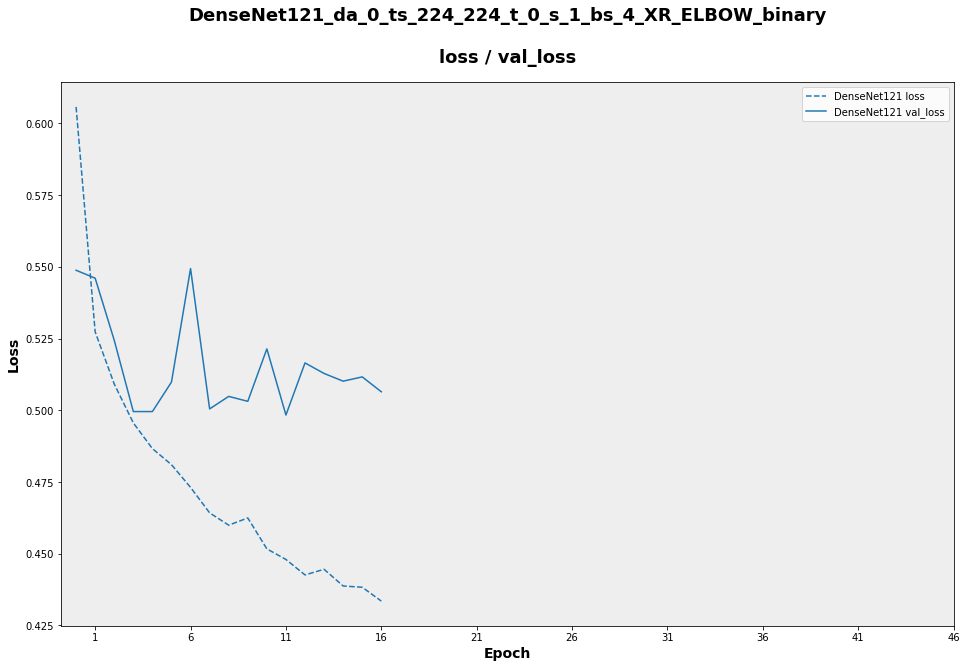

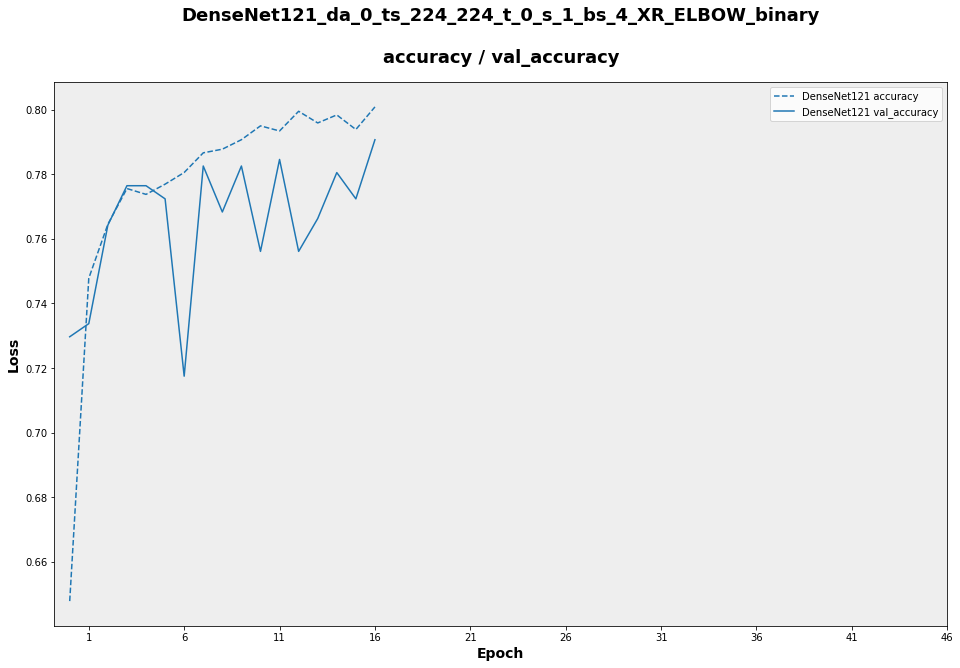

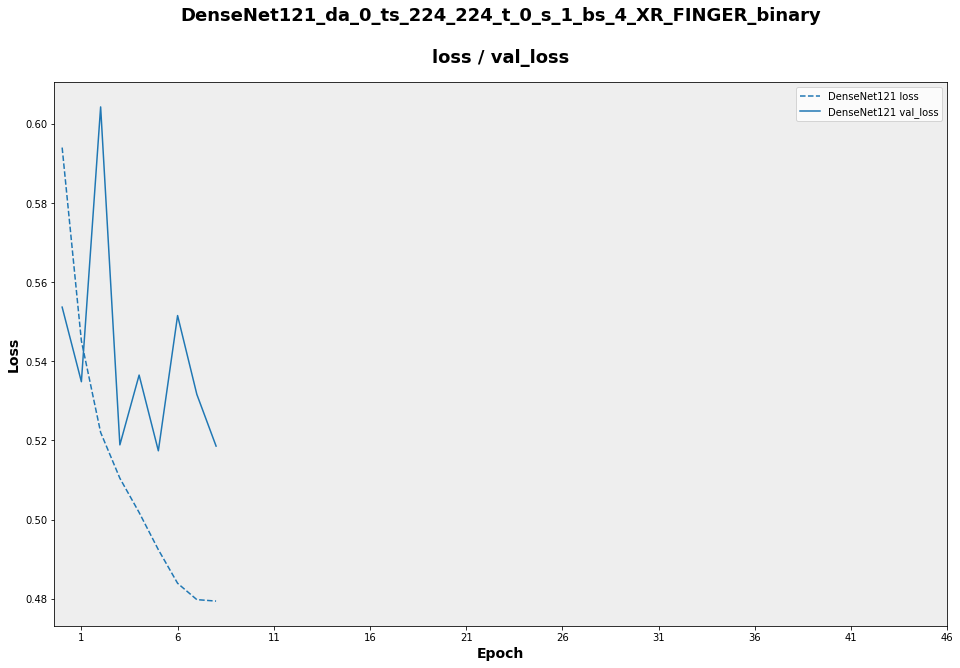

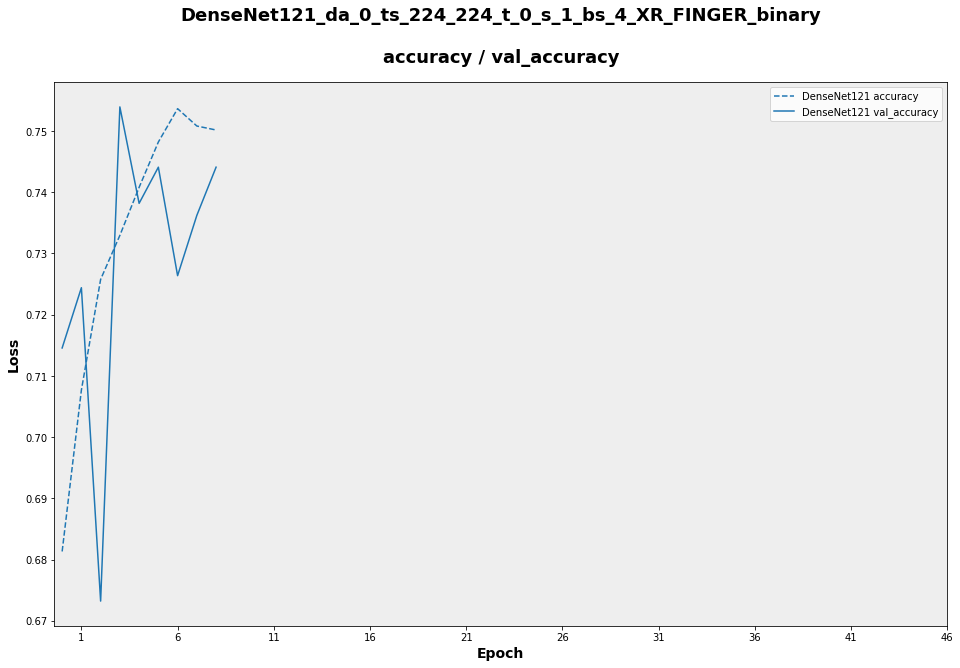

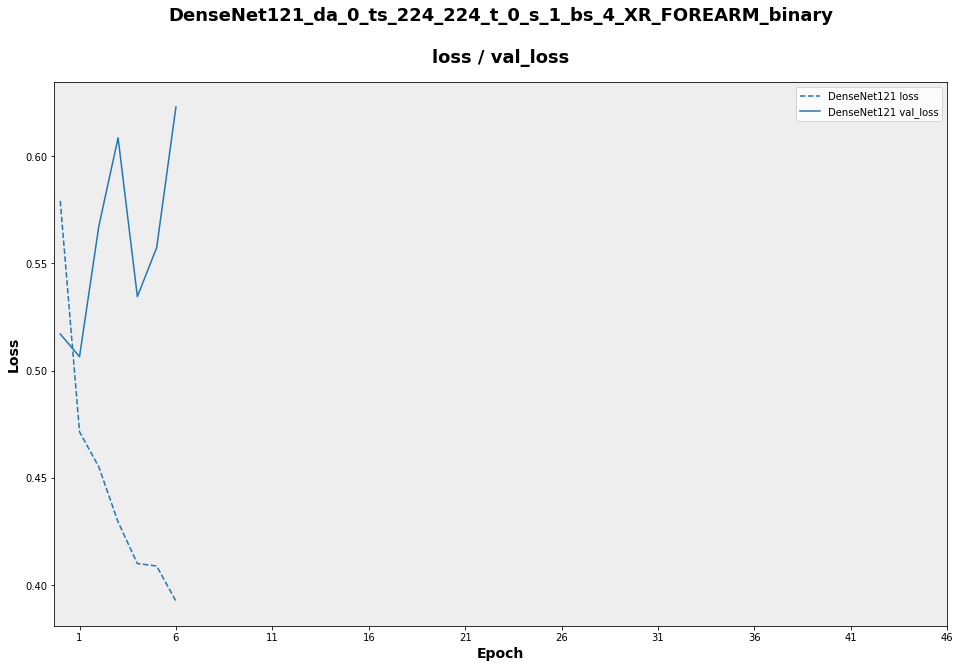

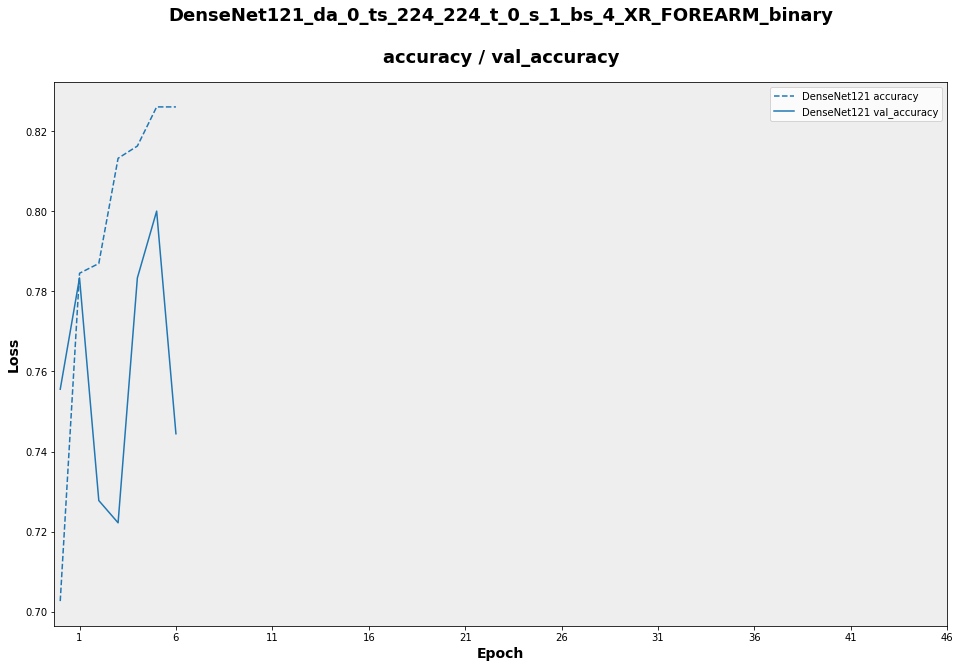

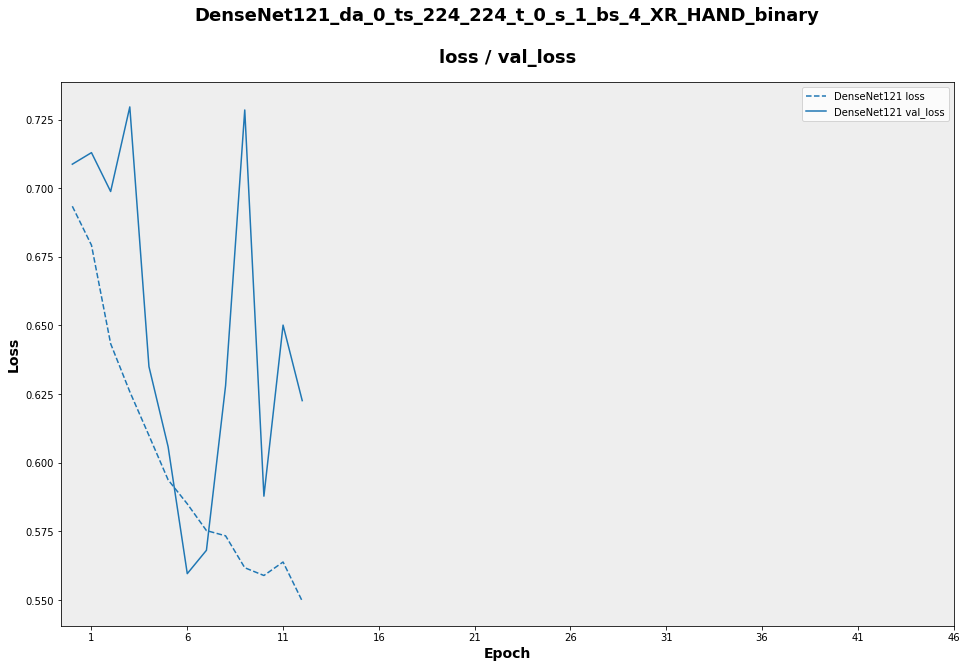

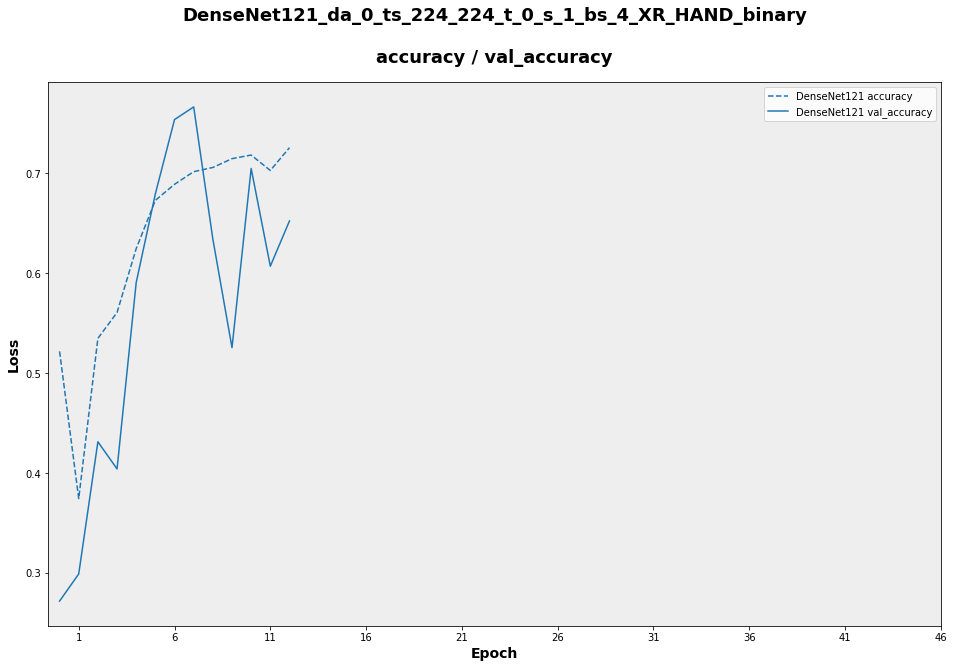

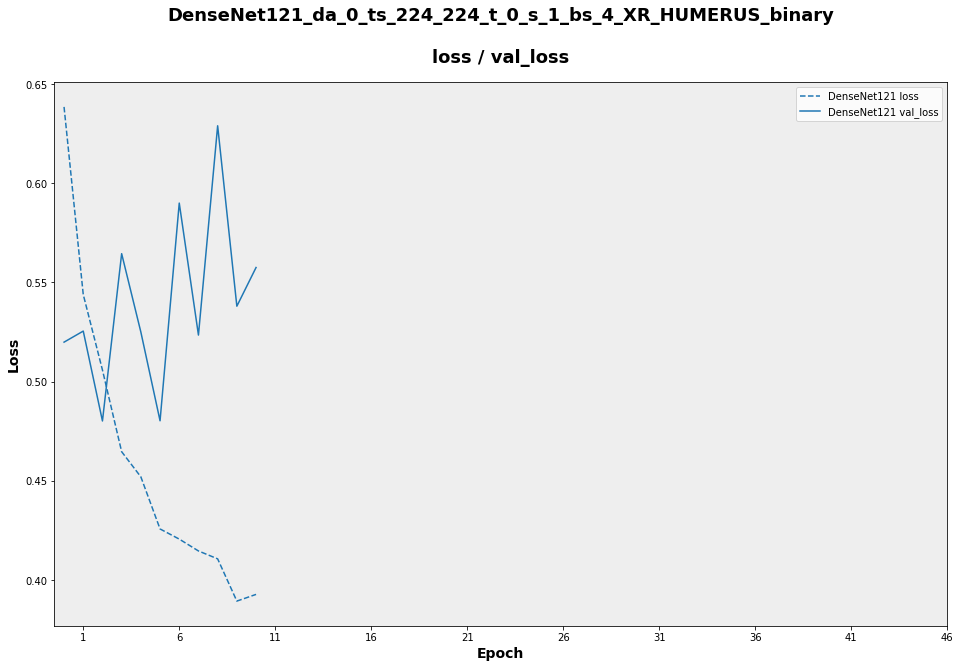

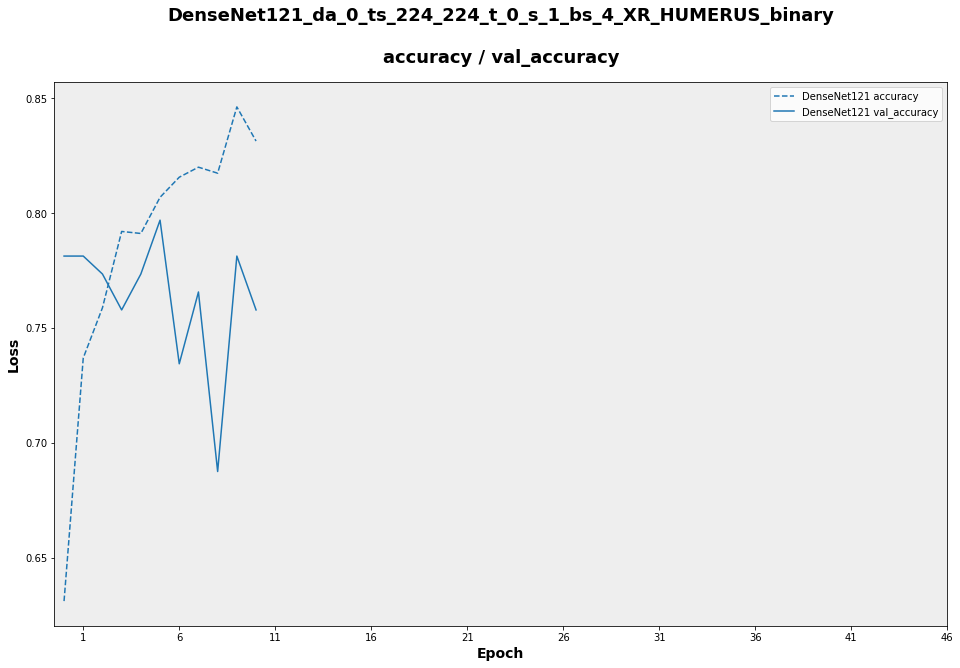

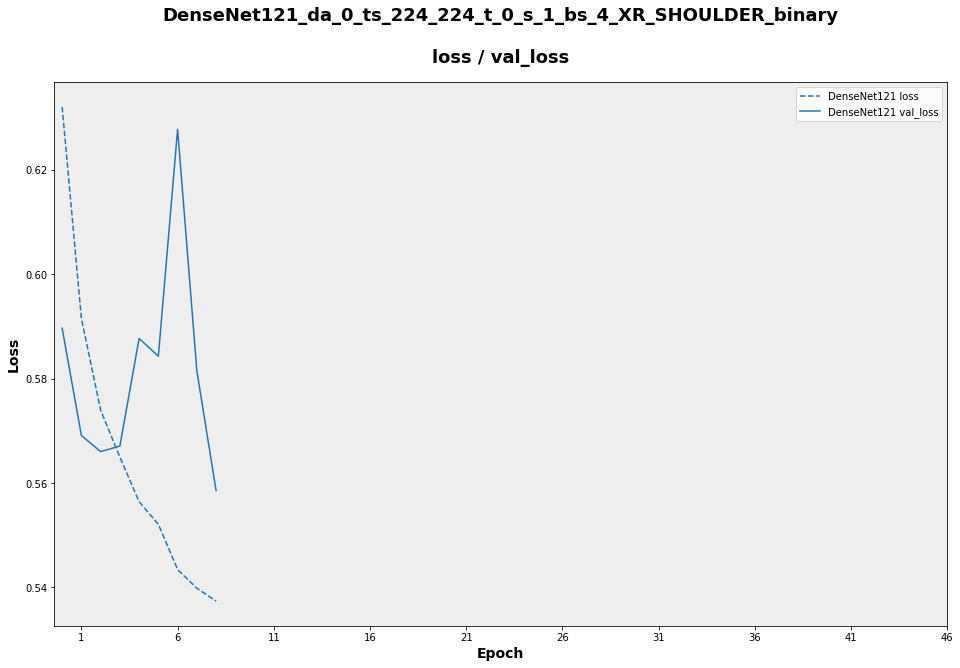

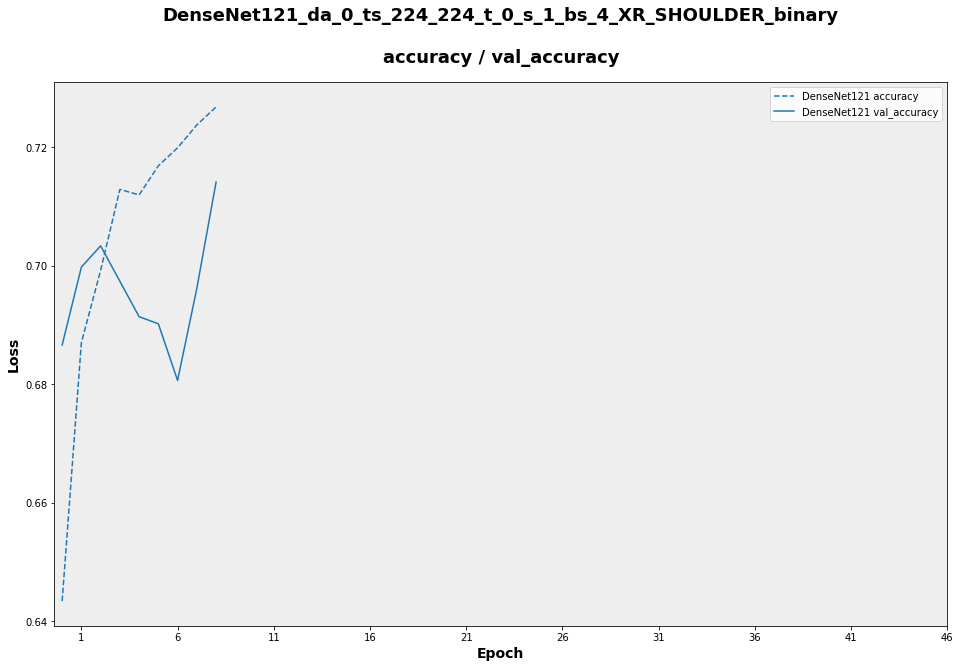

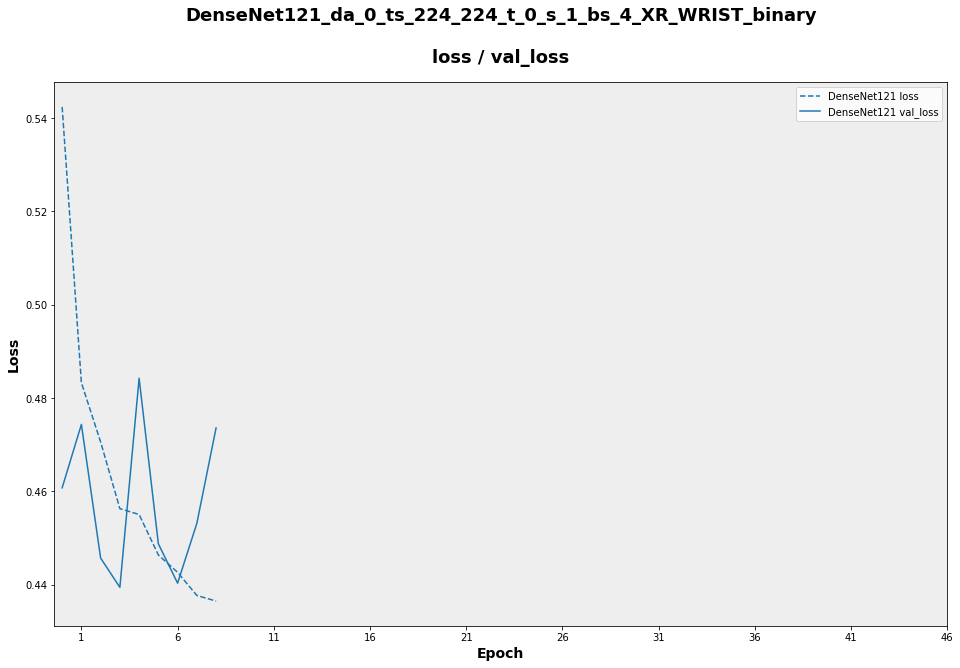

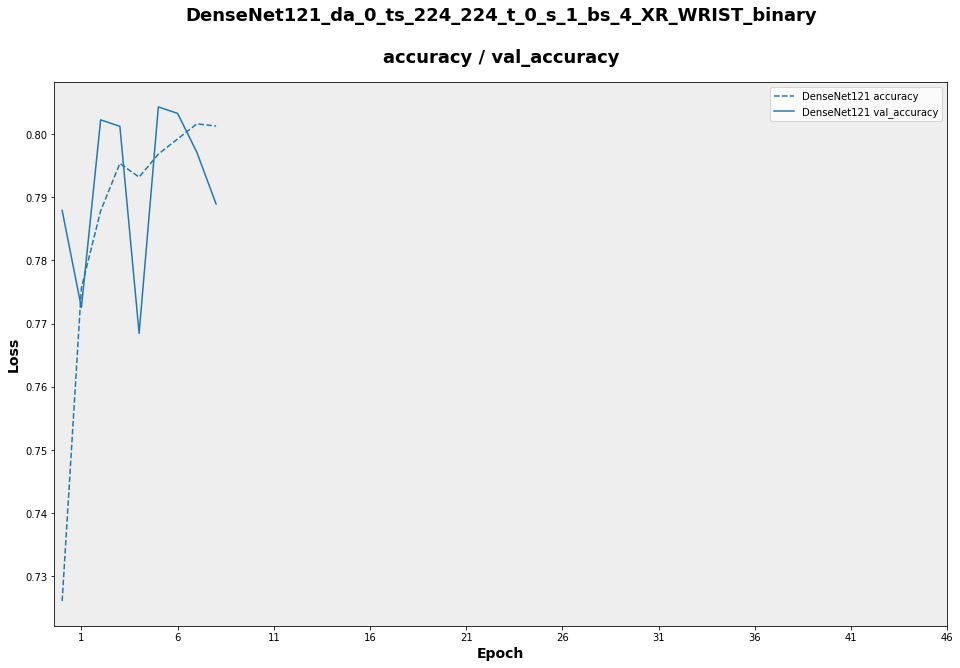

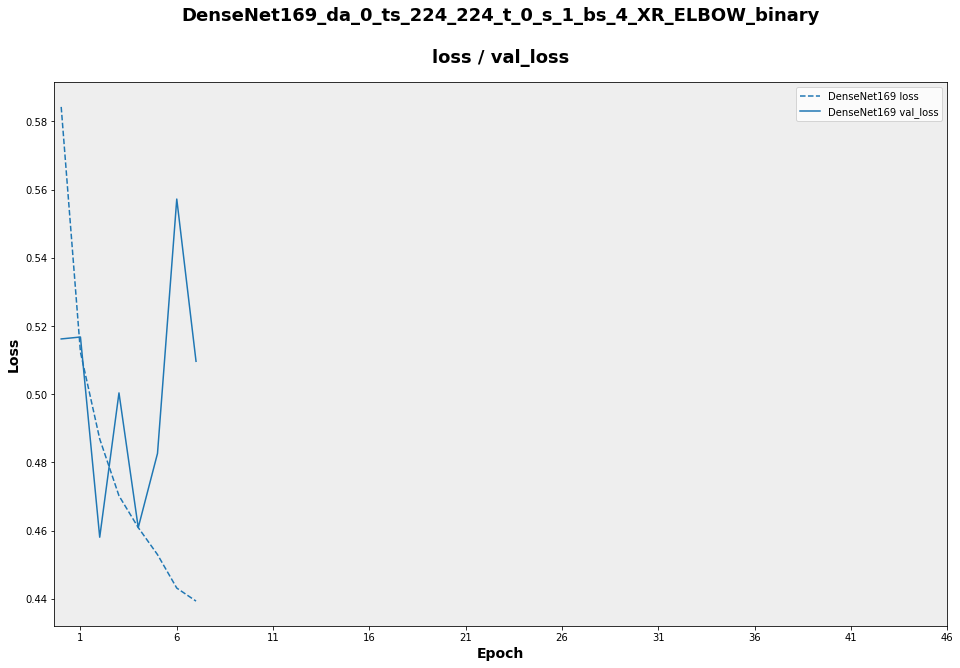

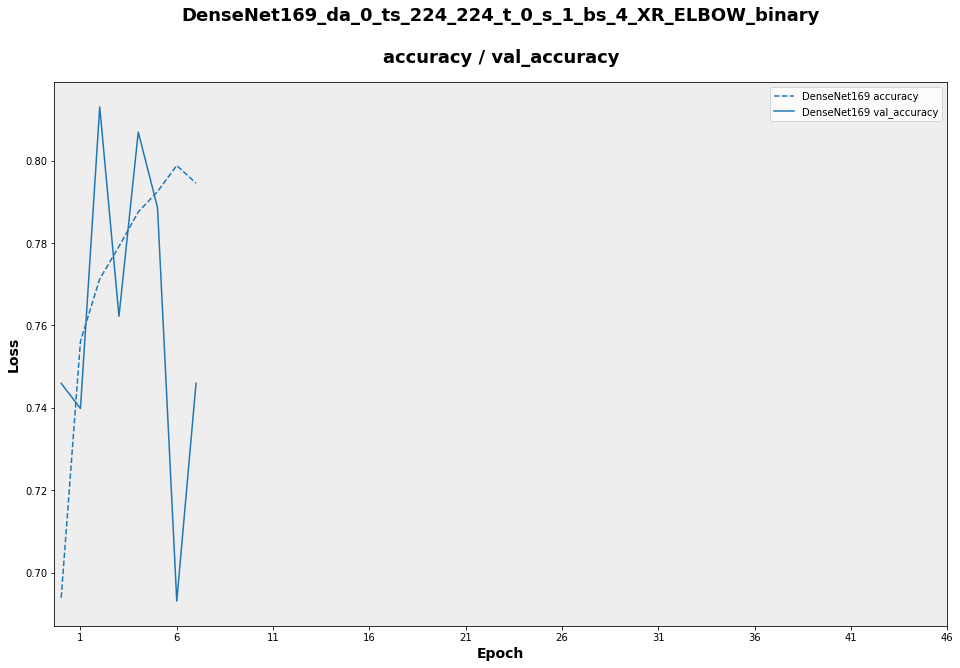

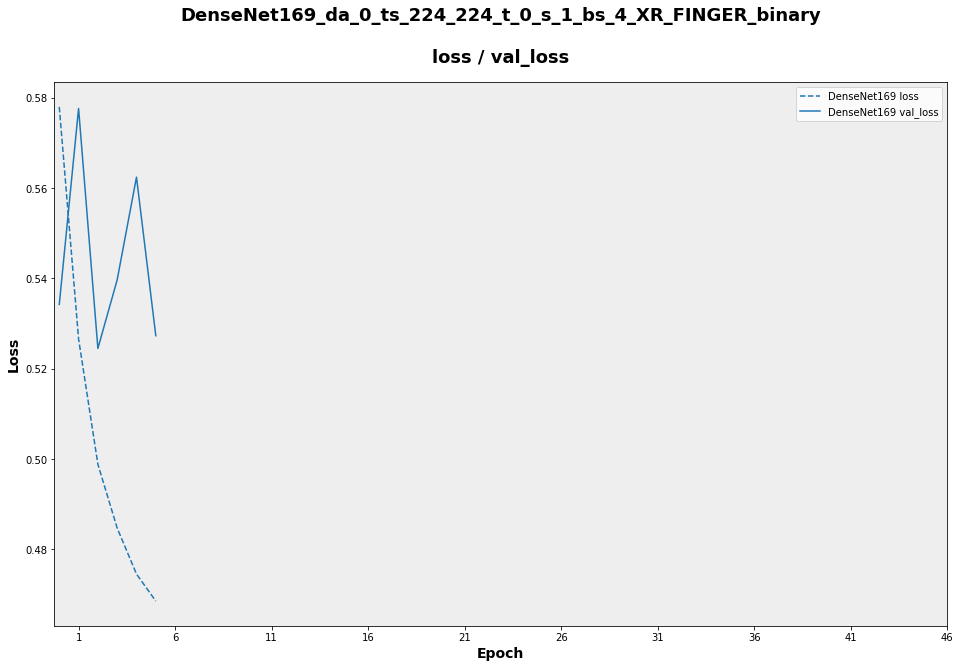

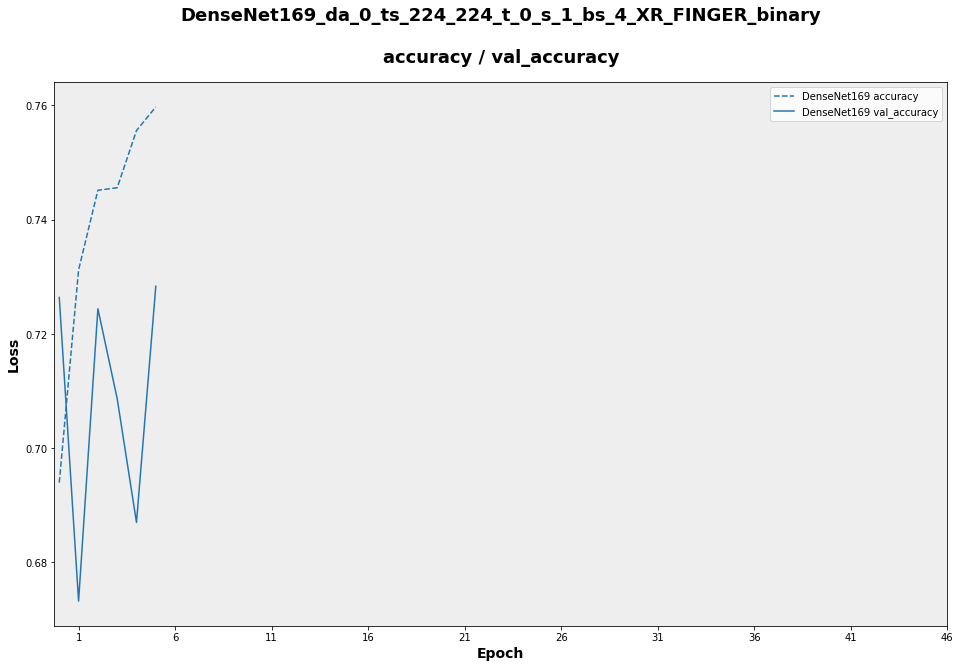

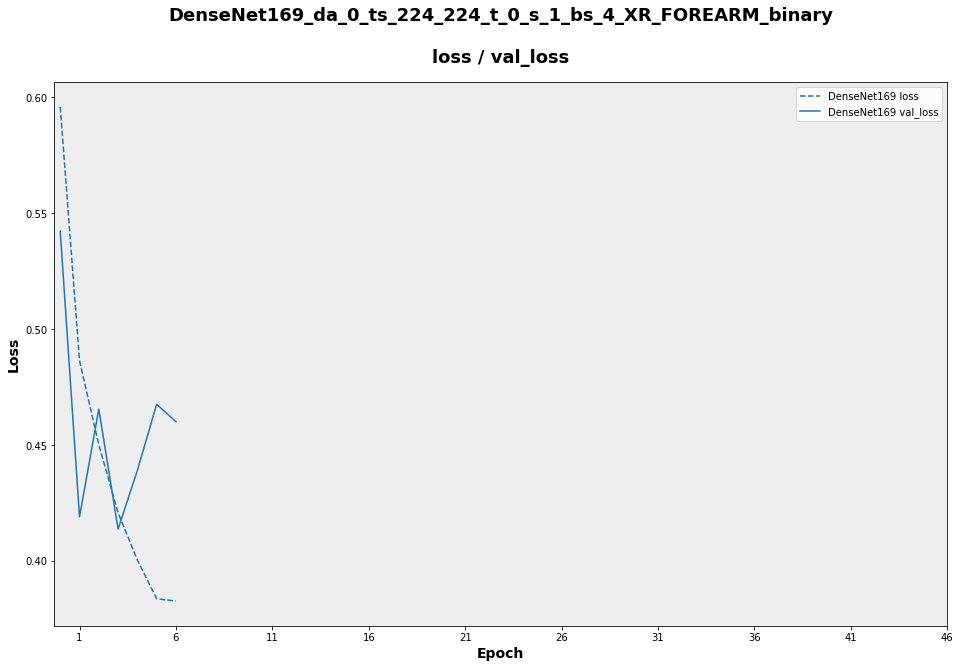

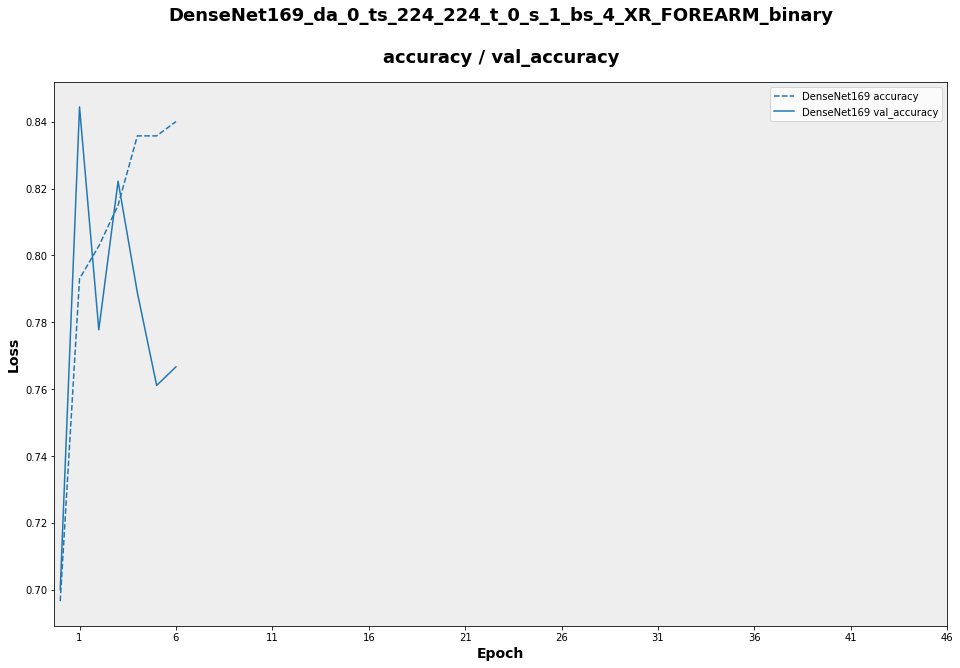

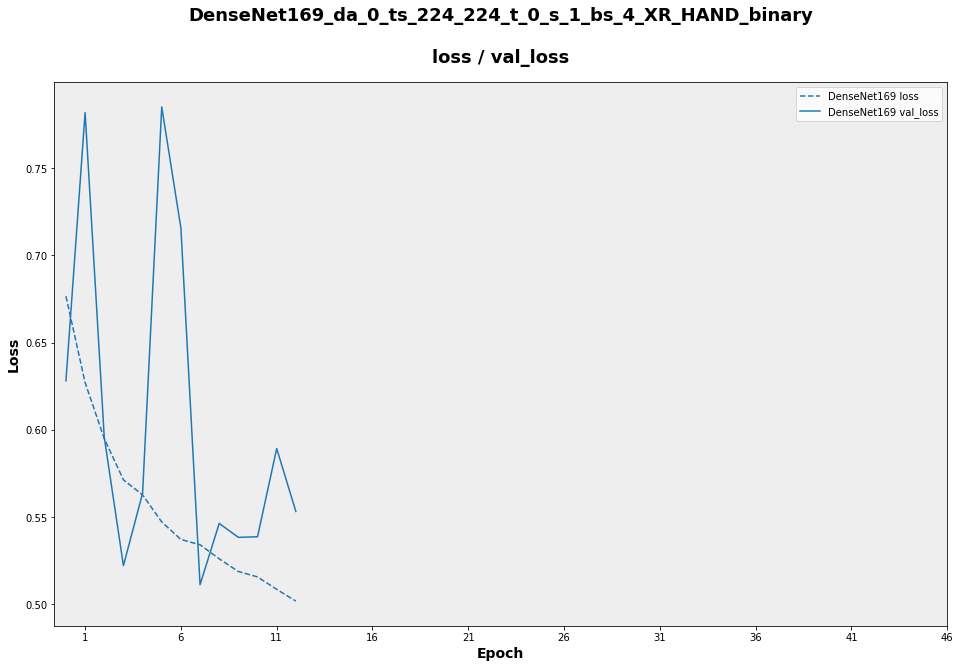

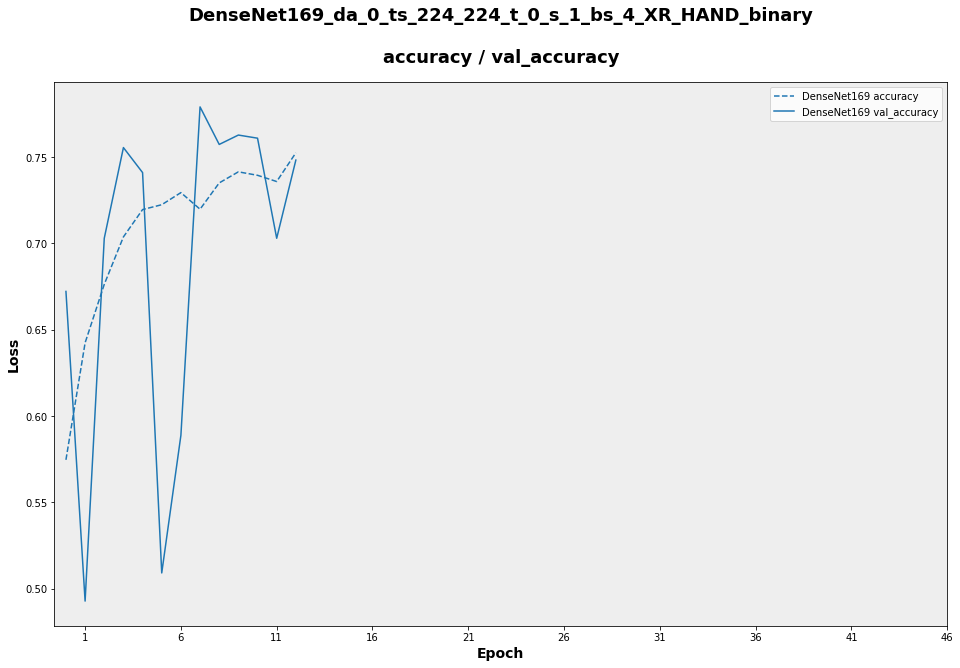

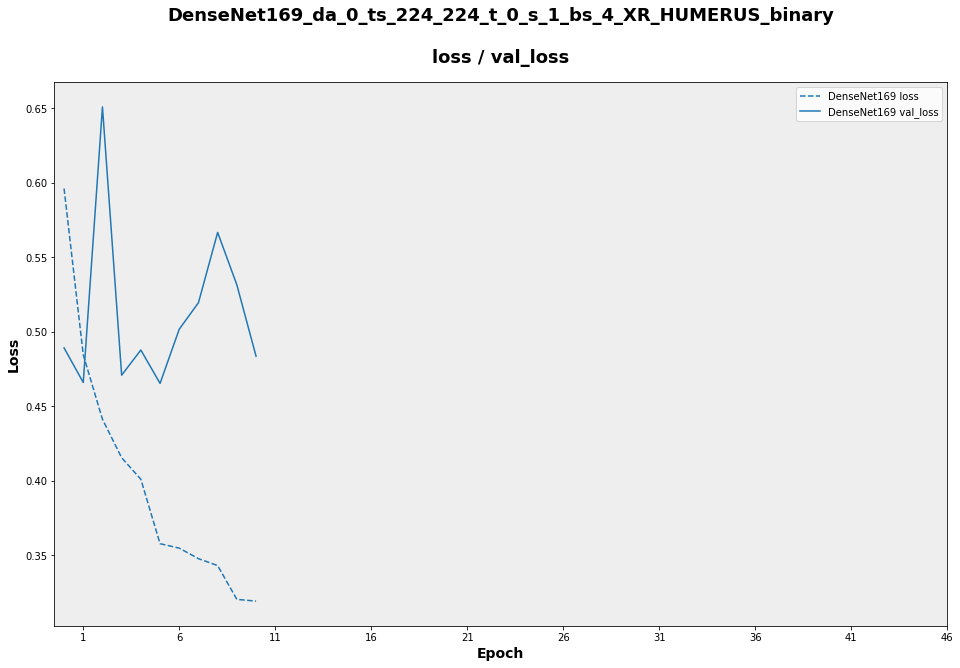

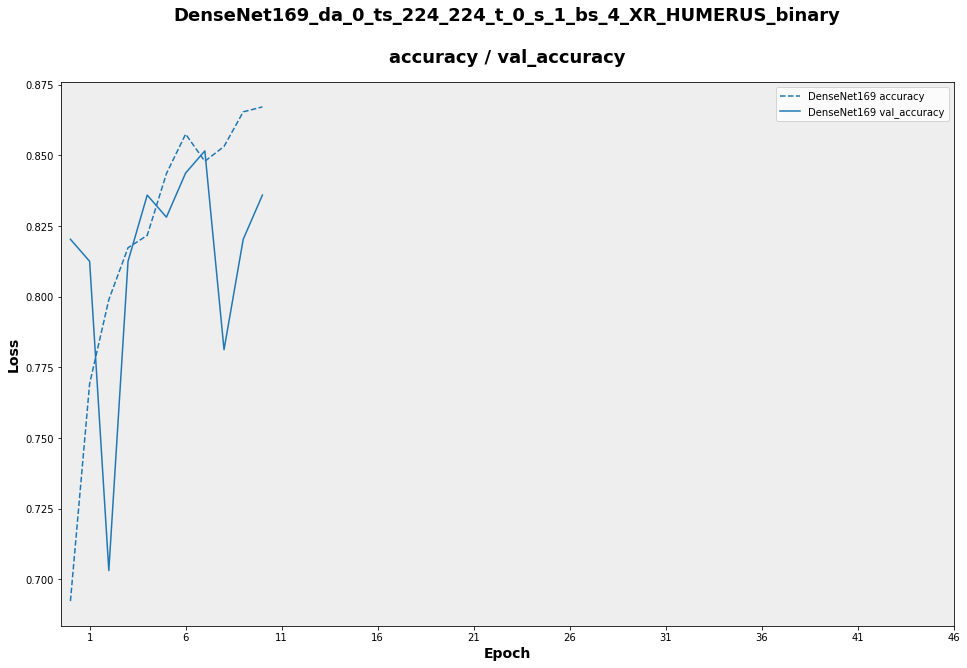

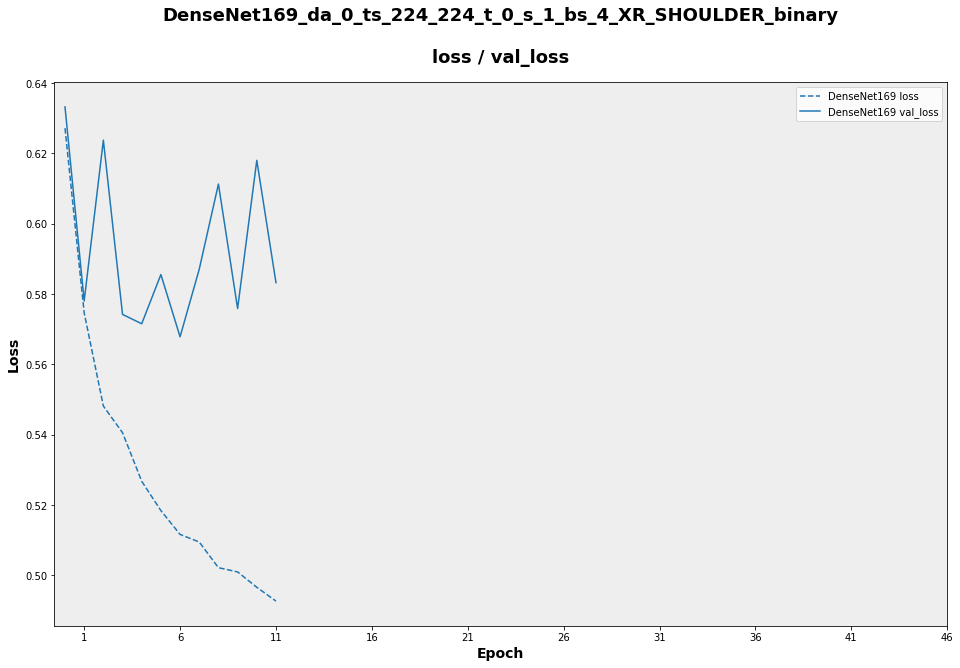

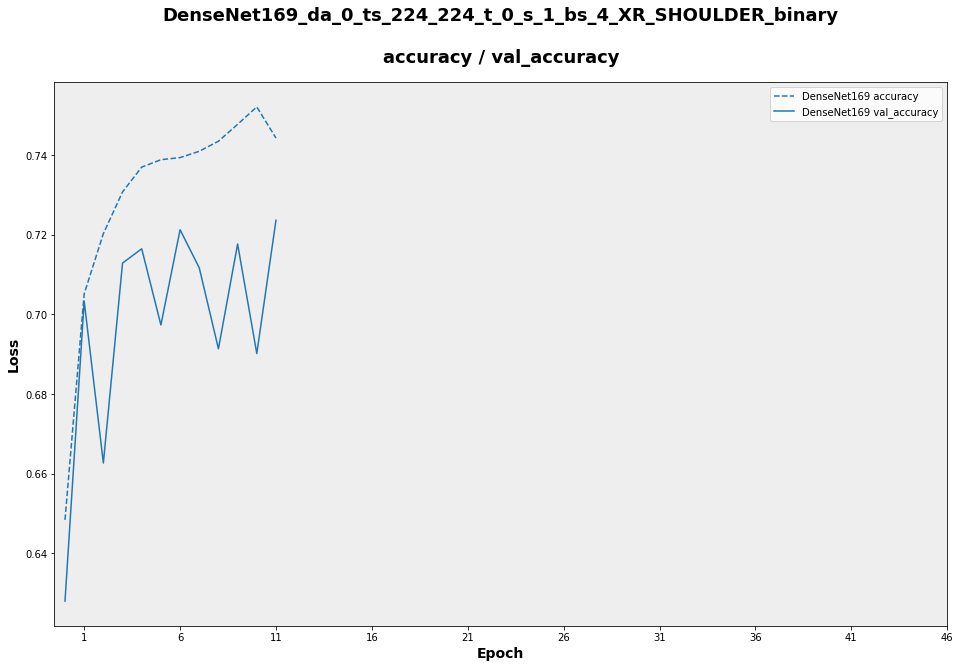

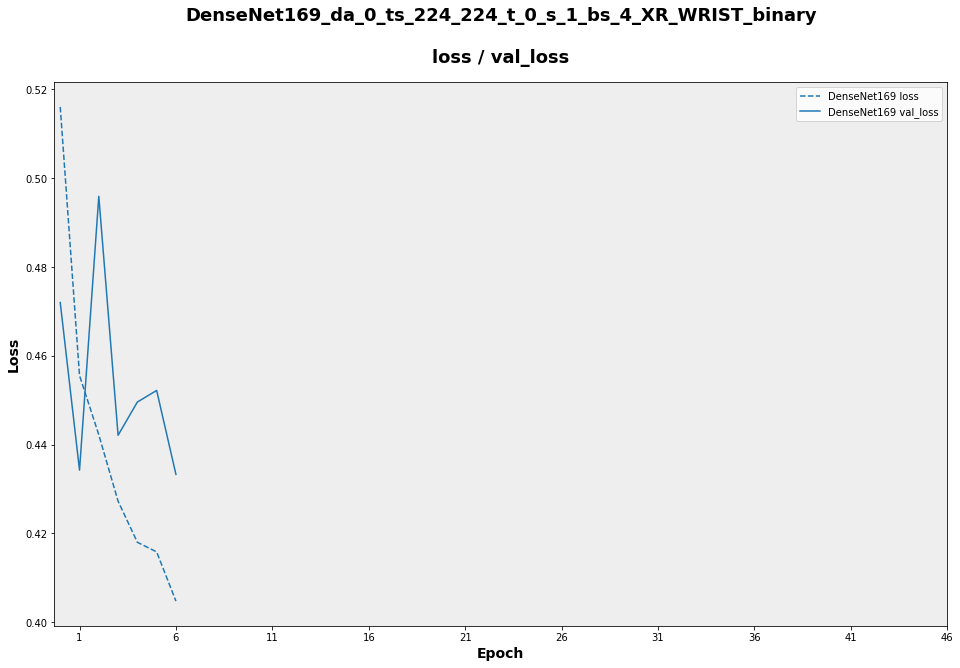

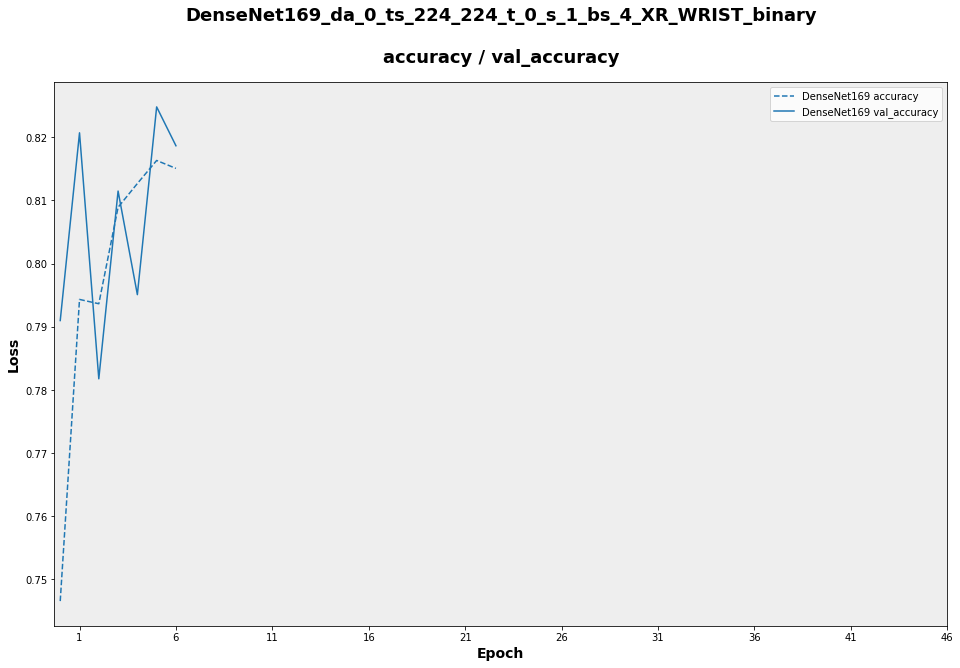

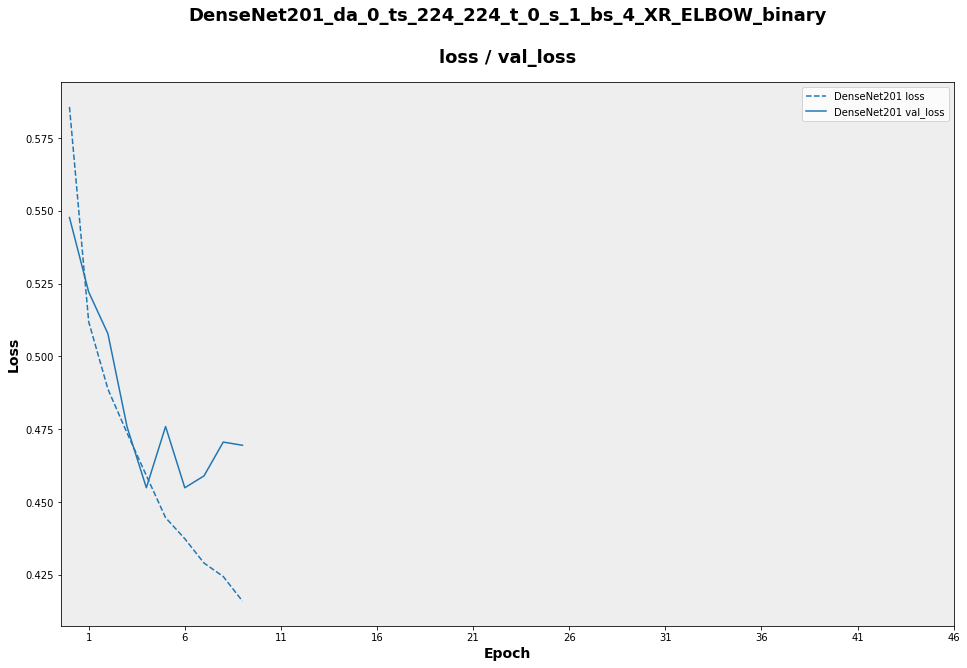

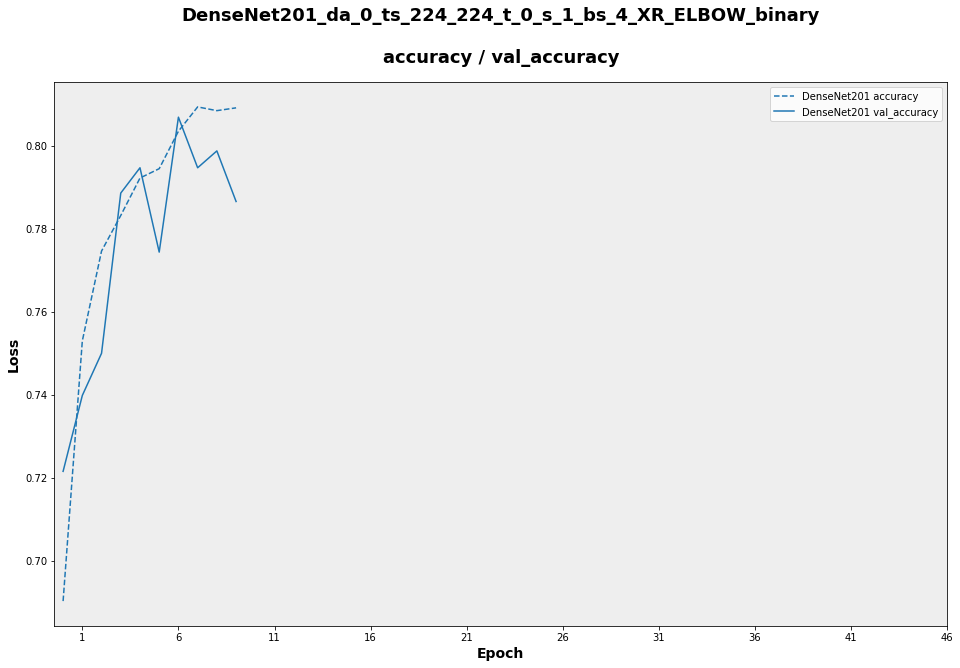

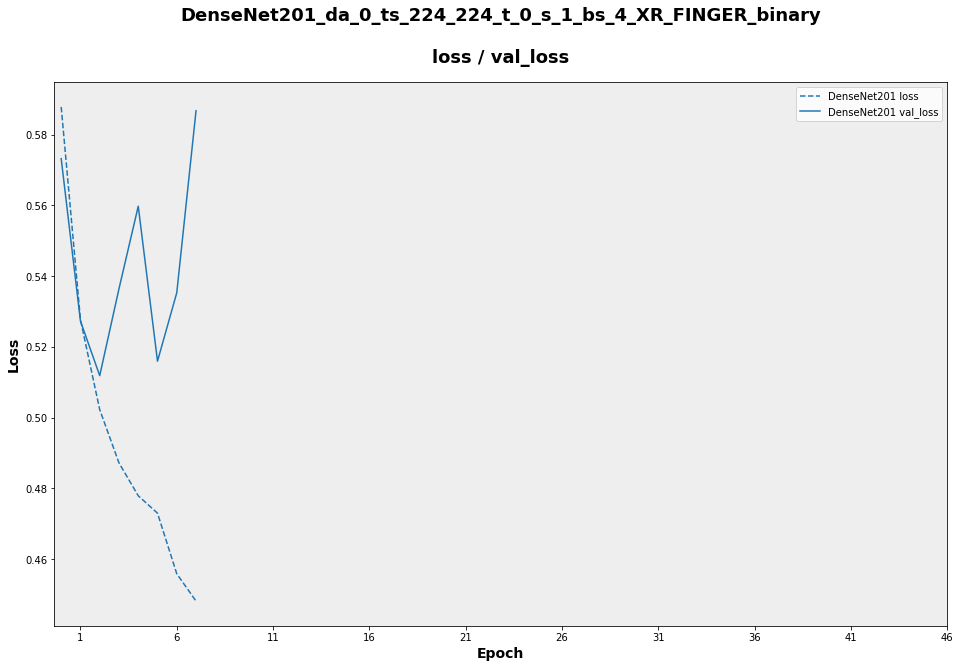

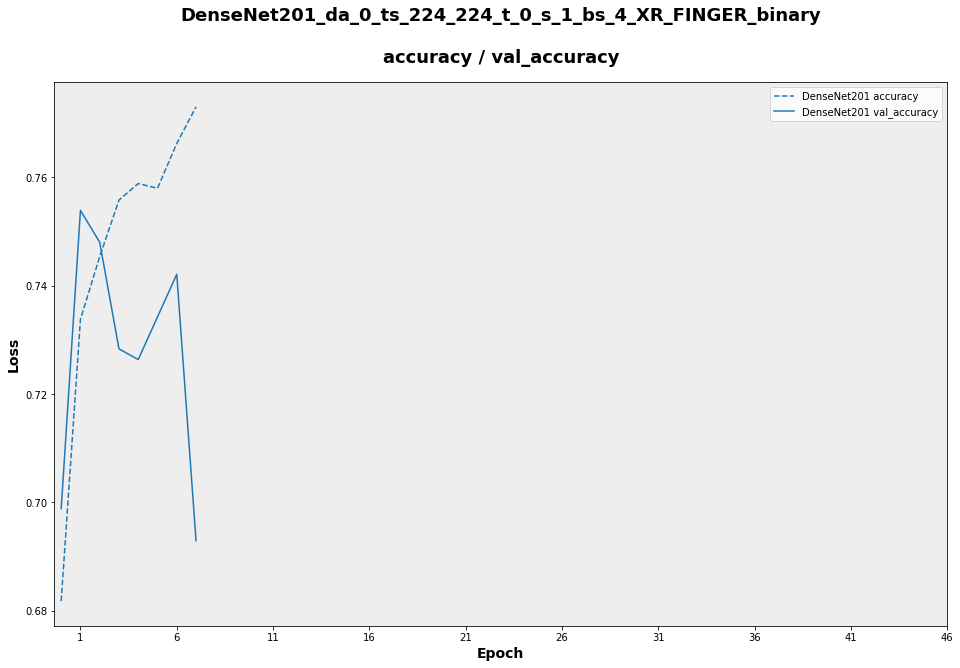

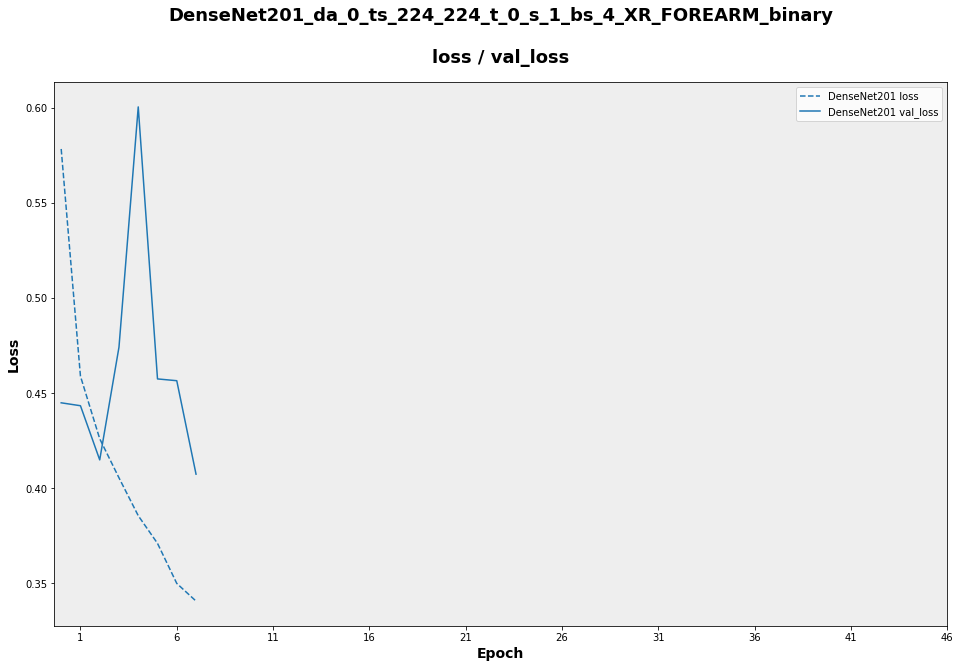

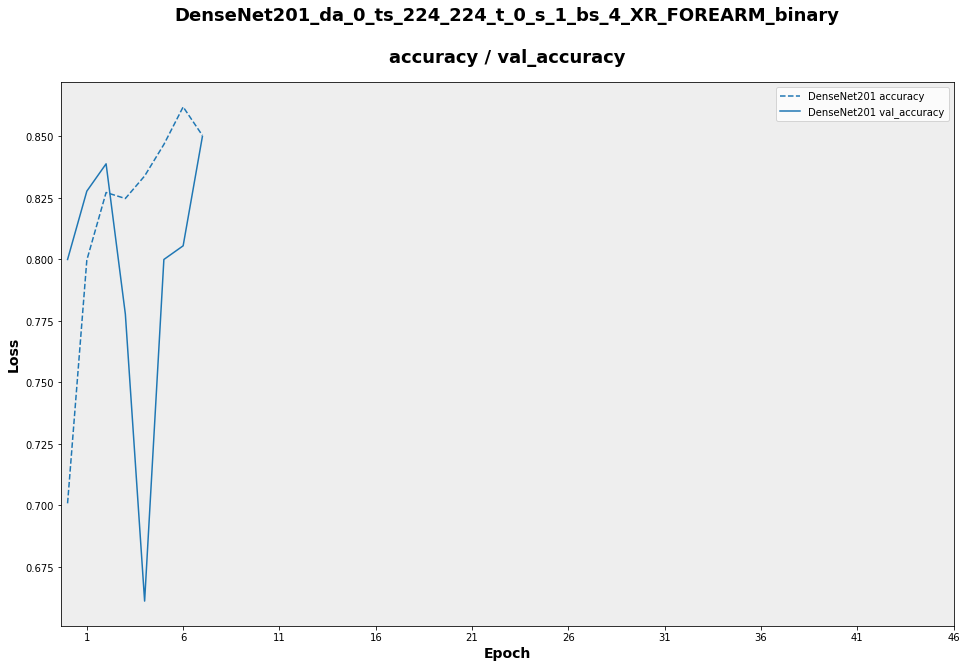

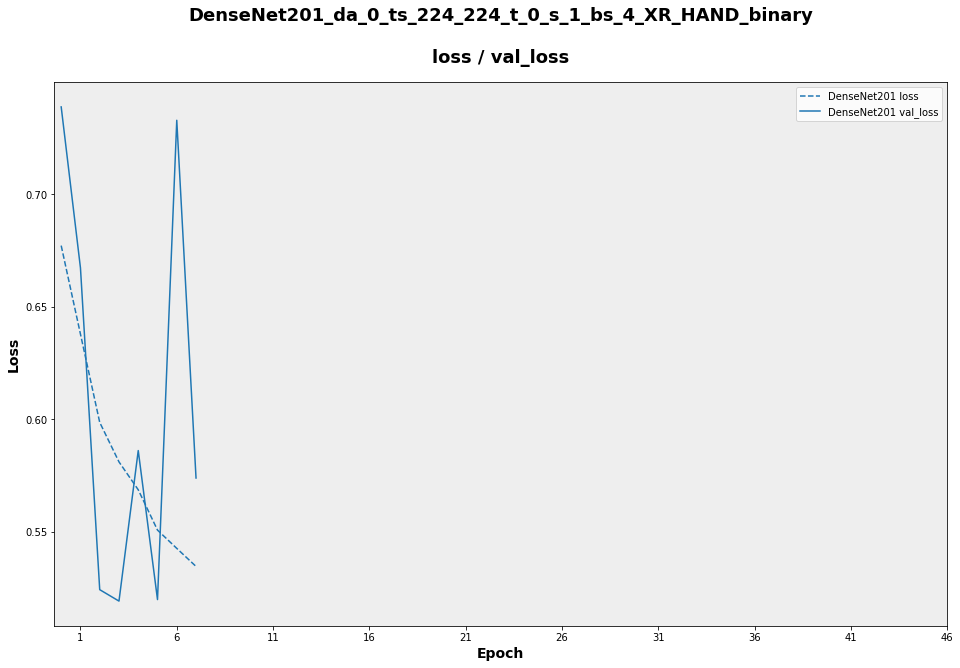

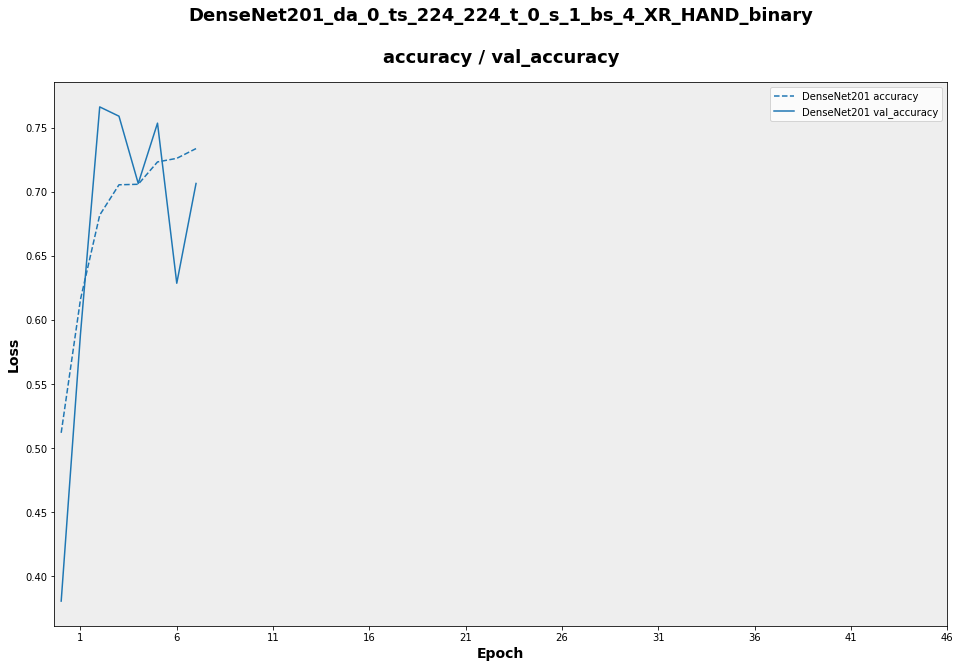

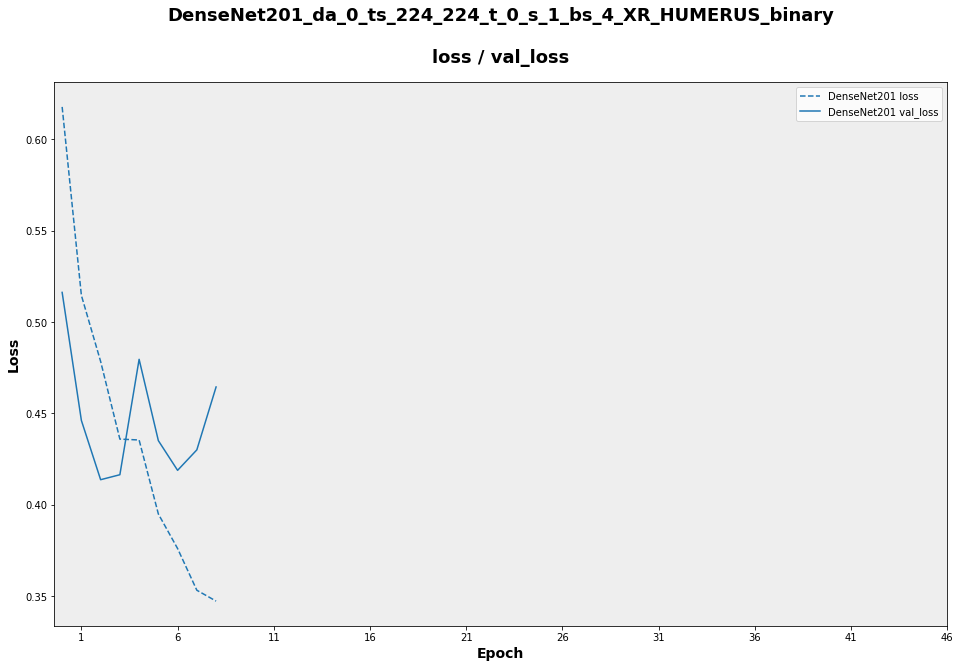

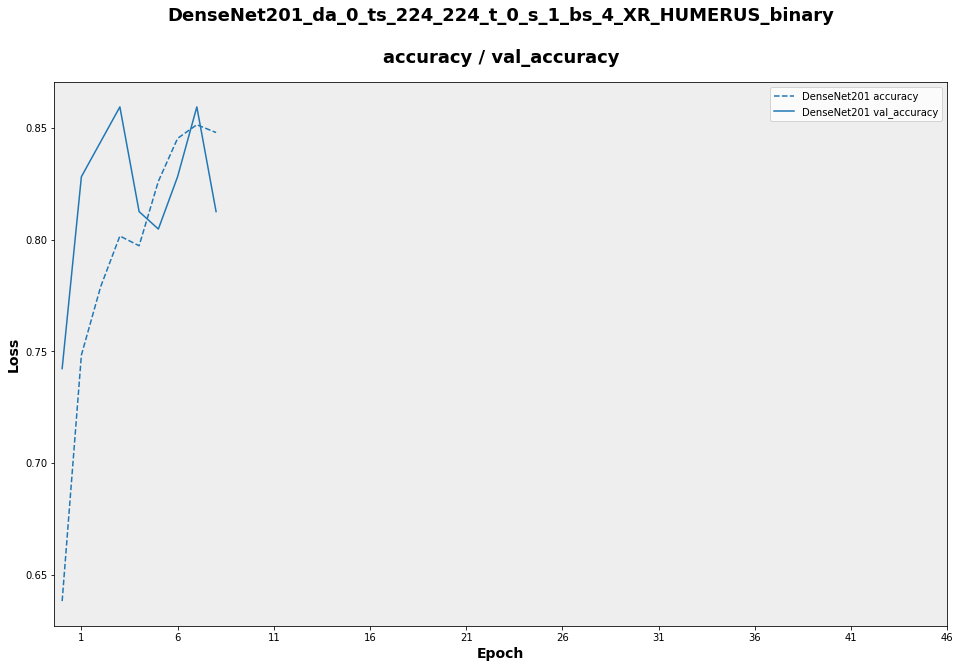

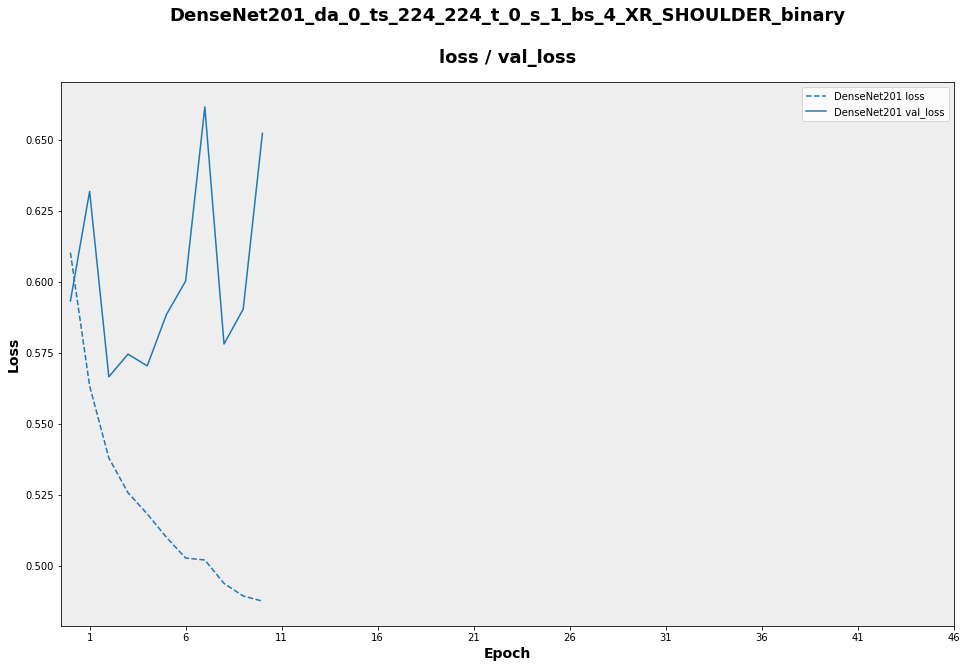

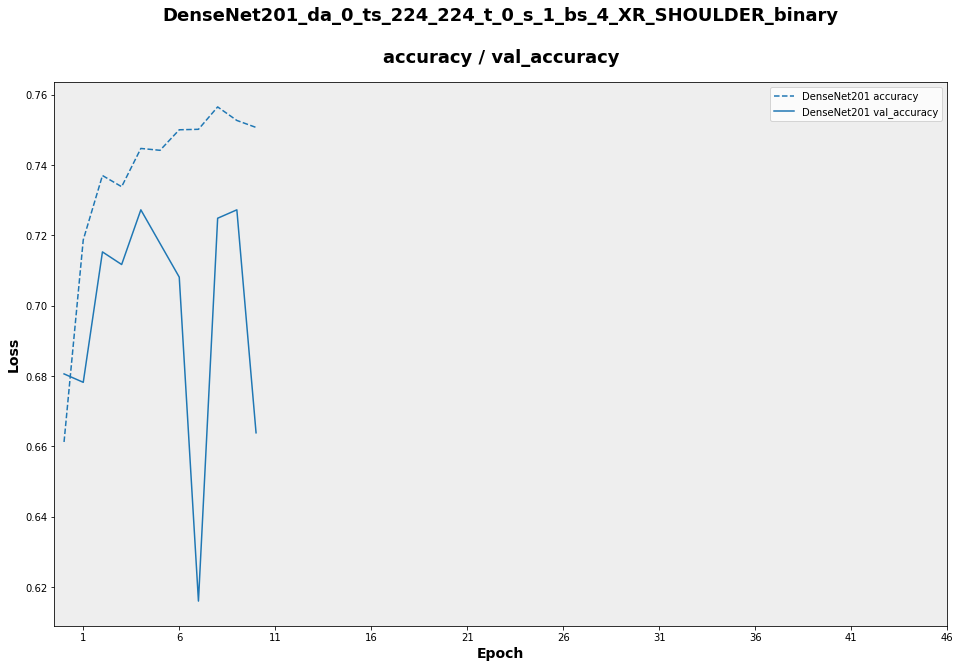

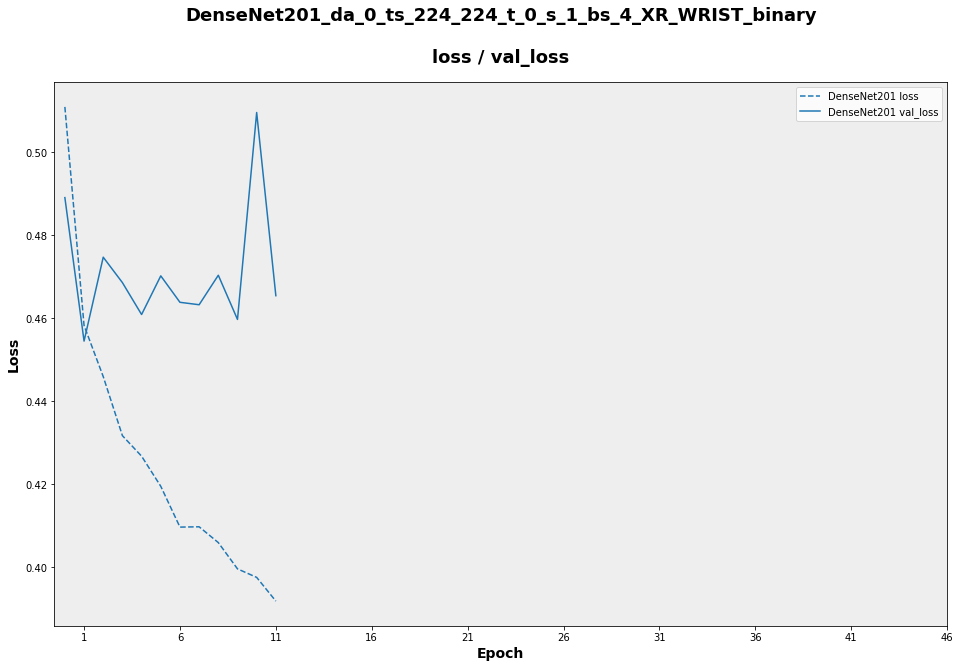

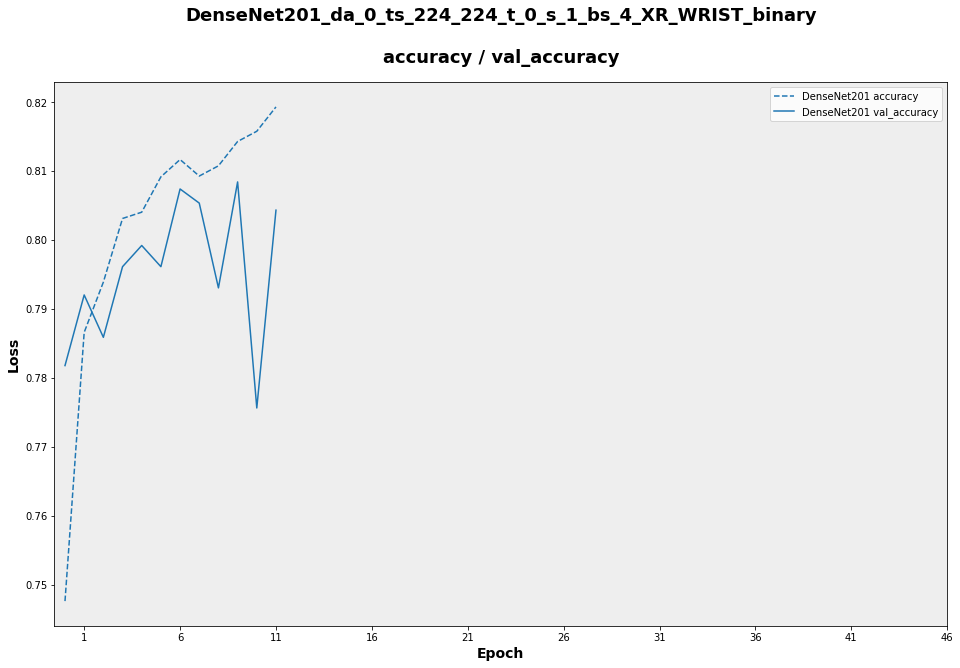

In [7]:
%%time

architectures = [
    "DenseNet121", 
    "DenseNet169", 
    "DenseNet201"
]

filter_classes = [
    "XR_ELBOW", 
    "XR_FINGER", 
    "XR_FOREARM", 
    "XR_HAND", 
    "XR_HUMERUS", 
    "XR_SHOULDER", 
    "XR_WRIST"
]

densenet_model_config = {
    "model": {
        "model_id": None, 
        "model_instance_id": None, 
        "target_size": None,
        "channels_size": None, 
        "classes_size": None, 
        "optimizer": "Adam", 
        "loss": "categorical_crossentropy", 
        "metrics": [
            "accuracy", 
            tf.keras.metrics.AUC(
                name = "roc_auc"
            ), 
            # tfa.metrics.CohenKappa(name = "kappa", num_classes = 2)
        ], 
        "dense_net": {
            "weights": "imagenet", 
            "pooling": "avg"
        }
    }, 
    "head": None, 
    "training": {
        "reduce_lr_on_plateau": {
            "monitor": "val_roc_auc", 
            "factor": 1e-2, 
            "patience": 2, 
            "min_delta": 1e-4, 
            "cooldown": 2, 
            "min_lr": 1e-3, 
            "verbose": 1
        }, 
        "early_stopping": {
            "monitor": "val_roc_auc", 
            "patience": 5, 
            "verbose": 1,
            "mode": "max"
        }, 
        "checkpoint": {
            "monitor": "val_roc_auc", 
            "save_best_only": True, 
            "verbose": 1, 
            "mode": "max"
        }, 
        "csv_logger": {
            "separator": "\t", 
            "append": False
        }, 
        "epochs": 100, 
        "class_weights": None
    }
}

for architecture in architectures:
    experiment = Experiment.Experiment(
        model_id = architecture, 
        batch_size = 4, 
        target_size = (224, 224), 
        channels_size = 3, 
        classes_size = 2, 
        shuffle = True, 
        trainable = False, 
        validation_split = 0.1, 
        data_augmentation = False, 
        filter_classes = filter_classes, 
        model_config = densenet_model_config, 
        random_seed = Env.RANDOM_SEED
    )
    
    experiments_per_class[architecture] = experiment.run()

---